In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from itertools import combinations  
import tensorflow as tf
%matplotlib inline

C:\Users\nicpo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nicpo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nicpo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nicpo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

The data set used is "Campus Recruitment Academic and Employability Factors influencing placement" by Ben Roshan D <a href="https://www.kaggle.com/benroshan/factors-affecting-campus-placement">link</a>
<p>
    The best description is the one given my Roshan itself: "This data set consists of Placement data of students in our campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students"(Roshan). It has 15 different features: sl_no, gender, ssc_p, ssc_b, hsc_p, hsc_b, hsc_s, degree_p, degree_t, workex, etest_p, specialisation, mba_p, status, and salary.
</p>  
<ul>
    <li>sl_no: Serial Number of index</li>
    <li>gender: Gender (M: male, F: female)</li>
    <li>ssc_p: Secondary Education percentage- 10th Grade</li>
    <li>ssc_b: Board of Education (Central,Others)</li>
    <li>hsc_p: Higher Secondary Education percentage- 12th Grade</li>
    <li>hsc_b: Board of Education (Central, Others)</li>
    <li>hsc_s: Specialization in Higher Secondary Education</li>
    <li>degree_p: Degree Percentage</li>
    <li>degree_t: Under Graduation(Degree type)- Field of degree education</li>
    <li>workex: Work Experience (Yes, No)</li>
    <li>etest_p: </li>
    <li>specialisation: type of specialisation</li>
    <li>mba_p: mba percentage</li>
    <li>status: if working or not (Not Placed, Placed)</li>
    <li>salary: salary of the person</li>
</ul>

In [2]:
df=pd.read_csv('datasets_596958_1073629_Placement_Data_Full_Class.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# EDA

In [3]:
df[['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']].describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


Here we can see a basic statiscal analysis of the data, the feature of interes in this notebook is the salary

In [4]:
df.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


Here are the variable correlations

In [5]:
df.corr().loc['salary']

sl_no       0.063764
ssc_p       0.035330
hsc_p       0.076819
degree_p   -0.019272
etest_p     0.178307
mba_p       0.175013
salary      1.000000
Name: salary, dtype: float64

The correlations of our variable of interest (salary)
There is yet no correlation for degree type since it is a categorical string feature

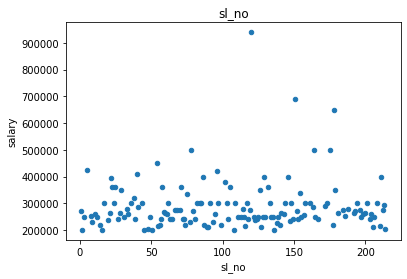

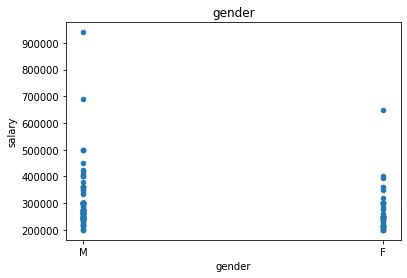

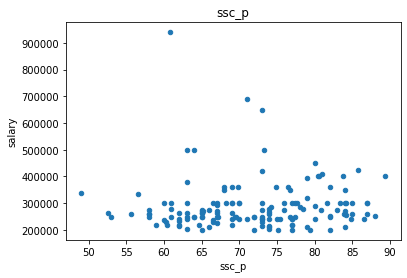

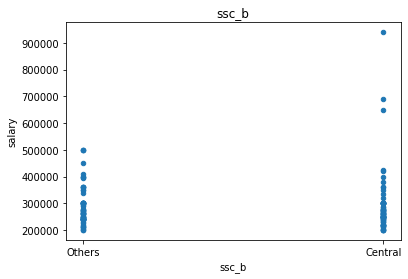

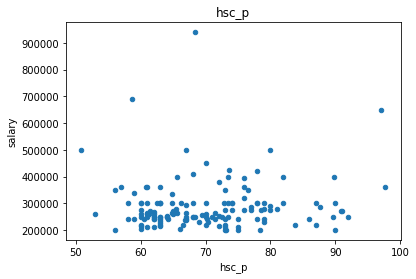

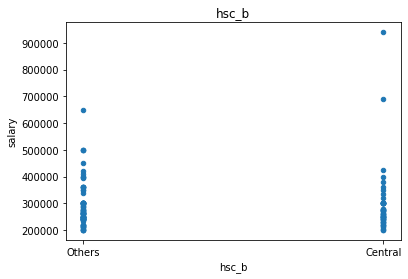

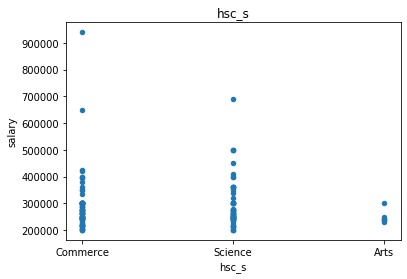

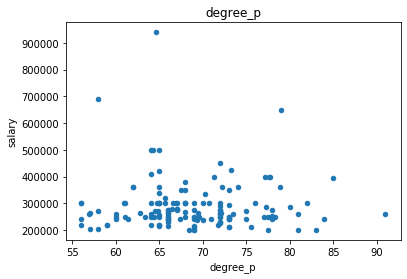

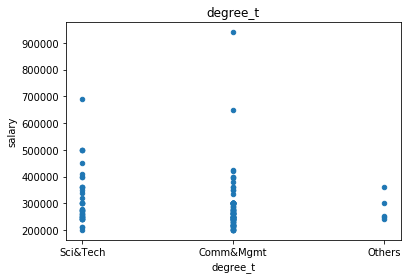

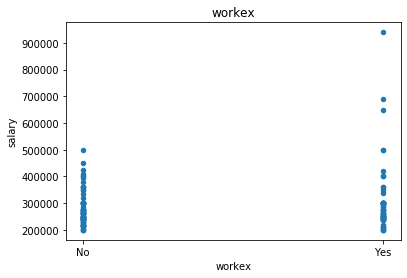

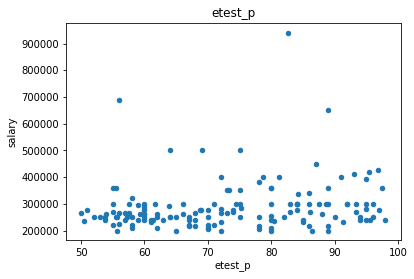

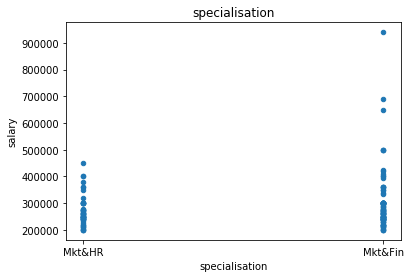

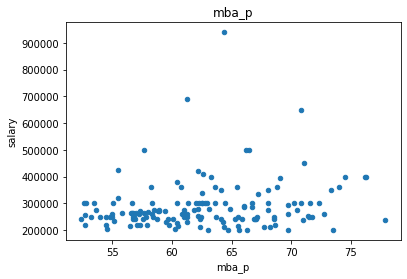

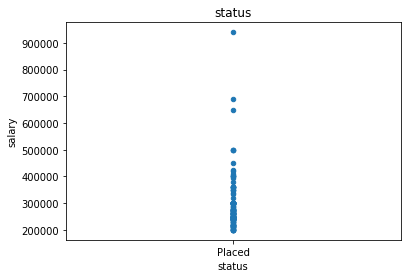

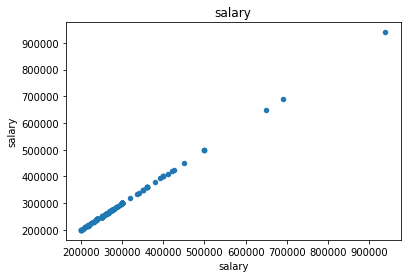

In [6]:
for c in df.columns:    
    try:
        df.plot(c,'salary',kind='scatter',title=c)
    except:
        pass

After this EDA we can determine many things, especially the distribution of the salary variable and that we have many Categorical Variables that we have to onehotencode afterwards in the preprocessing

# Data Preprocessing

Counting the amount of NaN values for each feature

In [7]:
for c in df.columns:
    nans=df[c].isna().sum()
    print(c,': ',nans)

sl_no :  0
gender :  0
ssc_p :  0
ssc_b :  0
hsc_p :  0
hsc_b :  0
hsc_s :  0
degree_p :  0
degree_t :  0
workex :  0
etest_p :  0
specialisation :  0
mba_p :  0
status :  0
salary :  67


Here we can see that we have 67 NaN values in the salary feature out of the 215 values (a 31%)

In [8]:
print(len(df['status'].where(df['status']=='Not Placed') .dropna()))

67


But the previous 67 NaN salary values correspond to the Not Place so we are going to assume the have 0.0 salary

In [9]:
df['salary']=[df['salary'].iloc[i] if df['status'].iloc[i]!='Not Placed' else 0.0 for i in range(len(df))]
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


Moving forward we will change the features in workex to binary (No,Yes)->(0,1)

In [10]:
df['workex']=[1 if w=='Yes' else 0 for w in df['workex']]
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,Placed,425000.0


we will change the features in status to binary (Not Placed,Placed)->(0,1)

In [11]:
df['status']=[1 if w=='Placed' else 0 for w in df['status']]
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.0


Now we turn Gender into a binary variable (F,M)->(0,1)

In [12]:
df['gender']=[1 if w=='M' else 0 for w in df['gender']]
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,0.0
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.0


We are going to change ssc_p to a binary (others,central)->(0,1)

In [13]:
df['ssc_b']=[1 if w=='Central' else 0 for w in df['ssc_b']]
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,0,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.0
1,2,1,79.33,1,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.0
2,3,1,65.00,1,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.0
3,4,1,56.00,1,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,0.0
4,5,1,85.80,1,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.0


We are going to change hsc_b to a binary (others,central)->(0,1)

In [14]:
df['hsc_b']=[1 if w=='Central' else 0 for w in df['hsc_b']]
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,0,91.00,0,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.0
1,2,1,79.33,1,78.33,0,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.0
2,3,1,65.00,1,68.00,1,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.0
3,4,1,56.00,1,52.00,1,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,0.0
4,5,1,85.80,1,73.60,1,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.0


Now onehot encode Hsc_s ('Commerce' 'Science' 'Arts')->(0,1,2)

In [15]:
hsc_s_dict=dict(zip(df['hsc_s'].unique(),range(3)))
df['hsc_s']=[hsc_s_dict[h] for h in df['hsc_s']]
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,0,91.00,0,0,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.0
1,2,1,79.33,1,78.33,0,1,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.0
2,3,1,65.00,1,68.00,1,2,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.0
3,4,1,56.00,1,52.00,1,1,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,0.0
4,5,1,85.80,1,73.60,1,0,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.0


Now onehot encode degree_t ('Sci&Tech' 'Comm&Mgmt' 'Others')->(0,1,2)

In [16]:
degree_t_dict=dict(zip(df['degree_t'].unique(),range(3)))
df['degree_t']=[degree_t_dict[h] for h in df['degree_t']]
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,0,91.00,0,0,58.00,0,0,55.0,Mkt&HR,58.80,1,270000.0
1,2,1,79.33,1,78.33,0,1,77.48,0,1,86.5,Mkt&Fin,66.28,1,200000.0
2,3,1,65.00,1,68.00,1,2,64.00,1,0,75.0,Mkt&Fin,57.80,1,250000.0
3,4,1,56.00,1,52.00,1,1,52.00,0,0,66.0,Mkt&HR,59.43,0,0.0
4,5,1,85.80,1,73.60,1,0,73.30,1,0,96.8,Mkt&Fin,55.50,1,425000.0


In [17]:
specialisation_dict=dict(zip(df['specialisation'].unique(),range(2)))
df['specialisation']=[specialisation_dict[h] for h in df['specialisation']]
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,0,91.00,0,0,58.00,0,0,55.0,0,58.80,1,270000.0
1,2,1,79.33,1,78.33,0,1,77.48,0,1,86.5,1,66.28,1,200000.0
2,3,1,65.00,1,68.00,1,2,64.00,1,0,75.0,1,57.80,1,250000.0
3,4,1,56.00,1,52.00,1,1,52.00,0,0,66.0,0,59.43,0,0.0
4,5,1,85.80,1,73.60,1,0,73.30,1,0,96.8,1,55.50,1,425000.0


We just ended the preprocessing part by changing the Nan in salary to 0.0 and onehot encoding the categorical variables
But for obvious purposes we will remove the serial number feature

In [18]:
df=df[df.columns[1:]]
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,0,91.00,0,0,58.00,0,0,55.0,0,58.80,1,270000.0
1,1,79.33,1,78.33,0,1,77.48,0,1,86.5,1,66.28,1,200000.0
2,1,65.00,1,68.00,1,2,64.00,1,0,75.0,1,57.80,1,250000.0
3,1,56.00,1,52.00,1,1,52.00,0,0,66.0,0,59.43,0,0.0
4,1,85.80,1,73.60,1,0,73.30,1,0,96.8,1,55.50,1,425000.0


# Second EDA (After Preprocessing)

In [19]:
df.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.646512,67.303395,0.539535,66.333163,0.390698,0.525581,66.370186,0.776744,0.344186,72.100558,0.558140,62.278186,0.688372,198702.325581
std,0.479168,10.827205,0.499598,10.897509,0.489045,0.594403,7.358743,0.526333,0.476211,13.275956,0.497767,5.833385,0.464240,154780.926716
min,0.000000,40.890000,0.000000,37.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.210000,0.000000,0.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,0.000000,61.000000,0.000000,0.000000,60.000000,0.000000,57.945000,0.000000,0.000000
50%,1.000000,67.000000,1.000000,65.000000,0.000000,0.000000,66.000000,1.000000,0.000000,71.000000,1.000000,62.000000,1.000000,240000.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,1.000000,72.000000,1.000000,1.000000,83.500000,1.000000,66.255000,1.000000,282500.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.000000,940000.000000


In [20]:
df.corr()['salary']

gender            0.143110
ssc_p             0.538090
ssc_b            -0.034594
hsc_p             0.452569
hsc_b            -0.011544
hsc_s            -0.048067
degree_p          0.408371
degree_t         -0.112384
workex            0.298285
etest_p           0.186988
specialisation    0.275766
mba_p             0.139823
status            0.865774
salary            1.000000
Name: salary, dtype: float64

After the first part of preprocessing we can now determine that there are many variables that correleate with our varibale of interest (salary)

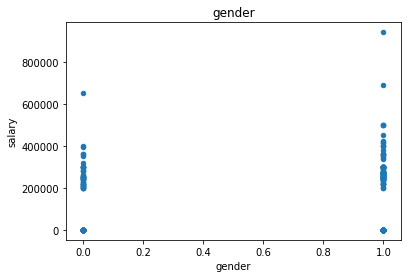

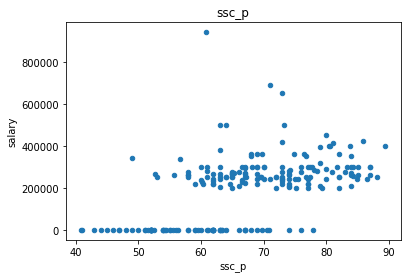

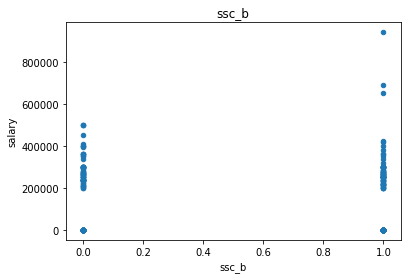

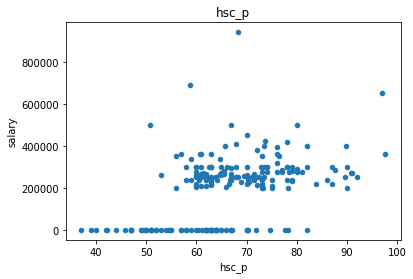

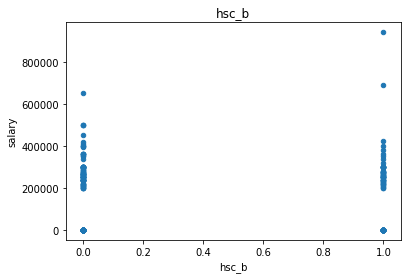

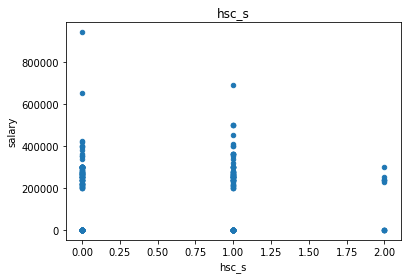

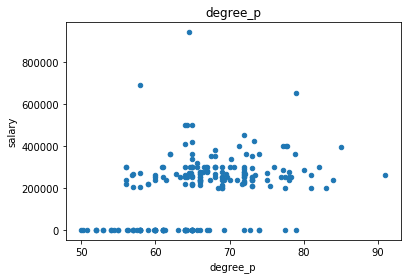

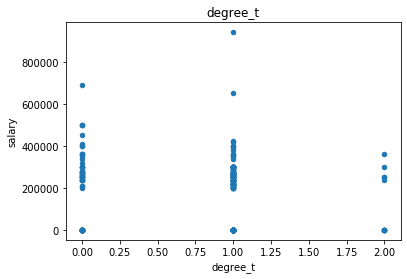

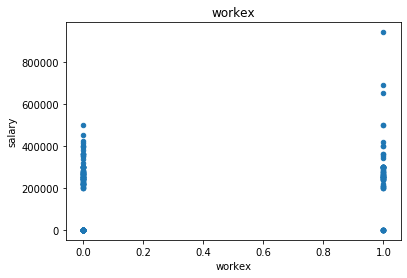

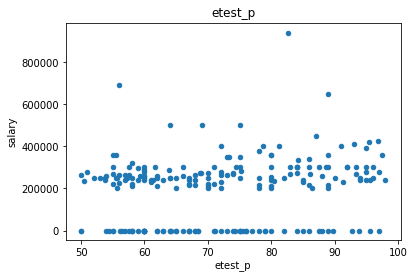

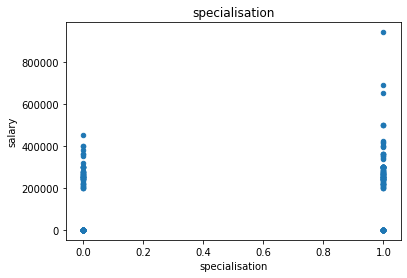

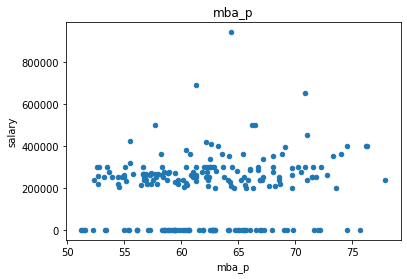

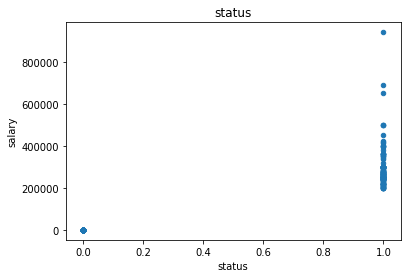

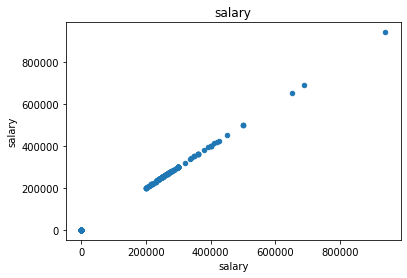

In [21]:
for c in df.columns:    
    try:
        df.plot(c,'salary',kind='scatter',title=c)
    except:
        pass

In [22]:
df.corr()['degree_t']

gender           -0.110567
ssc_p            -0.215745
ssc_b             0.087035
hsc_p            -0.009579
hsc_b             0.122604
hsc_s            -0.250514
degree_p         -0.180624
degree_t          1.000000
workex           -0.083505
etest_p          -0.005386
specialisation    0.014103
mba_p            -0.121357
status           -0.056572
salary           -0.112384
Name: degree_t, dtype: float64

After the first part of preprocessing we can now determine that there are many variables that correleate with our varibale of interest (degree)

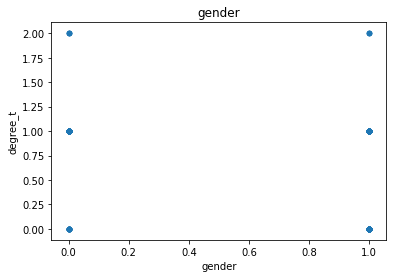

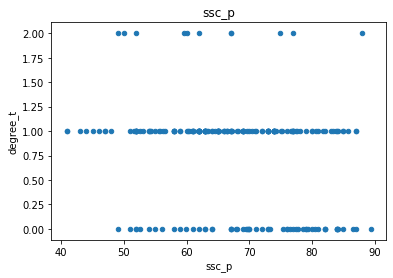

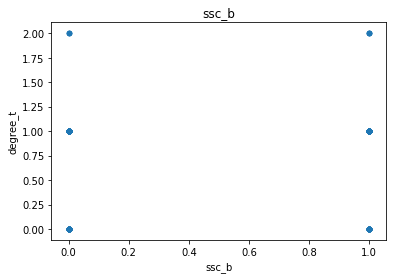

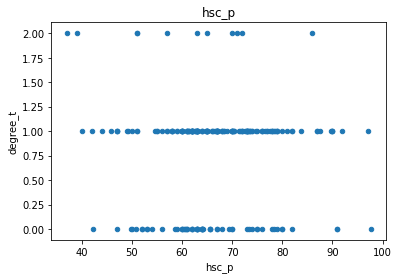

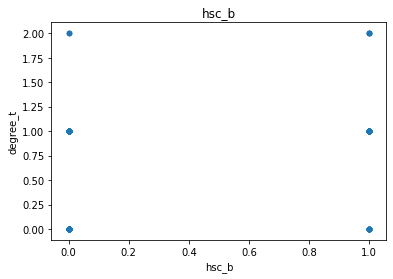

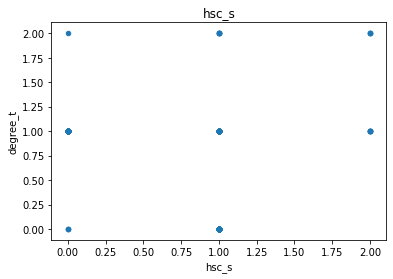

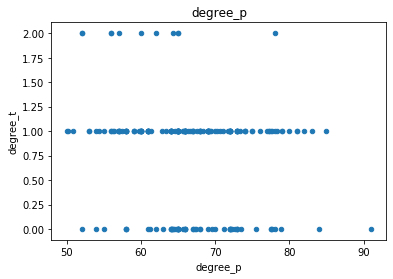

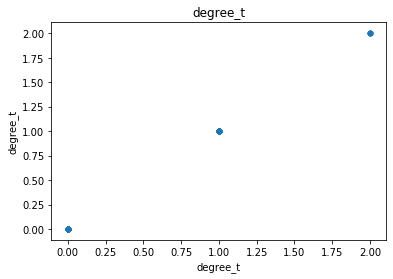

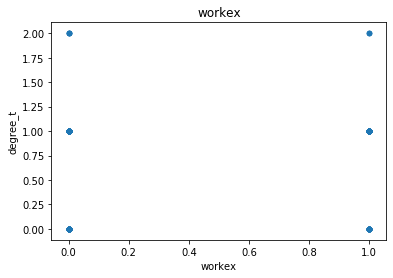

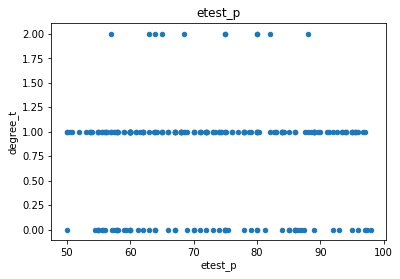

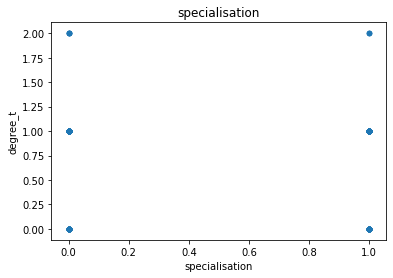

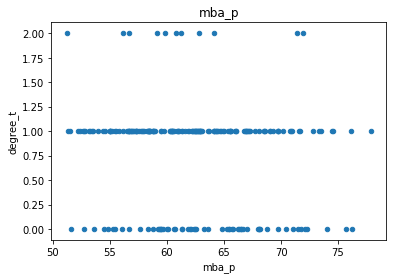

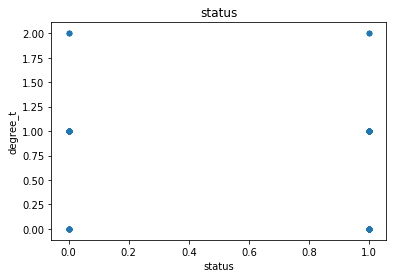

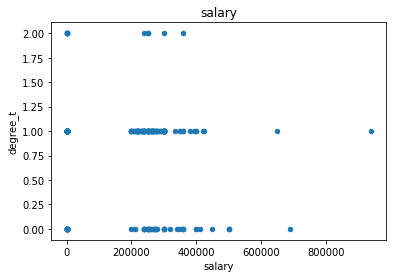

In [23]:
for c in df.columns:    
    try:
        df.plot(c,'degree_t',kind='scatter',title=c)
    except:
        pass

# Models
we are going to do models for two features: salary (predctive), degree(classification). 

For salary we are going to do linear models such that
\begin{align}
\vec{\theta} \cdot \vec{\mathbf{X}} & = Salary
\end{align}

And for the degree
\begin{align}
\vec{\theta} \cdot \vec{\mathbf{X}} & = Degree
\end{align}

We have to create our test and training sets

In [24]:
train,test=train_test_split(df,test_size=0.2,random_state=42)

### Prediction model for Salary

We are going to start with the models for salary Linear models from 1-N dimensions
based on the 4 features with the highest correlations

\begin{align}
\vec{\theta} \cdot \vec{\mathbf{status}} & = Salary
\end{align}

In [25]:
univarSalaryStatus=LinearRegression().fit(train['status'].values.reshape((-1,1)),train['salary'])
univarSalaryStatus.coef_

array([289914.52991453])

In [26]:
print('the Score of the model is: ', univarSalaryStatus.score(test['status'].values.reshape((-1,1)),test['salary']))

the Score of the model is:  0.7341180253269654


In this first model we can see that accuracy is 'high' mostly due to the fact that having a job implies that you have a salary

the second model based on the ssc_p             
\begin{align}
\vec{\theta} \cdot \vec{\mathbf{sscp}} & = Salary
\end{align}

In [27]:
univarSalarySsc_p=LinearRegression().fit(train['ssc_p'].values.reshape((-1,1)),train['salary'])
univarSalarySsc_p.coef_

array([7939.25344376])

In [28]:
print('the Score of the model is: ', univarSalarySsc_p.score(test['ssc_p'].values.reshape((-1,1)),test['salary']))

the Score of the model is:  0.2136818306435675


In this model the accuracy dwindle to ~1/4 of the accuracy of the previous model

the second model based on the hsc_p             
\begin{align}
\vec{\theta} \cdot \vec{\mathbf{hscp}} & = Salary
\end{align}

In [29]:
univarSalaryHsc_p=LinearRegression().fit(train['hsc_p'].values.reshape((-1,1)),train['salary'])
univarSalaryHsc_p.coef_

array([6714.95850694])

In [30]:
print('the Score of the model is: ', univarSalaryHsc_p.score(test['hsc_p'].values.reshape((-1,1)),test['salary']))

the Score of the model is:  0.029599473052214442


Now in this last model the accuracy is even less than 10%

Now we build multivariate models

we are going
\begin{align}
\vec{\theta} \cdot \vec{\mathbf{features}} & = Salary
\end{align}

In [31]:
orderedCorrelations=abs(df.corr()['salary']).sort_values(ascending=False).keys()
maxScore=0
bestCombination=[]
for sizeComb in range(2,len(orderedCorrelations)-1):
    for comb in combinations(orderedCorrelations[1:], sizeComb):
        model=LinearRegression().fit(train[list(comb)],train['salary'])
        score=model.score(test[list(comb)],test['salary'])
        print(comb,' : ',score)
        if(score>maxScore):
            maxScore=score
            bestCombination=comb

('status', 'ssc_p')  :  0.734778597566248
('status', 'hsc_p')  :  0.7218787593248477
('status', 'degree_p')  :  0.7333563177140405
('status', 'workex')  :  0.7440004838405331
('status', 'specialisation')  :  0.7318768044481507
('status', 'etest_p')  :  0.7145174975274391
('status', 'gender')  :  0.7457404146685023
('status', 'mba_p')  :  0.7359054602100236
('status', 'degree_t')  :  0.7462742847925996
('status', 'hsc_s')  :  0.7250547671603103
('status', 'ssc_b')  :  0.7341130795889073
('status', 'hsc_b')  :  0.7321653521287697
('ssc_p', 'hsc_p')  :  0.20899537459401674
('ssc_p', 'degree_p')  :  0.17510351043205585
('ssc_p', 'workex')  :  0.3014113402101013
('ssc_p', 'specialisation')  :  0.23819294529854373
('ssc_p', 'etest_p')  :  0.2020023797064443
('ssc_p', 'gender')  :  0.294864192248093
('ssc_p', 'mba_p')  :  0.22832460249962405
('ssc_p', 'degree_t')  :  0.213535922532318
('ssc_p', 'hsc_s')  :  0.21300538377494982
('ssc_p', 'ssc_b')  :  0.2133794697754381
('ssc_p', 'hsc_b')  :  0

('ssc_p', 'gender', 'hsc_s')  :  0.2965082562430149
('ssc_p', 'gender', 'ssc_b')  :  0.2968807594193098
('ssc_p', 'gender', 'hsc_b')  :  0.29746289033351153
('ssc_p', 'mba_p', 'degree_t')  :  0.22824865866145283
('ssc_p', 'mba_p', 'hsc_s')  :  0.22676581349156477
('ssc_p', 'mba_p', 'ssc_b')  :  0.22782834929547313
('ssc_p', 'mba_p', 'hsc_b')  :  0.22799023372022498
('ssc_p', 'degree_t', 'hsc_s')  :  0.2122214244510948
('ssc_p', 'degree_t', 'ssc_b')  :  0.2132401553389088
('ssc_p', 'degree_t', 'hsc_b')  :  0.21309484915734656
('ssc_p', 'hsc_s', 'ssc_b')  :  0.21260331392058407
('ssc_p', 'hsc_s', 'hsc_b')  :  0.21231451044903552
('ssc_p', 'ssc_b', 'hsc_b')  :  0.21333567188210822
('hsc_p', 'degree_p', 'workex')  :  0.14259309447134982
('hsc_p', 'degree_p', 'specialisation')  :  0.04775843274514646
('hsc_p', 'degree_p', 'etest_p')  :  -0.006687145601518951
('hsc_p', 'degree_p', 'gender')  :  0.12230131269371314
('hsc_p', 'degree_p', 'mba_p')  :  0.03472743517394594
('hsc_p', 'degree_p', '

('etest_p', 'gender', 'ssc_b')  :  -0.028351102289071006
('etest_p', 'gender', 'hsc_b')  :  -0.019032014152619015
('etest_p', 'mba_p', 'degree_t')  :  -0.11217591288355577
('etest_p', 'mba_p', 'hsc_s')  :  -0.11064405986390713
('etest_p', 'mba_p', 'ssc_b')  :  -0.09082279790428482
('etest_p', 'mba_p', 'hsc_b')  :  -0.08521707257802458
('etest_p', 'degree_t', 'hsc_s')  :  -0.12476303499289854
('etest_p', 'degree_t', 'ssc_b')  :  -0.10172483592105275
('etest_p', 'degree_t', 'hsc_b')  :  -0.08905024612109735
('etest_p', 'hsc_s', 'ssc_b')  :  -0.1023753681602486
('etest_p', 'hsc_s', 'hsc_b')  :  -0.09273067594335062
('etest_p', 'ssc_b', 'hsc_b')  :  -0.07427106876787981
('gender', 'mba_p', 'degree_t')  :  0.05578069349499726
('gender', 'mba_p', 'hsc_s')  :  0.053997953175316186
('gender', 'mba_p', 'ssc_b')  :  0.08260706927612937
('gender', 'mba_p', 'hsc_b')  :  0.08331289807521758
('gender', 'degree_t', 'hsc_s')  :  -0.01648697050938175
('gender', 'degree_t', 'ssc_b')  :  0.03601825088296

('status', 'degree_p', 'etest_p', 'gender')  :  0.7253658061133034
('status', 'degree_p', 'etest_p', 'mba_p')  :  0.7224207807817025
('status', 'degree_p', 'etest_p', 'degree_t')  :  0.7298475651589689
('status', 'degree_p', 'etest_p', 'hsc_s')  :  0.7090599880002219
('status', 'degree_p', 'etest_p', 'ssc_b')  :  0.7148704297347052
('status', 'degree_p', 'etest_p', 'hsc_b')  :  0.7134668690942209
('status', 'degree_p', 'gender', 'mba_p')  :  0.7591297760377267
('status', 'degree_p', 'gender', 'degree_t')  :  0.7537420274063137
('status', 'degree_p', 'gender', 'hsc_s')  :  0.7371723231701736
('status', 'degree_p', 'gender', 'ssc_b')  :  0.7442231291067661
('status', 'degree_p', 'gender', 'hsc_b')  :  0.7424601572021106
('status', 'degree_p', 'mba_p', 'degree_t')  :  0.7526238248544662
('status', 'degree_p', 'mba_p', 'hsc_s')  :  0.7330437034852599
('status', 'degree_p', 'mba_p', 'ssc_b')  :  0.7412661416200064
('status', 'degree_p', 'mba_p', 'hsc_b')  :  0.7408905013196266
('status', 'd

('ssc_p', 'degree_p', 'workex', 'specialisation')  :  0.28211511189782457
('ssc_p', 'degree_p', 'workex', 'etest_p')  :  0.2514894700278676
('ssc_p', 'degree_p', 'workex', 'gender')  :  0.3437879768182941
('ssc_p', 'degree_p', 'workex', 'mba_p')  :  0.31069459218729795
('ssc_p', 'degree_p', 'workex', 'degree_t')  :  0.26596942734704365
('ssc_p', 'degree_p', 'workex', 'hsc_s')  :  0.26659728029230245
('ssc_p', 'degree_p', 'workex', 'ssc_b')  :  0.2626547921746679
('ssc_p', 'degree_p', 'workex', 'hsc_b')  :  0.25894493697908405
('ssc_p', 'degree_p', 'specialisation', 'etest_p')  :  0.2067750270358062
('ssc_p', 'degree_p', 'specialisation', 'gender')  :  0.29590835910016844
('ssc_p', 'degree_p', 'specialisation', 'mba_p')  :  0.24381523841506003
('ssc_p', 'degree_p', 'specialisation', 'degree_t')  :  0.21493459857372477
('ssc_p', 'degree_p', 'specialisation', 'hsc_s')  :  0.20973014272604376
('ssc_p', 'degree_p', 'specialisation', 'ssc_b')  :  0.21599122396570727
('ssc_p', 'degree_p', 'sp

('hsc_p', 'degree_p', 'workex', 'mba_p')  :  0.1709518905822729
('hsc_p', 'degree_p', 'workex', 'degree_t')  :  0.1465447123828446
('hsc_p', 'degree_p', 'workex', 'hsc_s')  :  0.14202269782942833
('hsc_p', 'degree_p', 'workex', 'ssc_b')  :  0.15485875717654107
('hsc_p', 'degree_p', 'workex', 'hsc_b')  :  0.1364210638199861
('hsc_p', 'degree_p', 'specialisation', 'etest_p')  :  0.025544747304518833
('hsc_p', 'degree_p', 'specialisation', 'gender')  :  0.13490715379104445
('hsc_p', 'degree_p', 'specialisation', 'mba_p')  :  0.056592561182223
('hsc_p', 'degree_p', 'specialisation', 'degree_t')  :  0.05487721421628733
('hsc_p', 'degree_p', 'specialisation', 'hsc_s')  :  0.053746943634974564
('hsc_p', 'degree_p', 'specialisation', 'ssc_b')  :  0.05055923973654442
('hsc_p', 'degree_p', 'specialisation', 'hsc_b')  :  0.046699334538471304
('hsc_p', 'degree_p', 'etest_p', 'gender')  :  0.09614244515014479
('hsc_p', 'degree_p', 'etest_p', 'mba_p')  :  0.007021893416512937
('hsc_p', 'degree_p', '

('degree_p', 'workex', 'gender', 'hsc_s')  :  0.22896808204417762
('degree_p', 'workex', 'gender', 'ssc_b')  :  0.24209899626360043
('degree_p', 'workex', 'gender', 'hsc_b')  :  0.23710782339632833
('degree_p', 'workex', 'mba_p', 'degree_t')  :  0.14919297421393207
('degree_p', 'workex', 'mba_p', 'hsc_s')  :  0.1334281444397556
('degree_p', 'workex', 'mba_p', 'ssc_b')  :  0.15409886520575644
('degree_p', 'workex', 'mba_p', 'hsc_b')  :  0.14083001759859126
('degree_p', 'workex', 'degree_t', 'hsc_s')  :  0.12437975577917249
('degree_p', 'workex', 'degree_t', 'ssc_b')  :  0.14368248354577717
('degree_p', 'workex', 'degree_t', 'hsc_b')  :  0.1332020687998422
('degree_p', 'workex', 'hsc_s', 'ssc_b')  :  0.13054958257839921
('degree_p', 'workex', 'hsc_s', 'hsc_b')  :  0.11811852322578509
('degree_p', 'workex', 'ssc_b', 'hsc_b')  :  0.13917031058056528
('degree_p', 'specialisation', 'etest_p', 'gender')  :  0.11824598037350276
('degree_p', 'specialisation', 'etest_p', 'mba_p')  :  0.022436682

('specialisation', 'etest_p', 'degree_t', 'hsc_b')  :  -0.07212537337156188
('specialisation', 'etest_p', 'hsc_s', 'ssc_b')  :  -0.1005887036054669
('specialisation', 'etest_p', 'hsc_s', 'hsc_b')  :  -0.08771427305465918
('specialisation', 'etest_p', 'ssc_b', 'hsc_b')  :  -0.0631392513654585
('specialisation', 'gender', 'mba_p', 'degree_t')  :  0.023890765093381727
('specialisation', 'gender', 'mba_p', 'hsc_s')  :  0.01404564180956469
('specialisation', 'gender', 'mba_p', 'ssc_b')  :  0.051832146659583356
('specialisation', 'gender', 'mba_p', 'hsc_b')  :  0.056211941616797545
('specialisation', 'gender', 'degree_t', 'hsc_s')  :  -0.07572009357988962
('specialisation', 'gender', 'degree_t', 'ssc_b')  :  -0.011428172891302157
('specialisation', 'gender', 'degree_t', 'hsc_b')  :  -0.006197752567247639
('specialisation', 'gender', 'hsc_s', 'ssc_b')  :  -0.0389742732116094
('specialisation', 'gender', 'hsc_s', 'hsc_b')  :  -0.03435154477261482
('specialisation', 'gender', 'ssc_b', 'hsc_b') 

('status', 'ssc_p', 'degree_p', 'gender', 'degree_t')  :  0.7542631672192828
('status', 'ssc_p', 'degree_p', 'gender', 'hsc_s')  :  0.7390663682512266
('status', 'ssc_p', 'degree_p', 'gender', 'ssc_b')  :  0.7458389139496495
('status', 'ssc_p', 'degree_p', 'gender', 'hsc_b')  :  0.7441594152712949
('status', 'ssc_p', 'degree_p', 'mba_p', 'degree_t')  :  0.7502369205240725
('status', 'ssc_p', 'degree_p', 'mba_p', 'hsc_s')  :  0.7285608343922738
('status', 'ssc_p', 'degree_p', 'mba_p', 'ssc_b')  :  0.7376630959650798
('status', 'ssc_p', 'degree_p', 'mba_p', 'hsc_b')  :  0.7371582567592058
('status', 'ssc_p', 'degree_p', 'degree_t', 'hsc_s')  :  0.739744730910262
('status', 'ssc_p', 'degree_p', 'degree_t', 'ssc_b')  :  0.746192903203617
('status', 'ssc_p', 'degree_p', 'degree_t', 'hsc_b')  :  0.7444868353174032
('status', 'ssc_p', 'degree_p', 'hsc_s', 'ssc_b')  :  0.7255247100031321
('status', 'ssc_p', 'degree_p', 'hsc_s', 'hsc_b')  :  0.7238762208205378
('status', 'ssc_p', 'degree_p', 's

('status', 'hsc_p', 'degree_p', 'etest_p', 'degree_t')  :  0.7239770321601671
('status', 'hsc_p', 'degree_p', 'etest_p', 'hsc_s')  :  0.7049026331633265
('status', 'hsc_p', 'degree_p', 'etest_p', 'ssc_b')  :  0.706985098055296
('status', 'hsc_p', 'degree_p', 'etest_p', 'hsc_b')  :  0.7069637986534691
('status', 'hsc_p', 'degree_p', 'gender', 'mba_p')  :  0.7536330732314
('status', 'hsc_p', 'degree_p', 'gender', 'degree_t')  :  0.7440489332325809
('status', 'hsc_p', 'degree_p', 'gender', 'hsc_s')  :  0.7300799539903516
('status', 'hsc_p', 'degree_p', 'gender', 'ssc_b')  :  0.73253404147216
('status', 'hsc_p', 'degree_p', 'gender', 'hsc_b')  :  0.731720514539205
('status', 'hsc_p', 'degree_p', 'mba_p', 'degree_t')  :  0.7474213622442939
('status', 'hsc_p', 'degree_p', 'mba_p', 'hsc_s')  :  0.7298272035228379
('status', 'hsc_p', 'degree_p', 'mba_p', 'ssc_b')  :  0.7352050823594511
('status', 'hsc_p', 'degree_p', 'mba_p', 'hsc_b')  :  0.7347594529426029
('status', 'hsc_p', 'degree_p', 'deg

('status', 'degree_p', 'workex', 'degree_t', 'ssc_b')  :  0.7544892362262695
('status', 'degree_p', 'workex', 'degree_t', 'hsc_b')  :  0.753716611041551
('status', 'degree_p', 'workex', 'hsc_s', 'ssc_b')  :  0.7341022309844522
('status', 'degree_p', 'workex', 'hsc_s', 'hsc_b')  :  0.7332130107013959
('status', 'degree_p', 'workex', 'ssc_b', 'hsc_b')  :  0.7424374026429799
('status', 'degree_p', 'specialisation', 'etest_p', 'gender')  :  0.7257473318396882
('status', 'degree_p', 'specialisation', 'etest_p', 'mba_p')  :  0.7245522107669429
('status', 'degree_p', 'specialisation', 'etest_p', 'degree_t')  :  0.7322379362025543
('status', 'degree_p', 'specialisation', 'etest_p', 'hsc_s')  :  0.7095246448090815
('status', 'degree_p', 'specialisation', 'etest_p', 'ssc_b')  :  0.7162413516619235
('status', 'degree_p', 'specialisation', 'etest_p', 'hsc_b')  :  0.7148867333857496
('status', 'degree_p', 'specialisation', 'gender', 'mba_p')  :  0.757805921842859
('status', 'degree_p', 'specialisat

('status', 'specialisation', 'gender', 'mba_p', 'hsc_s')  :  0.7477144189566322
('status', 'specialisation', 'gender', 'mba_p', 'ssc_b')  :  0.7546504337274597
('status', 'specialisation', 'gender', 'mba_p', 'hsc_b')  :  0.7545733016553987
('status', 'specialisation', 'gender', 'degree_t', 'hsc_s')  :  0.7446217495225462
('status', 'specialisation', 'gender', 'degree_t', 'ssc_b')  :  0.7526924087537896
('status', 'specialisation', 'gender', 'degree_t', 'hsc_b')  :  0.7509282792625472
('status', 'specialisation', 'gender', 'hsc_s', 'ssc_b')  :  0.7328400282846121
('status', 'specialisation', 'gender', 'hsc_s', 'hsc_b')  :  0.7309958603554043
('status', 'specialisation', 'gender', 'ssc_b', 'hsc_b')  :  0.7397776723721794
('status', 'specialisation', 'mba_p', 'degree_t', 'hsc_s')  :  0.7370188320060249
('status', 'specialisation', 'mba_p', 'degree_t', 'ssc_b')  :  0.7450290917916778
('status', 'specialisation', 'mba_p', 'degree_t', 'hsc_b')  :  0.7446351873985761
('status', 'specialisatio

('ssc_p', 'hsc_p', 'workex', 'hsc_s', 'ssc_b')  :  0.2972021196454697
('ssc_p', 'hsc_p', 'workex', 'hsc_s', 'hsc_b')  :  0.2916165272297454
('ssc_p', 'hsc_p', 'workex', 'ssc_b', 'hsc_b')  :  0.28871243057149165
('ssc_p', 'hsc_p', 'specialisation', 'etest_p', 'gender')  :  0.2931955429100961
('ssc_p', 'hsc_p', 'specialisation', 'etest_p', 'mba_p')  :  0.23737014689694622
('ssc_p', 'hsc_p', 'specialisation', 'etest_p', 'degree_t')  :  0.21601210177017327
('ssc_p', 'hsc_p', 'specialisation', 'etest_p', 'hsc_s')  :  0.21711823363855276
('ssc_p', 'hsc_p', 'specialisation', 'etest_p', 'ssc_b')  :  0.21500584960004657
('ssc_p', 'hsc_p', 'specialisation', 'etest_p', 'hsc_b')  :  0.21841561922706165
('ssc_p', 'hsc_p', 'specialisation', 'gender', 'mba_p')  :  0.29091266481216416
('ssc_p', 'hsc_p', 'specialisation', 'gender', 'degree_t')  :  0.29190242928149757
('ssc_p', 'hsc_p', 'specialisation', 'gender', 'hsc_s')  :  0.29472028189818755
('ssc_p', 'hsc_p', 'specialisation', 'gender', 'ssc_b')  

('ssc_p', 'degree_p', 'etest_p', 'ssc_b', 'hsc_b')  :  0.16042131607072296
('ssc_p', 'degree_p', 'gender', 'mba_p', 'degree_t')  :  0.2797998076432223
('ssc_p', 'degree_p', 'gender', 'mba_p', 'hsc_s')  :  0.2791618669213657
('ssc_p', 'degree_p', 'gender', 'mba_p', 'ssc_b')  :  0.2774431726205374
('ssc_p', 'degree_p', 'gender', 'mba_p', 'hsc_b')  :  0.2795623828415762
('ssc_p', 'degree_p', 'gender', 'degree_t', 'hsc_s')  :  0.27431851422887465
('ssc_p', 'degree_p', 'gender', 'degree_t', 'ssc_b')  :  0.2733359371646742
('ssc_p', 'degree_p', 'gender', 'degree_t', 'hsc_b')  :  0.2752558462189416
('ssc_p', 'degree_p', 'gender', 'hsc_s', 'ssc_b')  :  0.27241088195079144
('ssc_p', 'degree_p', 'gender', 'hsc_s', 'hsc_b')  :  0.27450635935273093
('ssc_p', 'degree_p', 'gender', 'ssc_b', 'hsc_b')  :  0.271944252753498
('ssc_p', 'degree_p', 'mba_p', 'degree_t', 'hsc_s')  :  0.2044689310524086
('ssc_p', 'degree_p', 'mba_p', 'degree_t', 'ssc_b')  :  0.20229105334256692
('ssc_p', 'degree_p', 'mba_p',

('ssc_p', 'etest_p', 'gender', 'degree_t', 'ssc_b')  :  0.2895436562754774
('ssc_p', 'etest_p', 'gender', 'degree_t', 'hsc_b')  :  0.28967788476530787
('ssc_p', 'etest_p', 'gender', 'hsc_s', 'ssc_b')  :  0.2892123555268796
('ssc_p', 'etest_p', 'gender', 'hsc_s', 'hsc_b')  :  0.28984740370684614
('ssc_p', 'etest_p', 'gender', 'ssc_b', 'hsc_b')  :  0.28881379198946855
('ssc_p', 'etest_p', 'mba_p', 'degree_t', 'hsc_s')  :  0.21712324735481592
('ssc_p', 'etest_p', 'mba_p', 'degree_t', 'ssc_b')  :  0.22048496362030892
('ssc_p', 'etest_p', 'mba_p', 'degree_t', 'hsc_b')  :  0.219630525996663
('ssc_p', 'etest_p', 'mba_p', 'hsc_s', 'ssc_b')  :  0.220101206934565
('ssc_p', 'etest_p', 'mba_p', 'hsc_s', 'hsc_b')  :  0.21940745344665846
('ssc_p', 'etest_p', 'mba_p', 'ssc_b', 'hsc_b')  :  0.22125955084613946
('ssc_p', 'etest_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.20090816274805667
('ssc_p', 'etest_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.19957712530014227
('ssc_p', 'etest_p', 'degree_t', 'ssc_b', 'h

('hsc_p', 'workex', 'specialisation', 'etest_p', 'hsc_s')  :  0.11358550877916507
('hsc_p', 'workex', 'specialisation', 'etest_p', 'ssc_b')  :  0.10774469000850029
('hsc_p', 'workex', 'specialisation', 'etest_p', 'hsc_b')  :  0.11383628586974513
('hsc_p', 'workex', 'specialisation', 'gender', 'mba_p')  :  0.1713228778847814
('hsc_p', 'workex', 'specialisation', 'gender', 'degree_t')  :  0.17303036404466585
('hsc_p', 'workex', 'specialisation', 'gender', 'hsc_s')  :  0.17896027030403794
('hsc_p', 'workex', 'specialisation', 'gender', 'ssc_b')  :  0.17545903600046084
('hsc_p', 'workex', 'specialisation', 'gender', 'hsc_b')  :  0.17485194784934743
('hsc_p', 'workex', 'specialisation', 'mba_p', 'degree_t')  :  0.14522504156898308
('hsc_p', 'workex', 'specialisation', 'mba_p', 'hsc_s')  :  0.1391448018188065
('hsc_p', 'workex', 'specialisation', 'mba_p', 'ssc_b')  :  0.13850366307791706
('hsc_p', 'workex', 'specialisation', 'mba_p', 'hsc_b')  :  0.1373586216595315
('hsc_p', 'workex', 'speci

('hsc_p', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.050014249865041445
('hsc_p', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.04730206379296775
('hsc_p', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.0370352658041585
('hsc_p', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.03873889675566333
('hsc_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.03369835061474702
('degree_p', 'workex', 'specialisation', 'etest_p', 'gender')  :  0.20012891902807495
('degree_p', 'workex', 'specialisation', 'etest_p', 'mba_p')  :  0.13072301149808585
('degree_p', 'workex', 'specialisation', 'etest_p', 'degree_t')  :  0.10928978200825135
('degree_p', 'workex', 'specialisation', 'etest_p', 'hsc_s')  :  0.0982831979760136
('degree_p', 'workex', 'specialisation', 'etest_p', 'ssc_b')  :  0.11573519109249009
('degree_p', 'workex', 'specialisation', 'etest_p', 'hsc_b')  :  0.11416460414567275
('degree_p', 'workex', 'specialisation', 'gender', 'mba_p')  :  0.23558314348334353
('degree_p', 'workex', 'specialisation', 

('degree_p', 'etest_p', 'mba_p', 'hsc_s', 'hsc_b')  :  -0.03980954535786485
('degree_p', 'etest_p', 'mba_p', 'ssc_b', 'hsc_b')  :  -0.02867343599656036
('degree_p', 'etest_p', 'degree_t', 'hsc_s', 'ssc_b')  :  -0.051218316577292144
('degree_p', 'etest_p', 'degree_t', 'hsc_s', 'hsc_b')  :  -0.05046561068845534
('degree_p', 'etest_p', 'degree_t', 'ssc_b', 'hsc_b')  :  -0.04007133719307032
('degree_p', 'etest_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  -0.04277246777338939
('degree_p', 'gender', 'mba_p', 'degree_t', 'hsc_s')  :  0.12144917303475032
('degree_p', 'gender', 'mba_p', 'degree_t', 'ssc_b')  :  0.13079021269942026
('degree_p', 'gender', 'mba_p', 'degree_t', 'hsc_b')  :  0.1305523401124714
('degree_p', 'gender', 'mba_p', 'hsc_s', 'ssc_b')  :  0.1274043213839927
('degree_p', 'gender', 'mba_p', 'hsc_s', 'hsc_b')  :  0.1269843912456834
('degree_p', 'gender', 'mba_p', 'ssc_b', 'hsc_b')  :  0.13667468634800528
('degree_p', 'gender', 'degree_t', 'hsc_s', 'ssc_b')  :  0.12762045976284087
('degre

('specialisation', 'gender', 'degree_t', 'hsc_s', 'ssc_b')  :  -0.08063991176559848
('specialisation', 'gender', 'degree_t', 'hsc_s', 'hsc_b')  :  -0.07575927339659594
('specialisation', 'gender', 'degree_t', 'ssc_b', 'hsc_b')  :  -0.013778163473267657
('specialisation', 'gender', 'hsc_s', 'ssc_b', 'hsc_b')  :  -0.04037034923120575
('specialisation', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  -0.09415612408503948
('specialisation', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  -0.09210419382509571
('specialisation', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  -0.04567717789340975
('specialisation', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  -0.0716479869867892
('specialisation', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  -0.10168037405776276
('etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s')  :  -0.07510223139874594
('etest_p', 'gender', 'mba_p', 'degree_t', 'ssc_b')  :  -0.04791849907470347
('etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_b')  :  -0.037316711487481724
('etest_p', 'gender', '

('status', 'ssc_p', 'hsc_p', 'specialisation', 'ssc_b', 'hsc_b')  :  0.716096903381351
('status', 'ssc_p', 'hsc_p', 'etest_p', 'gender', 'mba_p')  :  0.7195010775050266
('status', 'ssc_p', 'hsc_p', 'etest_p', 'gender', 'degree_t')  :  0.718517899692318
('status', 'ssc_p', 'hsc_p', 'etest_p', 'gender', 'hsc_s')  :  0.7056422630507366
('status', 'ssc_p', 'hsc_p', 'etest_p', 'gender', 'ssc_b')  :  0.7033547274515194
('status', 'ssc_p', 'hsc_p', 'etest_p', 'gender', 'hsc_b')  :  0.705780992224246
('status', 'ssc_p', 'hsc_p', 'etest_p', 'mba_p', 'degree_t')  :  0.7091512822912147
('status', 'ssc_p', 'hsc_p', 'etest_p', 'mba_p', 'hsc_s')  :  0.6932426821705947
('status', 'ssc_p', 'hsc_p', 'etest_p', 'mba_p', 'ssc_b')  :  0.6947800914403757
('status', 'ssc_p', 'hsc_p', 'etest_p', 'mba_p', 'hsc_b')  :  0.6969166006146983
('status', 'ssc_p', 'hsc_p', 'etest_p', 'degree_t', 'hsc_s')  :  0.7056904311835174
('status', 'ssc_p', 'hsc_p', 'etest_p', 'degree_t', 'ssc_b')  :  0.7034954757936904
('statu

('status', 'ssc_p', 'degree_p', 'mba_p', 'degree_t', 'hsc_s')  :  0.7431606375726975
('status', 'ssc_p', 'degree_p', 'mba_p', 'degree_t', 'ssc_b')  :  0.7503046751525524
('status', 'ssc_p', 'degree_p', 'mba_p', 'degree_t', 'hsc_b')  :  0.7500918025045242
('status', 'ssc_p', 'degree_p', 'mba_p', 'hsc_s', 'ssc_b')  :  0.7285597307158993
('status', 'ssc_p', 'degree_p', 'mba_p', 'hsc_s', 'hsc_b')  :  0.7281223099271349
('status', 'ssc_p', 'degree_p', 'mba_p', 'ssc_b', 'hsc_b')  :  0.7367777644907271
('status', 'ssc_p', 'degree_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.7396214829415355
('status', 'ssc_p', 'degree_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.738230836015036
('status', 'ssc_p', 'degree_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.7439294605909701
('status', 'ssc_p', 'degree_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7234414518036769
('status', 'ssc_p', 'workex', 'specialisation', 'etest_p', 'gender')  :  0.7282974599284224
('status', 'ssc_p', 'workex', 'specialisation', 'etest_p', 'mba_p')  : 

('status', 'ssc_p', 'specialisation', 'degree_t', 'hsc_s', 'hsc_b')  :  0.7333208125772194
('status', 'ssc_p', 'specialisation', 'degree_t', 'ssc_b', 'hsc_b')  :  0.742155142587261
('status', 'ssc_p', 'specialisation', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.719765431893469
('status', 'ssc_p', 'etest_p', 'gender', 'mba_p', 'degree_t')  :  0.7313788288803348
('status', 'ssc_p', 'etest_p', 'gender', 'mba_p', 'hsc_s')  :  0.7183702077207169
('status', 'ssc_p', 'etest_p', 'gender', 'mba_p', 'ssc_b')  :  0.722856865059575
('status', 'ssc_p', 'etest_p', 'gender', 'mba_p', 'hsc_b')  :  0.7242046400565288
('status', 'ssc_p', 'etest_p', 'gender', 'degree_t', 'hsc_s')  :  0.7223485537739265
('status', 'ssc_p', 'etest_p', 'gender', 'degree_t', 'ssc_b')  :  0.7273313346300523
('status', 'ssc_p', 'etest_p', 'gender', 'degree_t', 'hsc_b')  :  0.7273237609909402
('status', 'ssc_p', 'etest_p', 'gender', 'hsc_s', 'ssc_b')  :  0.711339710505588
('status', 'ssc_p', 'etest_p', 'gender', 'hsc_s', 'hsc_b')  :  0.7

('status', 'hsc_p', 'degree_p', 'etest_p', 'degree_t', 'hsc_s')  :  0.7205086484920513
('status', 'hsc_p', 'degree_p', 'etest_p', 'degree_t', 'ssc_b')  :  0.7209603370118147
('status', 'hsc_p', 'degree_p', 'etest_p', 'degree_t', 'hsc_b')  :  0.7217018492974511
('status', 'hsc_p', 'degree_p', 'etest_p', 'hsc_s', 'ssc_b')  :  0.7025019810213745
('status', 'hsc_p', 'degree_p', 'etest_p', 'hsc_s', 'hsc_b')  :  0.7024641467901955
('status', 'hsc_p', 'degree_p', 'etest_p', 'ssc_b', 'hsc_b')  :  0.706793059137573
('status', 'hsc_p', 'degree_p', 'gender', 'mba_p', 'degree_t')  :  0.7607639544009607
('status', 'hsc_p', 'degree_p', 'gender', 'mba_p', 'hsc_s')  :  0.750032476055281
('status', 'hsc_p', 'degree_p', 'gender', 'mba_p', 'ssc_b')  :  0.7531420572311548
('status', 'hsc_p', 'degree_p', 'gender', 'mba_p', 'hsc_b')  :  0.7535309149098097
('status', 'hsc_p', 'degree_p', 'gender', 'degree_t', 'hsc_s')  :  0.7412983407744449
('status', 'hsc_p', 'degree_p', 'gender', 'degree_t', 'ssc_b')  :  0

('status', 'hsc_p', 'specialisation', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7139895583385163
('status', 'hsc_p', 'etest_p', 'gender', 'mba_p', 'degree_t')  :  0.738001251919939
('status', 'hsc_p', 'etest_p', 'gender', 'mba_p', 'hsc_s')  :  0.7287300613246878
('status', 'hsc_p', 'etest_p', 'gender', 'mba_p', 'ssc_b')  :  0.7303737258379457
('status', 'hsc_p', 'etest_p', 'gender', 'mba_p', 'hsc_b')  :  0.7317782505937045
('status', 'hsc_p', 'etest_p', 'gender', 'degree_t', 'hsc_s')  :  0.724801914785896
('status', 'hsc_p', 'etest_p', 'gender', 'degree_t', 'ssc_b')  :  0.7247450220704237
('status', 'hsc_p', 'etest_p', 'gender', 'degree_t', 'hsc_b')  :  0.7260293652936913
('status', 'hsc_p', 'etest_p', 'gender', 'hsc_s', 'ssc_b')  :  0.7117251691534656
('status', 'hsc_p', 'etest_p', 'gender', 'hsc_s', 'hsc_b')  :  0.7120592014079118
('status', 'hsc_p', 'etest_p', 'gender', 'ssc_b', 'hsc_b')  :  0.7155760732722851
('status', 'hsc_p', 'etest_p', 'mba_p', 'degree_t', 'hsc_s')  :  0.718509364276104

('status', 'degree_p', 'specialisation', 'mba_p', 'degree_t', 'ssc_b')  :  0.7538422263221947
('status', 'degree_p', 'specialisation', 'mba_p', 'degree_t', 'hsc_b')  :  0.7532108337499488
('status', 'degree_p', 'specialisation', 'mba_p', 'hsc_s', 'ssc_b')  :  0.7311664593691727
('status', 'degree_p', 'specialisation', 'mba_p', 'hsc_s', 'hsc_b')  :  0.7304739794179266
('status', 'degree_p', 'specialisation', 'mba_p', 'ssc_b', 'hsc_b')  :  0.7398757565364249
('status', 'degree_p', 'specialisation', 'degree_t', 'hsc_s', 'ssc_b')  :  0.7375806238613434
('status', 'degree_p', 'specialisation', 'degree_t', 'hsc_s', 'hsc_b')  :  0.7361250092280682
('status', 'degree_p', 'specialisation', 'degree_t', 'ssc_b', 'hsc_b')  :  0.7444334508403618
('status', 'degree_p', 'specialisation', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.719993925543365
('status', 'degree_p', 'etest_p', 'gender', 'mba_p', 'degree_t')  :  0.7467958629251077
('status', 'degree_p', 'etest_p', 'gender', 'mba_p', 'hsc_s')  :  0.73350411423

('status', 'workex', 'etest_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7162832422846599
('status', 'workex', 'gender', 'mba_p', 'degree_t', 'hsc_s')  :  0.7611201002846604
('status', 'workex', 'gender', 'mba_p', 'degree_t', 'ssc_b')  :  0.7656845887516937
('status', 'workex', 'gender', 'mba_p', 'degree_t', 'hsc_b')  :  0.766747959993815
('status', 'workex', 'gender', 'mba_p', 'hsc_s', 'ssc_b')  :  0.7546951640782792
('status', 'workex', 'gender', 'mba_p', 'hsc_s', 'hsc_b')  :  0.7554263865630628
('status', 'workex', 'gender', 'mba_p', 'ssc_b', 'hsc_b')  :  0.7618973845902446
('status', 'workex', 'gender', 'degree_t', 'hsc_s', 'ssc_b')  :  0.756009886798791
('status', 'workex', 'gender', 'degree_t', 'hsc_s', 'hsc_b')  :  0.7556321007250147
('status', 'workex', 'gender', 'degree_t', 'ssc_b', 'hsc_b')  :  0.7625841390242997
('status', 'workex', 'gender', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7452271145145175
('status', 'workex', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.7444890705021662
('status'

('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'mba_p', 'hsc_b')  :  0.22466114056472297
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'degree_t', 'hsc_s')  :  0.19709852570828512
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'degree_t', 'ssc_b')  :  0.19769125550398747
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'degree_t', 'hsc_b')  :  0.19745782321709607
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'hsc_s', 'ssc_b')  :  0.19688659469458958
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'hsc_s', 'hsc_b')  :  0.19636773293261323
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'ssc_b', 'hsc_b')  :  0.19255117312675873
('ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'gender', 'mba_p')  :  0.25585708323534484
('ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'gender', 'degree_t')  :  0.2540254718517695
('ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'gender', 'hsc_s')  :  0.25269039748667343
('ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'gender', 'ssc_b')  :  0.24970175439608722
('ssc_p', 'h

('ssc_p', 'hsc_p', 'specialisation', 'degree_t', 'hsc_s', 'ssc_b')  :  0.21622965901885682
('ssc_p', 'hsc_p', 'specialisation', 'degree_t', 'hsc_s', 'hsc_b')  :  0.2180610138083395
('ssc_p', 'hsc_p', 'specialisation', 'degree_t', 'ssc_b', 'hsc_b')  :  0.2131966185868347
('ssc_p', 'hsc_p', 'specialisation', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.21419808390588924
('ssc_p', 'hsc_p', 'etest_p', 'gender', 'mba_p', 'degree_t')  :  0.27829015003183943
('ssc_p', 'hsc_p', 'etest_p', 'gender', 'mba_p', 'hsc_s')  :  0.28106369290164834
('ssc_p', 'hsc_p', 'etest_p', 'gender', 'mba_p', 'ssc_b')  :  0.2730869674932005
('ssc_p', 'hsc_p', 'etest_p', 'gender', 'mba_p', 'hsc_b')  :  0.28049573314508836
('ssc_p', 'hsc_p', 'etest_p', 'gender', 'degree_t', 'hsc_s')  :  0.28038128823153075
('ssc_p', 'hsc_p', 'etest_p', 'gender', 'degree_t', 'ssc_b')  :  0.27449499962456025
('ssc_p', 'hsc_p', 'etest_p', 'gender', 'degree_t', 'hsc_b')  :  0.2806445454138372
('ssc_p', 'hsc_p', 'etest_p', 'gender', 'hsc_s', 'ssc_b')

('ssc_p', 'degree_p', 'specialisation', 'gender', 'degree_t', 'hsc_s')  :  0.2966541321001489
('ssc_p', 'degree_p', 'specialisation', 'gender', 'degree_t', 'ssc_b')  :  0.3008411436826404
('ssc_p', 'degree_p', 'specialisation', 'gender', 'degree_t', 'hsc_b')  :  0.30112950145541806
('ssc_p', 'degree_p', 'specialisation', 'gender', 'hsc_s', 'ssc_b')  :  0.29688280798576516
('ssc_p', 'degree_p', 'specialisation', 'gender', 'hsc_s', 'hsc_b')  :  0.2973642103520391
('ssc_p', 'degree_p', 'specialisation', 'gender', 'ssc_b', 'hsc_b')  :  0.2988670697526711
('ssc_p', 'degree_p', 'specialisation', 'mba_p', 'degree_t', 'hsc_s')  :  0.23729602292446428
('ssc_p', 'degree_p', 'specialisation', 'mba_p', 'degree_t', 'ssc_b')  :  0.24438701230947912
('ssc_p', 'degree_p', 'specialisation', 'mba_p', 'degree_t', 'hsc_b')  :  0.2437728451874204
('ssc_p', 'degree_p', 'specialisation', 'mba_p', 'hsc_s', 'ssc_b')  :  0.238243784523557
('ssc_p', 'degree_p', 'specialisation', 'mba_p', 'hsc_s', 'hsc_b')  :  0.

('ssc_p', 'workex', 'etest_p', 'mba_p', 'degree_t', 'hsc_s')  :  0.31838817882304354
('ssc_p', 'workex', 'etest_p', 'mba_p', 'degree_t', 'ssc_b')  :  0.321248327215752
('ssc_p', 'workex', 'etest_p', 'mba_p', 'degree_t', 'hsc_b')  :  0.31846665659411766
('ssc_p', 'workex', 'etest_p', 'mba_p', 'hsc_s', 'ssc_b')  :  0.32022667697366725
('ssc_p', 'workex', 'etest_p', 'mba_p', 'hsc_s', 'hsc_b')  :  0.31691873300770756
('ssc_p', 'workex', 'etest_p', 'mba_p', 'ssc_b', 'hsc_b')  :  0.3176502545658466
('ssc_p', 'workex', 'etest_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.2889075033774511
('ssc_p', 'workex', 'etest_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.28463126907590575
('ssc_p', 'workex', 'etest_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.2855849206883728
('ssc_p', 'workex', 'etest_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.28503916099637605
('ssc_p', 'workex', 'gender', 'mba_p', 'degree_t', 'hsc_s')  :  0.3769966803981339
('ssc_p', 'workex', 'gender', 'mba_p', 'degree_t', 'ssc_b')  :  0.3786098088242098
(

('hsc_p', 'degree_p', 'workex', 'etest_p', 'mba_p', 'hsc_b')  :  0.14409854381470433
('hsc_p', 'degree_p', 'workex', 'etest_p', 'degree_t', 'hsc_s')  :  0.11204494531252472
('hsc_p', 'degree_p', 'workex', 'etest_p', 'degree_t', 'ssc_b')  :  0.11910365431161052
('hsc_p', 'degree_p', 'workex', 'etest_p', 'degree_t', 'hsc_b')  :  0.11076535630712547
('hsc_p', 'degree_p', 'workex', 'etest_p', 'hsc_s', 'ssc_b')  :  0.11972979330971734
('hsc_p', 'degree_p', 'workex', 'etest_p', 'hsc_s', 'hsc_b')  :  0.10917115158142277
('hsc_p', 'degree_p', 'workex', 'etest_p', 'ssc_b', 'hsc_b')  :  0.10459201332564216
('hsc_p', 'degree_p', 'workex', 'gender', 'mba_p', 'degree_t')  :  0.23016372333231327
('hsc_p', 'degree_p', 'workex', 'gender', 'mba_p', 'hsc_s')  :  0.23371836537463564
('hsc_p', 'degree_p', 'workex', 'gender', 'mba_p', 'ssc_b')  :  0.23710577819679313
('hsc_p', 'degree_p', 'workex', 'gender', 'mba_p', 'hsc_b')  :  0.22689753957276515
('hsc_p', 'degree_p', 'workex', 'gender', 'degree_t', 'hs

('hsc_p', 'degree_p', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.05031383924866073
('hsc_p', 'degree_p', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.052141897376060786
('hsc_p', 'degree_p', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.05317087249477558
('hsc_p', 'degree_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.034258030520750826
('hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p')  :  0.1483270954814523
('hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'degree_t')  :  0.14545036827528945
('hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'hsc_s')  :  0.15627349114329914
('hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'ssc_b')  :  0.14688798948093662
('hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'hsc_b')  :  0.15349928977099947
('hsc_p', 'workex', 'specialisation', 'etest_p', 'mba_p', 'degree_t')  :  0.1233159907873127
('hsc_p', 'workex', 'specialisation', 'etest_p', 'mba_p', 'hsc_s')  :  0.12212519640370978
('hsc_p', 'work

('hsc_p', 'specialisation', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.03112635278754794
('hsc_p', 'specialisation', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.03946680543287706
('hsc_p', 'specialisation', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.01985807595048472
('hsc_p', 'specialisation', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.024780291606436244
('hsc_p', 'specialisation', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.01610032800038852
('hsc_p', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s')  :  0.05522867562643785
('hsc_p', 'etest_p', 'gender', 'mba_p', 'degree_t', 'ssc_b')  :  0.03563889967544975
('hsc_p', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_b')  :  0.05190985276868698
('hsc_p', 'etest_p', 'gender', 'mba_p', 'hsc_s', 'ssc_b')  :  0.057302039329783394
('hsc_p', 'etest_p', 'gender', 'mba_p', 'hsc_s', 'hsc_b')  :  0.07095545354386645
('hsc_p', 'etest_p', 'gender', 'mba_p', 'ssc_b', 'hsc_b')  :  0.036213318694130914
('hsc_p', 'etest_p', 'gender', 'degree_t', '

('degree_p', 'specialisation', 'etest_p', 'mba_p', 'ssc_b', 'hsc_b')  :  0.01893063964365005
('degree_p', 'specialisation', 'etest_p', 'degree_t', 'hsc_s', 'ssc_b')  :  -0.013453590692379391
('degree_p', 'specialisation', 'etest_p', 'degree_t', 'hsc_s', 'hsc_b')  :  -0.010574738598750244
('degree_p', 'specialisation', 'etest_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.005178478404180287
('degree_p', 'specialisation', 'etest_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  -0.002621891346380467
('degree_p', 'specialisation', 'gender', 'mba_p', 'degree_t', 'hsc_s')  :  0.13166497728866644
('degree_p', 'specialisation', 'gender', 'mba_p', 'degree_t', 'ssc_b')  :  0.1496098453455792
('degree_p', 'specialisation', 'gender', 'mba_p', 'degree_t', 'hsc_b')  :  0.1510352733368867
('degree_p', 'specialisation', 'gender', 'mba_p', 'hsc_s', 'ssc_b')  :  0.1432267301148541
('degree_p', 'specialisation', 'gender', 'mba_p', 'hsc_s', 'hsc_b')  :  0.14457402461105973
('degree_p', 'specialisation', 'gender', 'mba_p', 'ss

('specialisation', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  -0.08492061644420068
('specialisation', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  -0.10354701170726255
('etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  -0.08386370335262372
('etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  -0.07392372927157198
('etest_p', 'gender', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  -0.05346618526943692
('etest_p', 'gender', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  -0.03297593046827907
('etest_p', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  -0.11658756110375679
('etest_p', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  -0.16082151384493362
('gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.008827342636317237
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p')  :  0.7108973508726986
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'gender')  :  0.7385117861236079
('status', 'ss

('status', 'ssc_p', 'hsc_p', 'workex', 'specialisation', 'hsc_s', 'ssc_b')  :  0.7192732878485841
('status', 'ssc_p', 'hsc_p', 'workex', 'specialisation', 'hsc_s', 'hsc_b')  :  0.7194601856401016
('status', 'ssc_p', 'hsc_p', 'workex', 'specialisation', 'ssc_b', 'hsc_b')  :  0.7254821230488433
('status', 'ssc_p', 'hsc_p', 'workex', 'etest_p', 'gender', 'mba_p')  :  0.7242675087385895
('status', 'ssc_p', 'hsc_p', 'workex', 'etest_p', 'gender', 'degree_t')  :  0.7265317600922285
('status', 'ssc_p', 'hsc_p', 'workex', 'etest_p', 'gender', 'hsc_s')  :  0.7140378725544337
('status', 'ssc_p', 'hsc_p', 'workex', 'etest_p', 'gender', 'ssc_b')  :  0.7126517851877092
('status', 'ssc_p', 'hsc_p', 'workex', 'etest_p', 'gender', 'hsc_b')  :  0.7158995943861712
('status', 'ssc_p', 'hsc_p', 'workex', 'etest_p', 'mba_p', 'degree_t')  :  0.7154385149067853
('status', 'ssc_p', 'hsc_p', 'workex', 'etest_p', 'mba_p', 'hsc_s')  :  0.7002436111366712
('status', 'ssc_p', 'hsc_p', 'workex', 'etest_p', 'mba_p',

('status', 'ssc_p', 'hsc_p', 'etest_p', 'mba_p', 'hsc_s', 'ssc_b')  :  0.6897979728826713
('status', 'ssc_p', 'hsc_p', 'etest_p', 'mba_p', 'hsc_s', 'hsc_b')  :  0.6918235696505244
('status', 'ssc_p', 'hsc_p', 'etest_p', 'mba_p', 'ssc_b', 'hsc_b')  :  0.6952124469808995
('status', 'ssc_p', 'hsc_p', 'etest_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.699351813020061
('status', 'ssc_p', 'hsc_p', 'etest_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.7029797406489137
('status', 'ssc_p', 'hsc_p', 'etest_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.7044150667392021
('status', 'ssc_p', 'hsc_p', 'etest_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.6881386778022043
('status', 'ssc_p', 'hsc_p', 'gender', 'mba_p', 'degree_t', 'hsc_s')  :  0.7501781244837907
('status', 'ssc_p', 'hsc_p', 'gender', 'mba_p', 'degree_t', 'ssc_b')  :  0.7522547358233946
('status', 'ssc_p', 'hsc_p', 'gender', 'mba_p', 'degree_t', 'hsc_b')  :  0.7536417921739119
('status', 'ssc_p', 'hsc_p', 'gender', 'mba_p', 'hsc_s', 'ssc_b')  :  0.74159419648045

('status', 'ssc_p', 'degree_p', 'specialisation', 'gender', 'ssc_b', 'hsc_b')  :  0.7414046769528332
('status', 'ssc_p', 'degree_p', 'specialisation', 'mba_p', 'degree_t', 'hsc_s')  :  0.740864371385358
('status', 'ssc_p', 'degree_p', 'specialisation', 'mba_p', 'degree_t', 'ssc_b')  :  0.7507408267972306
('status', 'ssc_p', 'degree_p', 'specialisation', 'mba_p', 'degree_t', 'hsc_b')  :  0.750227757906516
('status', 'ssc_p', 'degree_p', 'specialisation', 'mba_p', 'hsc_s', 'ssc_b')  :  0.7264419196755869
('status', 'ssc_p', 'degree_p', 'specialisation', 'mba_p', 'hsc_s', 'hsc_b')  :  0.7257668432964054
('status', 'ssc_p', 'degree_p', 'specialisation', 'mba_p', 'ssc_b', 'hsc_b')  :  0.7361771667315431
('status', 'ssc_p', 'degree_p', 'specialisation', 'degree_t', 'hsc_s', 'ssc_b')  :  0.7370289133823638
('status', 'ssc_p', 'degree_p', 'specialisation', 'degree_t', 'hsc_s', 'hsc_b')  :  0.7355670630736764
('status', 'ssc_p', 'degree_p', 'specialisation', 'degree_t', 'ssc_b', 'hsc_b')  :  0.

('status', 'ssc_p', 'workex', 'etest_p', 'gender', 'degree_t', 'hsc_s')  :  0.7291471109953005
('status', 'ssc_p', 'workex', 'etest_p', 'gender', 'degree_t', 'ssc_b')  :  0.7346449030259818
('status', 'ssc_p', 'workex', 'etest_p', 'gender', 'degree_t', 'hsc_b')  :  0.7358430988963554
('status', 'ssc_p', 'workex', 'etest_p', 'gender', 'hsc_s', 'ssc_b')  :  0.7188621041649079
('status', 'ssc_p', 'workex', 'etest_p', 'gender', 'hsc_s', 'hsc_b')  :  0.7195843110411425
('status', 'ssc_p', 'workex', 'etest_p', 'gender', 'ssc_b', 'hsc_b')  :  0.727841209158268
('status', 'ssc_p', 'workex', 'etest_p', 'mba_p', 'degree_t', 'hsc_s')  :  0.7128330619758163
('status', 'ssc_p', 'workex', 'etest_p', 'mba_p', 'degree_t', 'ssc_b')  :  0.718648498311345
('status', 'ssc_p', 'workex', 'etest_p', 'mba_p', 'degree_t', 'hsc_b')  :  0.720733647143474
('status', 'ssc_p', 'workex', 'etest_p', 'mba_p', 'hsc_s', 'ssc_b')  :  0.7009682207305241
('status', 'ssc_p', 'workex', 'etest_p', 'mba_p', 'hsc_s', 'hsc_b')  

('status', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'hsc_s', 'hsc_b')  :  0.7134324671016323
('status', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'ssc_b', 'hsc_b')  :  0.7183867384243317
('status', 'hsc_p', 'degree_p', 'workex', 'gender', 'mba_p', 'degree_t')  :  0.7646587297757098
('status', 'hsc_p', 'degree_p', 'workex', 'gender', 'mba_p', 'hsc_s')  :  0.7540255156576694
('status', 'hsc_p', 'degree_p', 'workex', 'gender', 'mba_p', 'ssc_b')  :  0.7575264874822953
('status', 'hsc_p', 'degree_p', 'workex', 'gender', 'mba_p', 'hsc_b')  :  0.7583691649836724
('status', 'hsc_p', 'degree_p', 'workex', 'gender', 'degree_t', 'hsc_s')  :  0.7493071222617984
('status', 'hsc_p', 'degree_p', 'workex', 'gender', 'degree_t', 'ssc_b')  :  0.7512453113259877
('status', 'hsc_p', 'degree_p', 'workex', 'gender', 'degree_t', 'hsc_b')  :  0.7514081057028028
('status', 'hsc_p', 'degree_p', 'workex', 'gender', 'hsc_s', 'ssc_b')  :  0.7382460098225299
('status', 'hsc_p', 'degree_p', 'workex', 'gender', 'hsc

('status', 'hsc_p', 'degree_p', 'gender', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7290503471989318
('status', 'hsc_p', 'degree_p', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.7438510436947618
('status', 'hsc_p', 'degree_p', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.7438673674872799
('status', 'hsc_p', 'degree_p', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.7471554241366862
('status', 'hsc_p', 'degree_p', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7293271231149995
('status', 'hsc_p', 'degree_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7323092346526139
('status', 'hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p')  :  0.7374770483064699
('status', 'hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'degree_t')  :  0.7359509892046323
('status', 'hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'hsc_s')  :  0.7216914167279331
('status', 'hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'ssc_b')  :  0.723963785622747
('status', 'hsc_p', 'workex', 'spec

('status', 'hsc_p', 'specialisation', 'etest_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.700953972417405
('status', 'hsc_p', 'specialisation', 'gender', 'mba_p', 'degree_t', 'hsc_s')  :  0.7522414652602412
('status', 'hsc_p', 'specialisation', 'gender', 'mba_p', 'degree_t', 'ssc_b')  :  0.7554316696006005
('status', 'hsc_p', 'specialisation', 'gender', 'mba_p', 'degree_t', 'hsc_b')  :  0.7560797734733893
('status', 'hsc_p', 'specialisation', 'gender', 'mba_p', 'hsc_s', 'ssc_b')  :  0.7448579506784766
('status', 'hsc_p', 'specialisation', 'gender', 'mba_p', 'hsc_s', 'hsc_b')  :  0.7450930721512994
('status', 'hsc_p', 'specialisation', 'gender', 'mba_p', 'ssc_b', 'hsc_b')  :  0.7494263910383205
('status', 'hsc_p', 'specialisation', 'gender', 'degree_t', 'hsc_s', 'ssc_b')  :  0.7372067583596192
('status', 'hsc_p', 'specialisation', 'gender', 'degree_t', 'hsc_s', 'hsc_b')  :  0.737019258265424
('status', 'hsc_p', 'specialisation', 'gender', 'degree_t', 'ssc_b', 'hsc_b')  :  0.741424246475711
('st

('status', 'degree_p', 'specialisation', 'etest_p', 'gender', 'mba_p', 'ssc_b')  :  0.7386675635176296
('status', 'degree_p', 'specialisation', 'etest_p', 'gender', 'mba_p', 'hsc_b')  :  0.7389370180017265
('status', 'degree_p', 'specialisation', 'etest_p', 'gender', 'degree_t', 'hsc_s')  :  0.7293757807255088
('status', 'degree_p', 'specialisation', 'etest_p', 'gender', 'degree_t', 'ssc_b')  :  0.7351659933746841
('status', 'degree_p', 'specialisation', 'etest_p', 'gender', 'degree_t', 'hsc_b')  :  0.7345809541688905
('status', 'degree_p', 'specialisation', 'etest_p', 'gender', 'hsc_s', 'ssc_b')  :  0.7159307683863126
('status', 'degree_p', 'specialisation', 'etest_p', 'gender', 'hsc_s', 'hsc_b')  :  0.7148713442742163
('status', 'degree_p', 'specialisation', 'etest_p', 'gender', 'ssc_b', 'hsc_b')  :  0.7227957804556377
('status', 'degree_p', 'specialisation', 'etest_p', 'mba_p', 'degree_t', 'hsc_s')  :  0.730628268716849
('status', 'degree_p', 'specialisation', 'etest_p', 'mba_p', 'd

('status', 'workex', 'etest_p', 'gender', 'mba_p', 'degree_t', 'ssc_b')  :  0.7443383628238988
('status', 'workex', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_b')  :  0.7461791592045739
('status', 'workex', 'etest_p', 'gender', 'mba_p', 'hsc_s', 'ssc_b')  :  0.7334641365786199
('status', 'workex', 'etest_p', 'gender', 'mba_p', 'hsc_s', 'hsc_b')  :  0.7348801890128127
('status', 'workex', 'etest_p', 'gender', 'mba_p', 'ssc_b', 'hsc_b')  :  0.7405588421525297
('status', 'workex', 'etest_p', 'gender', 'degree_t', 'hsc_s', 'ssc_b')  :  0.7346463727153408
('status', 'workex', 'etest_p', 'gender', 'degree_t', 'hsc_s', 'hsc_b')  :  0.735742941684765
('status', 'workex', 'etest_p', 'gender', 'degree_t', 'ssc_b', 'hsc_b')  :  0.7419378277419919
('status', 'workex', 'etest_p', 'gender', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7259898775511386
('status', 'workex', 'etest_p', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.7253540504630872
('status', 'workex', 'etest_p', 'mba_p', 'degree_t', 'hsc_s', 'h

('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'etest_p', 'gender', 'degree_t')  :  0.27745586248836807
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'etest_p', 'gender', 'hsc_s')  :  0.2778512140238327
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'etest_p', 'gender', 'ssc_b')  :  0.2732829393149345
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'etest_p', 'gender', 'hsc_b')  :  0.27826665222295377
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'etest_p', 'mba_p', 'degree_t')  :  0.21980528837351465
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'etest_p', 'mba_p', 'hsc_s')  :  0.22041180218566225
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'etest_p', 'mba_p', 'ssc_b')  :  0.21526595052477057
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'etest_p', 'mba_p', 'hsc_b')  :  0.21908195786517082
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'etest_p', 'degree_t', 'hsc_s')  :  0.19046474826596427
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'etest_p', 'degree_t',

('ssc_p', 'hsc_p', 'workex', 'specialisation', 'gender', 'degree_t', 'ssc_b')  :  0.34917290445541843
('ssc_p', 'hsc_p', 'workex', 'specialisation', 'gender', 'degree_t', 'hsc_b')  :  0.3523418111958253
('ssc_p', 'hsc_p', 'workex', 'specialisation', 'gender', 'hsc_s', 'ssc_b')  :  0.34927235307512916
('ssc_p', 'hsc_p', 'workex', 'specialisation', 'gender', 'hsc_s', 'hsc_b')  :  0.3522855037043624
('ssc_p', 'hsc_p', 'workex', 'specialisation', 'gender', 'ssc_b', 'hsc_b')  :  0.34222853833528644
('ssc_p', 'hsc_p', 'workex', 'specialisation', 'mba_p', 'degree_t', 'hsc_s')  :  0.322488541780418
('ssc_p', 'hsc_p', 'workex', 'specialisation', 'mba_p', 'degree_t', 'ssc_b')  :  0.32384388165852895
('ssc_p', 'hsc_p', 'workex', 'specialisation', 'mba_p', 'degree_t', 'hsc_b')  :  0.3257407132672745
('ssc_p', 'hsc_p', 'workex', 'specialisation', 'mba_p', 'hsc_s', 'ssc_b')  :  0.3217134412995052
('ssc_p', 'hsc_p', 'workex', 'specialisation', 'mba_p', 'hsc_s', 'hsc_b')  :  0.32278100896686
('ssc_p',

('ssc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'gender', 'hsc_s')  :  0.34863324115932115
('ssc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'gender', 'ssc_b')  :  0.3513036095977952
('ssc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'gender', 'hsc_b')  :  0.3510886999050947
('ssc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'mba_p', 'degree_t')  :  0.31939207453455
('ssc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'mba_p', 'hsc_s')  :  0.3129980679387807
('ssc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'mba_p', 'ssc_b')  :  0.31911981397031297
('ssc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'mba_p', 'hsc_b')  :  0.3170940479082809
('ssc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'degree_t', 'hsc_s')  :  0.2685548595914744
('ssc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'degree_t', 'ssc_b')  :  0.2756243130193249
('ssc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'degree_t

('ssc_p', 'degree_p', 'specialisation', 'gender', 'degree_t', 'hsc_s', 'hsc_b')  :  0.2987954583537328
('ssc_p', 'degree_p', 'specialisation', 'gender', 'degree_t', 'ssc_b', 'hsc_b')  :  0.3011992943658741
('ssc_p', 'degree_p', 'specialisation', 'gender', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.29728981756384415
('ssc_p', 'degree_p', 'specialisation', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.23802625862621063
('ssc_p', 'degree_p', 'specialisation', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.23703707367744387
('ssc_p', 'degree_p', 'specialisation', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.24423842693427023
('ssc_p', 'degree_p', 'specialisation', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.23793762341078406
('ssc_p', 'degree_p', 'specialisation', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.2087139813291894
('ssc_p', 'degree_p', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s')  :  0.27315374289852057
('ssc_p', 'degree_p', 'etest_p', 'gender', 'mba_p', 'degree_t', 'ssc_b')  :  0.273395

('ssc_p', 'specialisation', 'gender', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.3061667543984151
('ssc_p', 'specialisation', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.30210763716097566
('ssc_p', 'specialisation', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.24425203477946578
('ssc_p', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.28954583907528497
('ssc_p', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.2897644741327672
('ssc_p', 'etest_p', 'gender', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.2912434119459998
('ssc_p', 'etest_p', 'gender', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.2910804338443861
('ssc_p', 'etest_p', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.28847133190960617
('ssc_p', 'etest_p', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.21769565562413884
('ssc_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.29968763265495174
('hsc_p', 'degree_p', 'workex', 'specialisation', 'et

('hsc_p', 'degree_p', 'specialisation', 'gender', 'mba_p', 'degree_t', 'ssc_b')  :  0.1260003139000696
('hsc_p', 'degree_p', 'specialisation', 'gender', 'mba_p', 'degree_t', 'hsc_b')  :  0.13075785933496886
('hsc_p', 'degree_p', 'specialisation', 'gender', 'mba_p', 'hsc_s', 'ssc_b')  :  0.13856562427433206
('hsc_p', 'degree_p', 'specialisation', 'gender', 'mba_p', 'hsc_s', 'hsc_b')  :  0.14188109638264945
('hsc_p', 'degree_p', 'specialisation', 'gender', 'mba_p', 'ssc_b', 'hsc_b')  :  0.12360452063937721
('hsc_p', 'degree_p', 'specialisation', 'gender', 'degree_t', 'hsc_s', 'ssc_b')  :  0.13794420742301017
('hsc_p', 'degree_p', 'specialisation', 'gender', 'degree_t', 'hsc_s', 'hsc_b')  :  0.14080612565135875
('hsc_p', 'degree_p', 'specialisation', 'gender', 'degree_t', 'ssc_b', 'hsc_b')  :  0.12543620452898563
('hsc_p', 'degree_p', 'specialisation', 'gender', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.1376040080475619
('hsc_p', 'degree_p', 'specialisation', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')

('hsc_p', 'workex', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.20360137011391044
('hsc_p', 'workex', 'gender', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.19360373960823463
('hsc_p', 'workex', 'gender', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.20087749718502146
('hsc_p', 'workex', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.18733194668108766
('hsc_p', 'workex', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.15314219853369848
('hsc_p', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s')  :  0.047164477840937365
('hsc_p', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t', 'ssc_b')  :  0.025936991156526923
('hsc_p', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_b')  :  0.046708572592313424
('hsc_p', 'specialisation', 'etest_p', 'gender', 'mba_p', 'hsc_s', 'ssc_b')  :  0.049928495488075764
('hsc_p', 'specialisation', 'etest_p', 'gender', 'mba_p', 'hsc_s', 'hsc_b')  :  0.06789613100356684
('hsc_p', 'specialisation'

('degree_p', 'specialisation', 'etest_p', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  -0.006573941804041361
('degree_p', 'specialisation', 'etest_p', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.010479632224884239
('degree_p', 'specialisation', 'etest_p', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.0012286102253253885
('degree_p', 'specialisation', 'etest_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  -0.01800592045415117
('degree_p', 'specialisation', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.13104256156528016
('degree_p', 'specialisation', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.13219788574473856
('degree_p', 'specialisation', 'gender', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.14960499412271755
('degree_p', 'specialisation', 'gender', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.1436759389701665
('degree_p', 'specialisation', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.1333460103231262
('degree_p', 'specialisation', 'mba_p', 'degree_t', 'hsc_s', '

('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'degree_t', 'ssc_b')  :  0.7162232808530506
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'degree_t', 'hsc_b')  :  0.7204138051826929
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'hsc_s', 'ssc_b')  :  0.7002169139316115
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'hsc_s', 'hsc_b')  :  0.7031110306202433
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'ssc_b', 'hsc_b')  :  0.7056053839040803
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'gender', 'mba_p', 'degree_t')  :  0.7606066787180525
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'gender', 'mba_p', 'hsc_s')  :  0.748528541364837
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'gender', 'mba_p', 'ssc_b')  :  0.7517156497649004
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'gender', 'mba_p', 'hsc_b')  :  0.7529861529097036
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'gender', 'degree_

('status', 'ssc_p', 'hsc_p', 'degree_p', 'gender', 'mba_p', 'ssc_b', 'hsc_b')  :  0.7481215260485985
('status', 'ssc_p', 'hsc_p', 'degree_p', 'gender', 'degree_t', 'hsc_s', 'ssc_b')  :  0.7372648545909509
('status', 'ssc_p', 'hsc_p', 'degree_p', 'gender', 'degree_t', 'hsc_s', 'hsc_b')  :  0.737378602488571
('status', 'ssc_p', 'hsc_p', 'degree_p', 'gender', 'degree_t', 'ssc_b', 'hsc_b')  :  0.7404970796469553
('status', 'ssc_p', 'hsc_p', 'degree_p', 'gender', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7270632410960596
('status', 'ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.737825630185727
('status', 'ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.7382436717059193
('status', 'ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.7426125069990526
('status', 'ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.722975791700802
('status', 'ssc_p', 'hsc_p', 'degree_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b') 

('status', 'ssc_p', 'hsc_p', 'specialisation', 'etest_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.7035492280679385
('status', 'ssc_p', 'hsc_p', 'specialisation', 'etest_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.7056474130966331
('status', 'ssc_p', 'hsc_p', 'specialisation', 'etest_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.6888600644919438
('status', 'ssc_p', 'hsc_p', 'specialisation', 'gender', 'mba_p', 'degree_t', 'hsc_s')  :  0.7473491875713004
('status', 'ssc_p', 'hsc_p', 'specialisation', 'gender', 'mba_p', 'degree_t', 'ssc_b')  :  0.7508307899707425
('status', 'ssc_p', 'hsc_p', 'specialisation', 'gender', 'mba_p', 'degree_t', 'hsc_b')  :  0.7521614125310301
('status', 'ssc_p', 'hsc_p', 'specialisation', 'gender', 'mba_p', 'hsc_s', 'ssc_b')  :  0.7387595700637732
('status', 'ssc_p', 'hsc_p', 'specialisation', 'gender', 'mba_p', 'hsc_s', 'hsc_b')  :  0.739439007822462
('status', 'ssc_p', 'hsc_p', 'specialisation', 'gender', 'mba_p', 'ssc_b', 'hsc_b')  :  0.7439071178191703
('status', 'ssc_p', 

('status', 'ssc_p', 'degree_p', 'workex', 'etest_p', 'gender', 'degree_t', 'hsc_b')  :  0.7364114150744642
('status', 'ssc_p', 'degree_p', 'workex', 'etest_p', 'gender', 'hsc_s', 'ssc_b')  :  0.71892307642047
('status', 'ssc_p', 'degree_p', 'workex', 'etest_p', 'gender', 'hsc_s', 'hsc_b')  :  0.7196538971007963
('status', 'ssc_p', 'degree_p', 'workex', 'etest_p', 'gender', 'ssc_b', 'hsc_b')  :  0.7276066233915972
('status', 'ssc_p', 'degree_p', 'workex', 'etest_p', 'mba_p', 'degree_t', 'hsc_s')  :  0.7204558420655902
('status', 'ssc_p', 'degree_p', 'workex', 'etest_p', 'mba_p', 'degree_t', 'ssc_b')  :  0.7257203101929206
('status', 'ssc_p', 'degree_p', 'workex', 'etest_p', 'mba_p', 'degree_t', 'hsc_b')  :  0.7278435218970062
('status', 'ssc_p', 'degree_p', 'workex', 'etest_p', 'mba_p', 'hsc_s', 'ssc_b')  :  0.7060712460748869
('status', 'ssc_p', 'degree_p', 'workex', 'etest_p', 'mba_p', 'hsc_s', 'hsc_b')  :  0.7075676858519613
('status', 'ssc_p', 'degree_p', 'workex', 'etest_p', 'mba_p

('status', 'ssc_p', 'degree_p', 'gender', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.7644289049080588
('status', 'ssc_p', 'degree_p', 'gender', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7498483006493055
('status', 'ssc_p', 'degree_p', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7473394244581234
('status', 'ssc_p', 'degree_p', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.743189575382565
('status', 'ssc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t')  :  0.7352597392420783
('status', 'ssc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'hsc_s')  :  0.721342580396191
('status', 'ssc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'ssc_b')  :  0.7269490511100123
('status', 'ssc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'hsc_b')  :  0.7287877394169139
('status', 'ssc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'degree_t', 'hsc_s')  :  0.725845700379303
('status', 'ssc_p', 'workex', 'spec

('status', 'ssc_p', 'specialisation', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7334396757726407
('status', 'ssc_p', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.7215030723454023
('status', 'ssc_p', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.7242916925315713
('status', 'ssc_p', 'etest_p', 'gender', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.7306806278437058
('status', 'ssc_p', 'etest_p', 'gender', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7170787289463856
('status', 'ssc_p', 'etest_p', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7194203409338525
('status', 'ssc_p', 'etest_p', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7059609862377029
('status', 'ssc_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7561999995031796
('status', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p')  :  0.7408413614506946
('status', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'et

('status', 'hsc_p', 'degree_p', 'specialisation', 'gender', 'mba_p', 'degree_t', 'ssc_b')  :  0.7606818941845312
('status', 'hsc_p', 'degree_p', 'specialisation', 'gender', 'mba_p', 'degree_t', 'hsc_b')  :  0.7611877800435802
('status', 'hsc_p', 'degree_p', 'specialisation', 'gender', 'mba_p', 'hsc_s', 'ssc_b')  :  0.7474082635253414
('status', 'hsc_p', 'degree_p', 'specialisation', 'gender', 'mba_p', 'hsc_s', 'hsc_b')  :  0.7474782940548741
('status', 'hsc_p', 'degree_p', 'specialisation', 'gender', 'mba_p', 'ssc_b', 'hsc_b')  :  0.7523613109796967
('status', 'hsc_p', 'degree_p', 'specialisation', 'gender', 'degree_t', 'hsc_s', 'ssc_b')  :  0.7379942201016086
('status', 'hsc_p', 'degree_p', 'specialisation', 'gender', 'degree_t', 'hsc_s', 'hsc_b')  :  0.7377127254360533
('status', 'hsc_p', 'degree_p', 'specialisation', 'gender', 'degree_t', 'ssc_b', 'hsc_b')  :  0.742499220302629
('status', 'hsc_p', 'degree_p', 'specialisation', 'gender', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7258119582074

('status', 'hsc_p', 'workex', 'etest_p', 'gender', 'degree_t', 'hsc_s', 'ssc_b')  :  0.729858464573832
('status', 'hsc_p', 'workex', 'etest_p', 'gender', 'degree_t', 'hsc_s', 'hsc_b')  :  0.7319558670173808
('status', 'hsc_p', 'workex', 'etest_p', 'gender', 'degree_t', 'ssc_b', 'hsc_b')  :  0.7350601139213508
('status', 'hsc_p', 'workex', 'etest_p', 'gender', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7219833026517997
('status', 'hsc_p', 'workex', 'etest_p', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.7241694576877237
('status', 'hsc_p', 'workex', 'etest_p', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.7259922005070399
('status', 'hsc_p', 'workex', 'etest_p', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.7285717968544129
('status', 'hsc_p', 'workex', 'etest_p', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7149406036643468
('status', 'hsc_p', 'workex', 'etest_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7239281689283202
('status', 'hsc_p', 'workex', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b

('status', 'degree_p', 'workex', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s')  :  0.7461992101653148
('status', 'degree_p', 'workex', 'etest_p', 'gender', 'mba_p', 'degree_t', 'ssc_b')  :  0.7495471225048504
('status', 'degree_p', 'workex', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_b')  :  0.7512420806765511
('status', 'degree_p', 'workex', 'etest_p', 'gender', 'mba_p', 'hsc_s', 'ssc_b')  :  0.7363557537044434
('status', 'degree_p', 'workex', 'etest_p', 'gender', 'mba_p', 'hsc_s', 'hsc_b')  :  0.7376217999758161
('status', 'degree_p', 'workex', 'etest_p', 'gender', 'mba_p', 'ssc_b', 'hsc_b')  :  0.7435840781625602
('status', 'degree_p', 'workex', 'etest_p', 'gender', 'degree_t', 'hsc_s', 'ssc_b')  :  0.7358632919766759
('status', 'degree_p', 'workex', 'etest_p', 'gender', 'degree_t', 'hsc_s', 'hsc_b')  :  0.7368483718609493
('status', 'degree_p', 'workex', 'etest_p', 'gender', 'degree_t', 'ssc_b', 'hsc_b')  :  0.7429210914775787
('status', 'degree_p', 'workex', 'etest_p', 'g

('status', 'specialisation', 'etest_p', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7262230860714238
('status', 'specialisation', 'etest_p', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7202206981488425
('status', 'specialisation', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7552056892139232
('status', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.736986946069685
('ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p')  :  0.3524918124985409
('ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'gender', 'degree_t')  :  0.33960103394099517
('ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'gender', 'hsc_s')  :  0.3378208728558345
('ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'gender', 'ssc_b')  :  0.3349228943888881
('ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'gender', 'hsc_b')  :  0.3379559444319471
(

('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'etest_p', 'gender', 'hsc_s', 'ssc_b')  :  0.2740722853530322
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'etest_p', 'gender', 'hsc_s', 'hsc_b')  :  0.27907968872234035
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'etest_p', 'gender', 'ssc_b', 'hsc_b')  :  0.2684816237422162
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'etest_p', 'mba_p', 'degree_t', 'hsc_s')  :  0.220225558893675
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'etest_p', 'mba_p', 'degree_t', 'ssc_b')  :  0.21547540780639274
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'etest_p', 'mba_p', 'degree_t', 'hsc_b')  :  0.21983974471990964
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'etest_p', 'mba_p', 'hsc_s', 'ssc_b')  :  0.21675757155489717
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'etest_p', 'mba_p', 'hsc_s', 'hsc_b')  :  0.22038029857264133
('ssc_p', 'hsc_p', 'degree_p', 'specialisation', 'etest_p', 'mba_p', 'ssc_b', 'hsc_b')  :  0.21198882098

('ssc_p', 'hsc_p', 'workex', 'gender', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.367633413468088
('ssc_p', 'hsc_p', 'workex', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.3521099902216809
('ssc_p', 'hsc_p', 'workex', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.32655931954634165
('ssc_p', 'hsc_p', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s')  :  0.2862833649299614
('ssc_p', 'hsc_p', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t', 'ssc_b')  :  0.2766809105964727
('ssc_p', 'hsc_p', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_b')  :  0.286156163975852
('ssc_p', 'hsc_p', 'specialisation', 'etest_p', 'gender', 'mba_p', 'hsc_s', 'ssc_b')  :  0.28202592703828744
('ssc_p', 'hsc_p', 'specialisation', 'etest_p', 'gender', 'mba_p', 'hsc_s', 'hsc_b')  :  0.2905955605764393
('ssc_p', 'hsc_p', 'specialisation', 'etest_p', 'gender', 'mba_p', 'ssc_b', 'hsc_b')  :  0.2773577078268604
('ssc_p', 'hsc_p', 'specialisation', 'etest_

('ssc_p', 'degree_p', 'workex', 'etest_p', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.29925407107120894
('ssc_p', 'degree_p', 'workex', 'etest_p', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.2976019349418668
('ssc_p', 'degree_p', 'workex', 'etest_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.2469396819841133
('ssc_p', 'degree_p', 'workex', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.36701423642339764
('ssc_p', 'degree_p', 'workex', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.3659818659563594
('ssc_p', 'degree_p', 'workex', 'gender', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.36584877356180123
('ssc_p', 'degree_p', 'workex', 'gender', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.36449727583713776
('ssc_p', 'degree_p', 'workex', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.3495889888198058
('ssc_p', 'degree_p', 'workex', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.3057988820606755
('ssc_p', 'degree_p', 'specialisation', 'etest_p', 'gender', 'mb

('hsc_p', 'degree_p', 'workex', 'specialisation', 'gender', 'mba_p', 'ssc_b', 'hsc_b')  :  0.21873596028575526
('hsc_p', 'degree_p', 'workex', 'specialisation', 'gender', 'degree_t', 'hsc_s', 'ssc_b')  :  0.21917374773019094
('hsc_p', 'degree_p', 'workex', 'specialisation', 'gender', 'degree_t', 'hsc_s', 'hsc_b')  :  0.21584457449307673
('hsc_p', 'degree_p', 'workex', 'specialisation', 'gender', 'degree_t', 'ssc_b', 'hsc_b')  :  0.2063112508386239
('hsc_p', 'degree_p', 'workex', 'specialisation', 'gender', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.21347396268253094
('hsc_p', 'degree_p', 'workex', 'specialisation', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.180803888937637
('hsc_p', 'degree_p', 'workex', 'specialisation', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.17157653744350476
('hsc_p', 'degree_p', 'workex', 'specialisation', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.17067194399501984
('hsc_p', 'degree_p', 'workex', 'specialisation', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.17017067

('hsc_p', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.02801617012596125
('hsc_p', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.04710481803289679
('hsc_p', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.0162788648345924
('hsc_p', 'specialisation', 'etest_p', 'gender', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.04239198927281229
('hsc_p', 'specialisation', 'etest_p', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.026955668635950888
('hsc_p', 'specialisation', 'etest_p', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  -0.01947878867512709
('hsc_p', 'specialisation', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.06163274148931541
('hsc_p', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.030341375630100864
('degree_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s')  :  0.16743439127247617
(

('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'gender', 'hsc_s', 'hsc_b')  :  0.7119942263611438
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'gender', 'ssc_b', 'hsc_b')  :  0.714380722072749
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'mba_p', 'degree_t', 'hsc_s')  :  0.7179667216158881
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'mba_p', 'degree_t', 'ssc_b')  :  0.7184703164416157
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'mba_p', 'degree_t', 'hsc_b')  :  0.7226276744186675
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'mba_p', 'hsc_s', 'ssc_b')  :  0.7019725689831962
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'mba_p', 'hsc_s', 'hsc_b')  :  0.7047870443016254
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'mba_p', 'ssc_b', 'hsc_b')  :  0.7083300386582678
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'degree_t', 'hsc_s', 'ssc_b')  :

('status', 'ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7382776923630336
('status', 'ssc_p', 'hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t')  :  0.7302679972494486
('status', 'ssc_p', 'hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'hsc_s')  :  0.719065207522588
('status', 'ssc_p', 'hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'ssc_b')  :  0.7199757570493011
('status', 'ssc_p', 'hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'hsc_b')  :  0.7236907431004587
('status', 'ssc_p', 'hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'degree_t', 'hsc_s')  :  0.7193442136645111
('status', 'ssc_p', 'hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'degree_t', 'ssc_b')  :  0.7189870634043762
('status', 'ssc_p', 'hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'degree_t', 'hsc_b')  :  0.7234709167628464
('status', 'ssc_p', 'hsc_p', 'workex', 'spec

('status', 'ssc_p', 'hsc_p', 'specialisation', 'etest_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7004360214144426
('status', 'ssc_p', 'hsc_p', 'specialisation', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.7461726873252571
('status', 'ssc_p', 'hsc_p', 'specialisation', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.7475219844932581
('status', 'ssc_p', 'hsc_p', 'specialisation', 'gender', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.7517437954134027
('status', 'ssc_p', 'hsc_p', 'specialisation', 'gender', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7391492471815979
('status', 'ssc_p', 'hsc_p', 'specialisation', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7335551838172679
('status', 'ssc_p', 'hsc_p', 'specialisation', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7289648513595712
('status', 'ssc_p', 'hsc_p', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.716503412865834
('status', 'ssc_p', 'hsc_p', 'etest_p', 'gender', 'mba_p', 

('status', 'ssc_p', 'degree_p', 'specialisation', 'gender', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7461107514708748
('status', 'ssc_p', 'degree_p', 'specialisation', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7431703216514465
('status', 'ssc_p', 'degree_p', 'specialisation', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7406371063076205
('status', 'ssc_p', 'degree_p', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.7261128372754436
('status', 'ssc_p', 'degree_p', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.7288659847265573
('status', 'ssc_p', 'degree_p', 'etest_p', 'gender', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.7350587493743225
('status', 'ssc_p', 'degree_p', 'etest_p', 'gender', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7198220140592934
('status', 'ssc_p', 'degree_p', 'etest_p', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7203516661519882
('status', 'ssc_p', 'degree_p', 'etest_p', 'mba_p', 'degree_t', 'h

('status', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.7462439359169462
('status', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.7467387138762579
('status', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.7523721018509152
('status', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.732678188787758
('status', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7381048354270234
('status', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s')  :  0.7452895826022556
('status', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'gender', 'mba_p', 'degree_t', 'ssc_b')  :  0.7460783806975533
('status', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_b')  :  0.7485812528898321
('status', 'hsc_p', 'degree_p', 'workex', 'ete

('status', 'hsc_p', 'workex', 'specialisation', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7443342385172206
('status', 'hsc_p', 'workex', 'specialisation', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7397961138433667
('status', 'hsc_p', 'workex', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.738444871005671
('status', 'hsc_p', 'workex', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.7411234946344766
('status', 'hsc_p', 'workex', 'etest_p', 'gender', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.7429953424113924
('status', 'hsc_p', 'workex', 'etest_p', 'gender', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7334893127324051
('status', 'hsc_p', 'workex', 'etest_p', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7318939087264308
('status', 'hsc_p', 'workex', 'etest_p', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7256852919056835
('status', 'hsc_p', 'workex', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b') 

('ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'gender', 'hsc_s', 'ssc_b')  :  0.33454771918900184
('ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'gender', 'hsc_s', 'hsc_b')  :  0.33739553750542417
('ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'gender', 'ssc_b', 'hsc_b')  :  0.3257212571348018
('ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'mba_p', 'degree_t', 'hsc_s')  :  0.30752329353844554
('ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'mba_p', 'degree_t', 'ssc_b')  :  0.3071516053428399
('ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'mba_p', 'degree_t', 'hsc_b')  :  0.308278038190986
('ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'mba_p', 'hsc_s', 'ssc_b')  :  0.3063272699547109
('ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'mba_p', 'hsc_s', 'hsc_b')  :  0.3067348995445316
('ssc_p', 'hsc_p', 'degree

('ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'gender', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.25207762807953216
('ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.24829505513091132
('ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.18647649522217324
('ssc_p', 'hsc_p', 'degree_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.2624307612130612
('ssc_p', 'hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s')  :  0.35408997260871256
('ssc_p', 'hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t', 'ssc_b')  :  0.3496951486499129
('ssc_p', 'hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_b')  :  0.3569931309586166
('ssc_p', 'hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'hsc_s', 'ssc_b')  :  0.3514764814583692
('ssc_p', 'hsc_p', 'workex', 'specialisation', 'etest_p', 'gender

('ssc_p', 'degree_p', 'specialisation', 'etest_p', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.2308489229102686
('ssc_p', 'degree_p', 'specialisation', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.3058122324732472
('ssc_p', 'degree_p', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.27566819594440584
('ssc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.3556469998305929
('ssc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.3543573411327098
('ssc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.3638472084680383
('ssc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.3555109929931102
('ssc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.3435702514691835
('ssc_p', 'workex', 'specialisation', 'e

('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'gender', 'hsc_s', 'ssc_b')  :  0.7073297680946342
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'gender', 'hsc_s', 'hsc_b')  :  0.7103539228944271
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'gender', 'ssc_b', 'hsc_b')  :  0.7133647172377704
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'mba_p', 'degree_t', 'hsc_s')  :  0.718204537822163
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'mba_p', 'degree_t', 'ssc_b')  :  0.7199399827745643
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'mba_p', 'degree_t', 'hsc_b')  :  0.7241644597722592
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'mba_p', 'hsc_s', 'ssc_b')  :  0.7024206809347422
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p',

('status', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7099888885039263
('status', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7093060315956738
('status', 'ssc_p', 'hsc_p', 'degree_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7540803567238108
('status', 'ssc_p', 'hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s')  :  0.724080651105139
('status', 'ssc_p', 'hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t', 'ssc_b')  :  0.7253078245513576
('status', 'ssc_p', 'hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_b')  :  0.7301652468416049
('status', 'ssc_p', 'hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'hsc_s', 'ssc_b')  :  0.7149137233411518
('status', 'ssc_p', 'hsc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'hsc_s', 'hsc_b')  :  0.

('status', 'ssc_p', 'degree_p', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7276842973980973
('status', 'ssc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.7233857551705407
('status', 'ssc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.7268260084883746
('status', 'ssc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.734607992714768
('status', 'ssc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7201269256907707
('status', 'ssc_p', 'workex', 'specialisation', 'etest_p', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7234841754648988
('status', 'ssc_p', 'workex', 'specialisation', 'etest_p', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.71113152752424
('status', 'ssc_p', 'workex', 'specialisation', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 

('ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.29860149201951447
('ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'etest_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.244004504265283
('ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.3538403351501689
('ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.35584432806033206
('ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'gender', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.3490674447994181
('ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'gender', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.34923235779862405
('ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.329179149372598
('ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'mba_p', 'degree_t', 'hsc_s

('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'gender', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7445989796142714
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'gender', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7411974041567431
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7398128355665148
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'ssc_b')  :  0.7245359830005621
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'gender', 'mba_p', 'degree_t', 'hsc_s', 'hsc_b')  :  0.729682832313417
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'gender', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.7315109335184667
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'gender', 'mba_p', 'hsc_s', 'ssc_b', 'hsc_b')  :  0.7194583611756219
('status', 'ssc_p', 'hsc_p', 'degree_p', 'workex'

In [32]:
print('Best Combination ',bestCombination,' : ',maxScore)

Best Combination  ('status', 'degree_p', 'workex', 'gender', 'mba_p', 'degree_t', 'ssc_b', 'hsc_b')  :  0.7703994663290581


The combination see in the cell above is the best feature combination for the linear regression in order to predict the salary

### Classification model for Degree with tensorflow

In [33]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1), 
                                    tf.keras.layers.Dense(3)])
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
xs,ys=train['hsc_s'].copy(),train['degree_t']
xs=xs/100
model.fit(xs.values.reshape((-1,1)), ys.values.reshape((-1,1)), epochs=500)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/500
172/172 [==============================] - 0s 487us/sample - loss: 2.7373 - acc: 0.1919
Epoch 2/500
172/172 [==============================] - 0s 41us/sample - loss: 1.0986 - acc: 0.1744
Epoch 3/500
172/172 [==============================] - 0s 41us/sample - loss: 1.0986 - acc: 0.0814
Epoch 4/500
172/172 [==============================] - 0s 47us/sample - loss: 1.0986 - acc: 0.0814
Epoch 5/500
172/172 [==============================] - 0s 46us/sample - loss: 1.0986 - acc: 0.0814
Epoch 6/500
172/172 [==============================] - 0s 46us/sample - loss: 1.0986 - acc: 0.0814
Epoch 7/500
172/172 [==============================] - 0s 47us/sample - loss: 1.0986 - acc: 0.0814
Epoch 8/500
172/172 [==============================] - 0s 64us/sample - loss: 1.0986 - acc: 0.

172/172 [==============================] - 0s 70us/sample - loss: 1.0986 - acc: 0.0814
Epoch 76/500
172/172 [==============================] - 0s 64us/sample - loss: 1.0986 - acc: 0.0814
Epoch 77/500
172/172 [==============================] - 0s 58us/sample - loss: 1.0986 - acc: 0.0814
Epoch 78/500
172/172 [==============================] - 0s 64us/sample - loss: 1.0986 - acc: 0.0814
Epoch 79/500
172/172 [==============================] - 0s 52us/sample - loss: 1.0986 - acc: 0.0814
Epoch 80/500
172/172 [==============================] - 0s 52us/sample - loss: 1.0986 - acc: 0.0814
Epoch 81/500
172/172 [==============================] - 0s 58us/sample - loss: 1.0986 - acc: 0.0814
Epoch 82/500
172/172 [==============================] - 0s 58us/sample - loss: 1.0986 - acc: 0.0814
Epoch 83/500
172/172 [==============================] - 0s 58us/sample - loss: 1.0986 - acc: 0.0814
Epoch 84/500
172/172 [==============================] - 0s 52us/sample - loss: 1.0986 - acc: 0.0814
Epoch 85/500


172/172 [==============================] - 0s 64us/sample - loss: 1.0986 - acc: 0.0814
Epoch 157/500
172/172 [==============================] - 0s 64us/sample - loss: 1.0986 - acc: 0.0814
Epoch 158/500
172/172 [==============================] - 0s 47us/sample - loss: 1.0986 - acc: 0.0814
Epoch 159/500
172/172 [==============================] - 0s 52us/sample - loss: 1.0986 - acc: 0.0814
Epoch 160/500
172/172 [==============================] - 0s 58us/sample - loss: 1.0986 - acc: 0.0814
Epoch 161/500
172/172 [==============================] - 0s 58us/sample - loss: 1.0986 - acc: 0.0814
Epoch 162/500
172/172 [==============================] - 0s 52us/sample - loss: 1.0986 - acc: 0.0814
Epoch 163/500
172/172 [==============================] - 0s 52us/sample - loss: 1.0986 - acc: 0.0814
Epoch 164/500
172/172 [==============================] - 0s 52us/sample - loss: 1.0986 - acc: 0.0814
Epoch 165/500
172/172 [==============================] - 0s 64us/sample - loss: 1.0986 - acc: 0.0814
Epoc

172/172 [==============================] - 0s 46us/sample - loss: 1.0986 - acc: 0.0814
Epoch 237/500
172/172 [==============================] - 0s 52us/sample - loss: 1.0986 - acc: 0.0814
Epoch 238/500
172/172 [==============================] - 0s 64us/sample - loss: 1.0986 - acc: 0.0814
Epoch 239/500
172/172 [==============================] - 0s 47us/sample - loss: 1.0986 - acc: 0.0814
Epoch 240/500
172/172 [==============================] - 0s 46us/sample - loss: 1.0986 - acc: 0.0814
Epoch 241/500
172/172 [==============================] - 0s 52us/sample - loss: 1.0986 - acc: 0.0814
Epoch 242/500
172/172 [==============================] - 0s 58us/sample - loss: 1.0986 - acc: 0.0814
Epoch 243/500
172/172 [==============================] - 0s 41us/sample - loss: 1.0986 - acc: 0.0814
Epoch 244/500
172/172 [==============================] - 0s 52us/sample - loss: 1.0986 - acc: 0.0814
Epoch 245/500
172/172 [==============================] - 0s 58us/sample - loss: 1.0986 - acc: 0.0814
Epoc

172/172 [==============================] - 0s 64us/sample - loss: 1.0986 - acc: 0.0814
Epoch 317/500
172/172 [==============================] - 0s 64us/sample - loss: 1.0986 - acc: 0.0814
Epoch 318/500
172/172 [==============================] - 0s 64us/sample - loss: 1.0986 - acc: 0.0814
Epoch 319/500
172/172 [==============================] - 0s 64us/sample - loss: 1.0986 - acc: 0.0814
Epoch 320/500
172/172 [==============================] - 0s 76us/sample - loss: 1.0986 - acc: 0.0814
Epoch 321/500
172/172 [==============================] - 0s 70us/sample - loss: 1.0986 - acc: 0.0814
Epoch 322/500
172/172 [==============================] - 0s 70us/sample - loss: 1.0986 - acc: 0.0814
Epoch 323/500
172/172 [==============================] - 0s 70us/sample - loss: 1.0986 - acc: 0.0814
Epoch 324/500
172/172 [==============================] - 0s 64us/sample - loss: 1.0986 - acc: 0.0814
Epoch 325/500
172/172 [==============================] - 0s 64us/sample - loss: 1.0986 - acc: 0.0814
Epoc

172/172 [==============================] - 0s 52us/sample - loss: 1.0986 - acc: 0.0814
Epoch 397/500
172/172 [==============================] - 0s 52us/sample - loss: 1.0986 - acc: 0.0814
Epoch 398/500
172/172 [==============================] - 0s 70us/sample - loss: 1.0986 - acc: 0.0814
Epoch 399/500
172/172 [==============================] - 0s 52us/sample - loss: 1.0986 - acc: 0.0814
Epoch 400/500
172/172 [==============================] - 0s 64us/sample - loss: 1.0986 - acc: 0.0814
Epoch 401/500
172/172 [==============================] - 0s 64us/sample - loss: 1.0986 - acc: 0.0814
Epoch 402/500
172/172 [==============================] - 0s 52us/sample - loss: 1.0986 - acc: 0.0814
Epoch 403/500
172/172 [==============================] - 0s 52us/sample - loss: 1.0986 - acc: 0.0814
Epoch 404/500
172/172 [==============================] - 0s 52us/sample - loss: 1.0986 - acc: 0.0814
Epoch 405/500
172/172 [==============================] - 0s 58us/sample - loss: 1.0986 - acc: 0.0814
Epoc

172/172 [==============================] - 0s 41us/sample - loss: 1.0986 - acc: 0.0814
Epoch 477/500
172/172 [==============================] - 0s 47us/sample - loss: 1.0986 - acc: 0.0814
Epoch 478/500
172/172 [==============================] - 0s 41us/sample - loss: 1.0986 - acc: 0.0814
Epoch 479/500
172/172 [==============================] - 0s 47us/sample - loss: 1.0986 - acc: 0.0814
Epoch 480/500
172/172 [==============================] - 0s 46us/sample - loss: 1.0986 - acc: 0.0814
Epoch 481/500
172/172 [==============================] - 0s 47us/sample - loss: 1.0986 - acc: 0.0814
Epoch 482/500
172/172 [==============================] - 0s 41us/sample - loss: 1.0986 - acc: 0.0814
Epoch 483/500
172/172 [==============================] - 0s 41us/sample - loss: 1.0986 - acc: 0.0814
Epoch 484/500
172/172 [==============================] - 0s 46us/sample - loss: 1.0986 - acc: 0.0814
Epoch 485/500
172/172 [==============================] - 0s 47us/sample - loss: 1.0986 - acc: 0.0814
Epoc

In [34]:
print(model.evaluate(test['hsc_s'],test['degree_t'])[1])

43/43 [==============================] - 0s 511us/sample - loss: 5.1562 - acc: 0.1395
0.13953489


In [35]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(2), 
                                    tf.keras.layers.Dense(3)])
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'mse',
              metrics=['accuracy'])
xs,ys=train[['hsc_s','ssc_p']].copy(),train['degree_t']
model.fit(xs.values.reshape((-1,2)), ys.values.reshape((-1,1)), epochs=500)
print(model.evaluate(test[['hsc_s','ssc_p']],test['degree_t'])[1])

Epoch 1/500
172/172 [==============================] - 0s 343us/sample - loss: 3195.8636 - acc: 0.0000e+00
Epoch 2/500
172/172 [==============================] - 0s 46us/sample - loss: 3068.4201 - acc: 0.0000e+00
Epoch 3/500
172/172 [==============================] - 0s 47us/sample - loss: 2945.3326 - acc: 0.0000e+00
Epoch 4/500
172/172 [==============================] - 0s 47us/sample - loss: 2825.5003 - acc: 0.0000e+00
Epoch 5/500
172/172 [==============================] - 0s 58us/sample - loss: 2711.2843 - acc: 0.0000e+00
Epoch 6/500
172/172 [==============================] - 0s 41us/sample - loss: 2602.0446 - acc: 0.0000e+00
Epoch 7/500
172/172 [==============================] - 0s 52us/sample - loss: 2496.1879 - acc: 0.0000e+00
Epoch 8/500
172/172 [==============================] - 0s 52us/sample - loss: 2395.6338 - acc: 0.0000e+00
Epoch 9/500
172/172 [==============================] - 0s 47us/sample - loss: 2298.2519 - acc: 0.0000e+00
Epoch 10/500
172/172 [=======================

172/172 [==============================] - 0s 47us/sample - loss: 142.6412 - acc: 0.0000e+00
Epoch 79/500
172/172 [==============================] - 0s 58us/sample - loss: 136.8287 - acc: 0.0000e+00
Epoch 80/500
172/172 [==============================] - 0s 58us/sample - loss: 131.2478 - acc: 0.0000e+00
Epoch 81/500
172/172 [==============================] - 0s 58us/sample - loss: 125.8324 - acc: 0.0000e+00
Epoch 82/500
172/172 [==============================] - 0s 52us/sample - loss: 120.6483 - acc: 0.0000e+00
Epoch 83/500
172/172 [==============================] - 0s 46us/sample - loss: 115.6426 - acc: 0.0000e+00
Epoch 84/500
172/172 [==============================] - 0s 58us/sample - loss: 110.8170 - acc: 0.0000e+00
Epoch 85/500
172/172 [==============================] - 0s 64us/sample - loss: 106.2112 - acc: 0.0000e+00
Epoch 86/500
172/172 [==============================] - 0s 47us/sample - loss: 101.7622 - acc: 0.0000e+00
Epoch 87/500
172/172 [==============================] - 0s 

172/172 [==============================] - 0s 52us/sample - loss: 3.4547 - acc: 0.0000e+00
Epoch 156/500
172/172 [==============================] - 0s 46us/sample - loss: 3.2746 - acc: 0.0000e+00
Epoch 157/500
172/172 [==============================] - 0s 52us/sample - loss: 3.0993 - acc: 0.0000e+00
Epoch 158/500
172/172 [==============================] - 0s 46us/sample - loss: 2.9368 - acc: 0.0000e+00
Epoch 159/500
172/172 [==============================] - 0s 52us/sample - loss: 2.7823 - acc: 0.0000e+00
Epoch 160/500
172/172 [==============================] - 0s 52us/sample - loss: 2.6362 - acc: 0.0000e+00
Epoch 161/500
172/172 [==============================] - 0s 70us/sample - loss: 2.4982 - acc: 0.0000e+00
Epoch 162/500
172/172 [==============================] - 0s 52us/sample - loss: 2.3704 - acc: 0.0000e+00
Epoch 163/500
172/172 [==============================] - 0s 46us/sample - loss: 2.2465 - acc: 0.0000e+00
Epoch 164/500
172/172 [==============================] - 0s 58us/samp

Epoch 235/500
172/172 [==============================] - 0s 58us/sample - loss: 0.3864 - acc: 0.3953
Epoch 236/500
172/172 [==============================] - 0s 47us/sample - loss: 0.3858 - acc: 0.4070
Epoch 237/500
172/172 [==============================] - 0s 46us/sample - loss: 0.3850 - acc: 0.4244
Epoch 238/500
172/172 [==============================] - 0s 58us/sample - loss: 0.3843 - acc: 0.4244
Epoch 239/500
172/172 [==============================] - 0s 58us/sample - loss: 0.3838 - acc: 0.4244
Epoch 240/500
172/172 [==============================] - 0s 41us/sample - loss: 0.3833 - acc: 0.4302
Epoch 241/500
172/172 [==============================] - 0s 52us/sample - loss: 0.3828 - acc: 0.4302
Epoch 242/500
172/172 [==============================] - 0s 46us/sample - loss: 0.3824 - acc: 0.4302
Epoch 243/500
172/172 [==============================] - 0s 41us/sample - loss: 0.3819 - acc: 0.4302
Epoch 244/500
172/172 [==============================] - 0s 47us/sample - loss: 0.3816 - ac

172/172 [==============================] - 0s 47us/sample - loss: 0.3739 - acc: 0.4884
Epoch 316/500
172/172 [==============================] - 0s 52us/sample - loss: 0.3739 - acc: 0.4884
Epoch 317/500
172/172 [==============================] - 0s 47us/sample - loss: 0.3739 - acc: 0.4884
Epoch 318/500
172/172 [==============================] - 0s 47us/sample - loss: 0.3738 - acc: 0.4884
Epoch 319/500
172/172 [==============================] - 0s 52us/sample - loss: 0.3737 - acc: 0.4942
Epoch 320/500
172/172 [==============================] - 0s 53us/sample - loss: 0.3736 - acc: 0.4942
Epoch 321/500
172/172 [==============================] - 0s 46us/sample - loss: 0.3736 - acc: 0.4942
Epoch 322/500
172/172 [==============================] - 0s 52us/sample - loss: 0.3736 - acc: 0.4884
Epoch 323/500
172/172 [==============================] - 0s 52us/sample - loss: 0.3735 - acc: 0.4884
Epoch 324/500
172/172 [==============================] - 0s 41us/sample - loss: 0.3734 - acc: 0.4884
Epoc

172/172 [==============================] - 0s 58us/sample - loss: 0.3685 - acc: 0.4884
Epoch 396/500
172/172 [==============================] - 0s 58us/sample - loss: 0.3685 - acc: 0.4942
Epoch 397/500
172/172 [==============================] - 0s 47us/sample - loss: 0.3684 - acc: 0.4884
Epoch 398/500
172/172 [==============================] - 0s 52us/sample - loss: 0.3683 - acc: 0.4884
Epoch 399/500
172/172 [==============================] - 0s 52us/sample - loss: 0.3682 - acc: 0.4942
Epoch 400/500
172/172 [==============================] - 0s 47us/sample - loss: 0.3682 - acc: 0.4942
Epoch 401/500
172/172 [==============================] - 0s 47us/sample - loss: 0.3684 - acc: 0.4942
Epoch 402/500
172/172 [==============================] - 0s 47us/sample - loss: 0.3680 - acc: 0.4884
Epoch 403/500
172/172 [==============================] - 0s 41us/sample - loss: 0.3680 - acc: 0.4884
Epoch 404/500
172/172 [==============================] - 0s 41us/sample - loss: 0.3679 - acc: 0.4942
Epoc

172/172 [==============================] - 0s 47us/sample - loss: 0.3626 - acc: 0.4942
Epoch 476/500
172/172 [==============================] - 0s 47us/sample - loss: 0.3625 - acc: 0.4942
Epoch 477/500
172/172 [==============================] - 0s 58us/sample - loss: 0.3626 - acc: 0.4942
Epoch 478/500
172/172 [==============================] - 0s 52us/sample - loss: 0.3625 - acc: 0.4942
Epoch 479/500
172/172 [==============================] - 0s 41us/sample - loss: 0.3624 - acc: 0.4942
Epoch 480/500
172/172 [==============================] - 0s 47us/sample - loss: 0.3623 - acc: 0.4942
Epoch 481/500
172/172 [==============================] - 0s 46us/sample - loss: 0.3622 - acc: 0.4942
Epoch 482/500
172/172 [==============================] - 0s 35us/sample - loss: 0.3621 - acc: 0.4884
Epoch 483/500
172/172 [==============================] - 0s 46us/sample - loss: 0.3621 - acc: 0.4884
Epoch 484/500
172/172 [==============================] - 0s 35us/sample - loss: 0.3620 - acc: 0.4884
Epoc

The model displayed did a ~19% better than the one before, but lets see if we can generate an N-dimensional model with a higher test accuracy

Now we will test the for all possible models of features in tf, by using combinatorics, for 500 epochs to find the one with the best accuracy over test in classification

In [37]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.999 and logs.get('loss')<0.5):
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
    

orderedCorrelations=abs(df.corr()['degree_t']).sort_values(ascending=False).keys()
maxScore=0
bestloss=float('inf')
bestCombination=[]
checked=[]
goodEnough=False
for sizeComb in range(2,len(orderedCorrelations)-1):
    for comb in combinations(orderedCorrelations[1:], sizeComb):
        print(comb)
        if(set(comb) not in checked):
            checked.append(set(comb))
            print('Case: ',comb,' #',len(checked))
            model = tf.keras.models.Sequential([tf.keras.layers.Dense(sizeComb),tf.keras.layers.Dense(3)])
            model.compile(optimizer = tf.keras.optimizers.Adam(),loss = 'mse',metrics=['accuracy'])
            xs,ys=train[list(comb)].copy()/1.0,train['degree_t']
            model.fit(xs.values.reshape((-1,sizeComb)), ys.values.reshape((-1,1)), epochs=100,callbacks=[callbacks])
            loss,score=model.evaluate(test[list(comb)],test['degree_t'])
            if(score>maxScore and bestloss>loss):
                maxScore=score
                bestloss=loss
                bestCombination=comb
            if(score>0.999 and 0.5>loss):
                goodEnough=True
                print('Found a model good enough!!')
                break
    if(goodEnough):
        break

('hsc_s', 'ssc_p')
Case:  ('hsc_s', 'ssc_p')  # 1
Epoch 1/100
172/172 [==============================] - 0s 2ms/sample - loss: 1685.2231 - acc: 0.0000e+00
Epoch 2/100
172/172 [==============================] - 0s 81us/sample - loss: 1627.6703 - acc: 0.0000e+00
Epoch 3/100
172/172 [==============================] - 0s 93us/sample - loss: 1572.7830 - acc: 0.0000e+00
Epoch 4/100
172/172 [==============================] - 0s 87us/sample - loss: 1520.8835 - acc: 0.0000e+00
Epoch 5/100
172/172 [==============================] - 0s 81us/sample - loss: 1470.6628 - acc: 0.0000e+00
Epoch 6/100
172/172 [==============================] - 0s 87us/sample - loss: 1422.6191 - acc: 0.0000e+00
Epoch 7/100
172/172 [==============================] - 0s 82us/sample - loss: 1376.9453 - acc: 0.0000e+00
Epoch 8/100
172/172 [==============================] - 0s 87us/sample - loss: 1333.2825 - acc: 0.0000e+00
Epoch 9/100
172/172 [==============================] - 0s 76us/sample - loss: 1291.8838 - acc: 0.0000e+

172/172 [==============================] - 0s 105us/sample - loss: 165.1879 - acc: 0.0000e+00
Epoch 78/100
172/172 [==============================] - 0s 93us/sample - loss: 159.2984 - acc: 0.0000e+00
Epoch 79/100
172/172 [==============================] - 0s 87us/sample - loss: 153.6810 - acc: 0.0000e+00
Epoch 80/100
172/172 [==============================] - 0s 81us/sample - loss: 148.0078 - acc: 0.0000e+00
Epoch 81/100
172/172 [==============================] - 0s 99us/sample - loss: 142.5663 - acc: 0.0000e+00
Epoch 82/100
172/172 [==============================] - 0s 87us/sample - loss: 137.3354 - acc: 0.0000e+00
Epoch 83/100
172/172 [==============================] - 0s 87us/sample - loss: 132.1853 - acc: 0.0000e+00
Epoch 84/100
172/172 [==============================] - 0s 93us/sample - loss: 127.0987 - acc: 0.0000e+00
Epoch 85/100
172/172 [==============================] - 0s 87us/sample - loss: 122.1959 - acc: 0.0000e+00
Epoch 86/100
172/172 [==============================] - 0s

172/172 [==============================] - 0s 93us/sample - loss: 229.6249 - acc: 1.0000
Epoch 55/100
172/172 [==============================] - 0s 93us/sample - loss: 215.6045 - acc: 1.0000
Epoch 56/100
172/172 [==============================] - 0s 99us/sample - loss: 202.4286 - acc: 1.0000
Epoch 57/100
172/172 [==============================] - 0s 93us/sample - loss: 190.0077 - acc: 1.0000
Epoch 58/100
172/172 [==============================] - 0s 93us/sample - loss: 178.4361 - acc: 1.0000
Epoch 59/100
172/172 [==============================] - 0s 93us/sample - loss: 167.4834 - acc: 1.0000
Epoch 60/100
172/172 [==============================] - 0s 110us/sample - loss: 157.2536 - acc: 1.0000
Epoch 61/100
172/172 [==============================] - 0s 87us/sample - loss: 147.6047 - acc: 1.0000
Epoch 62/100
172/172 [==============================] - 0s 93us/sample - loss: 138.6117 - acc: 1.0000
Epoch 63/100
172/172 [==============================] - 0s 105us/sample - loss: 130.1324 - acc

172/172 [==============================] - 0s 104us/sample - loss: 0.6172 - acc: 0.0000e+00
Epoch 33/100
172/172 [==============================] - 0s 99us/sample - loss: 0.6080 - acc: 0.0000e+00
Epoch 34/100
172/172 [==============================] - 0s 87us/sample - loss: 0.5983 - acc: 0.0000e+00
Epoch 35/100
172/172 [==============================] - 0s 93us/sample - loss: 0.5896 - acc: 0.0000e+00
Epoch 36/100
172/172 [==============================] - 0s 87us/sample - loss: 0.5799 - acc: 0.0000e+00
Epoch 37/100
172/172 [==============================] - 0s 99us/sample - loss: 0.5711 - acc: 0.0000e+00
Epoch 38/100
172/172 [==============================] - 0s 81us/sample - loss: 0.5622 - acc: 0.0000e+00
Epoch 39/100
172/172 [==============================] - 0s 99us/sample - loss: 0.5531 - acc: 0.0000e+00
Epoch 40/100
172/172 [==============================] - 0s 99us/sample - loss: 0.5451 - acc: 0.0000e+00
Epoch 41/100
172/172 [==============================] - 0s 99us/sample - los

Epoch 9/100
172/172 [==============================] - 0s 93us/sample - loss: 137.1402 - acc: 0.0000e+00
Epoch 10/100
172/172 [==============================] - 0s 99us/sample - loss: 123.9012 - acc: 0.0000e+00
Epoch 11/100
172/172 [==============================] - 0s 99us/sample - loss: 111.4910 - acc: 0.0000e+00
Epoch 12/100
172/172 [==============================] - 0s 99us/sample - loss: 100.1590 - acc: 0.0000e+00
Epoch 13/100
172/172 [==============================] - 0s 93us/sample - loss: 89.7097 - acc: 0.0000e+00
Epoch 14/100
172/172 [==============================] - 0s 99us/sample - loss: 80.1733 - acc: 0.0000e+00
Epoch 15/100
172/172 [==============================] - 0s 99us/sample - loss: 71.3930 - acc: 0.0000e+00
Epoch 16/100
172/172 [==============================] - 0s 87us/sample - loss: 63.4551 - acc: 0.0000e+00
Epoch 17/100
172/172 [==============================] - 0s 140us/sample - loss: 56.1964 - acc: 0.0000e+00
Epoch 18/100
172/172 [=============================

172/172 [==============================] - 0s 99us/sample - loss: 0.4191 - acc: 0.0000e+00
Epoch 89/100
172/172 [==============================] - 0s 93us/sample - loss: 0.4179 - acc: 0.0000e+00
Epoch 90/100
172/172 [==============================] - 0s 99us/sample - loss: 0.4167 - acc: 0.0000e+00
Epoch 91/100
172/172 [==============================] - 0s 81us/sample - loss: 0.4156 - acc: 0.0000e+00
Epoch 92/100
172/172 [==============================] - 0s 87us/sample - loss: 0.4144 - acc: 0.0000e+00
Epoch 93/100
172/172 [==============================] - 0s 87us/sample - loss: 0.4130 - acc: 0.0000e+00
Epoch 94/100
172/172 [==============================] - 0s 99us/sample - loss: 0.4124 - acc: 0.0000e+00
Epoch 95/100
172/172 [==============================] - 0s 105us/sample - loss: 0.4107 - acc: 0.0000e+00
Epoch 96/100
172/172 [==============================] - 0s 105us/sample - loss: 0.4095 - acc: 0.0000e+00
Epoch 97/100
172/172 [==============================] - 0s 93us/sample - lo

172/172 [==============================] - 0s 93us/sample - loss: 7245043092.8372 - acc: 0.6802
Epoch 63/100
172/172 [==============================] - 0s 105us/sample - loss: 7065218131.3488 - acc: 0.6802
Epoch 64/100
172/172 [==============================] - 0s 81us/sample - loss: 6891571342.8837 - acc: 0.6802
Epoch 65/100
172/172 [==============================] - 0s 87us/sample - loss: 6718068438.3256 - acc: 0.6802
Epoch 66/100
172/172 [==============================] - 0s 105us/sample - loss: 6552510559.2558 - acc: 0.6802
Epoch 67/100
172/172 [==============================] - 0s 87us/sample - loss: 6398547950.1395 - acc: 0.6802
Epoch 68/100
172/172 [==============================] - 0s 110us/sample - loss: 6243679863.0698 - acc: 0.6802
Epoch 69/100
172/172 [==============================] - 0s 93us/sample - loss: 6089657415.4419 - acc: 0.6802
Epoch 70/100
172/172 [==============================] - 0s 93us/sample - loss: 5945792976.3721 - acc: 0.6802
Epoch 71/100
172/172 [=======

172/172 [==============================] - 0s 99us/sample - loss: 0.4520 - acc: 0.5291
Epoch 40/100
172/172 [==============================] - 0s 105us/sample - loss: 0.4476 - acc: 0.5291
Epoch 41/100
172/172 [==============================] - 0s 99us/sample - loss: 0.4433 - acc: 0.5291
Epoch 42/100
172/172 [==============================] - 0s 93us/sample - loss: 0.4392 - acc: 0.5291
Epoch 43/100
172/172 [==============================] - 0s 93us/sample - loss: 0.4352 - acc: 0.5291
Epoch 44/100
172/172 [==============================] - 0s 99us/sample - loss: 0.4313 - acc: 0.5291
Epoch 45/100
172/172 [==============================] - 0s 93us/sample - loss: 0.4276 - acc: 0.5291
Epoch 46/100
172/172 [==============================] - 0s 93us/sample - loss: 0.4241 - acc: 0.5291
Epoch 47/100
172/172 [==============================] - 0s 93us/sample - loss: 0.4203 - acc: 0.5291
Epoch 48/100
172/172 [==============================] - 0s 93us/sample - loss: 0.4169 - acc: 0.5291
Epoch 49/100

172/172 [==============================] - 0s 99us/sample - loss: 0.9490 - acc: 0.2442
Epoch 20/100
172/172 [==============================] - 0s 93us/sample - loss: 0.9272 - acc: 0.2442
Epoch 21/100
172/172 [==============================] - 0s 99us/sample - loss: 0.9056 - acc: 0.2442
Epoch 22/100
172/172 [==============================] - 0s 105us/sample - loss: 0.8852 - acc: 0.2442
Epoch 23/100
172/172 [==============================] - 0s 93us/sample - loss: 0.8652 - acc: 0.2442
Epoch 24/100
172/172 [==============================] - 0s 87us/sample - loss: 0.8456 - acc: 0.2442
Epoch 25/100
172/172 [==============================] - 0s 99us/sample - loss: 0.8281 - acc: 0.2442
Epoch 26/100
172/172 [==============================] - 0s 99us/sample - loss: 0.8095 - acc: 0.2442
Epoch 27/100
172/172 [==============================] - 0s 93us/sample - loss: 0.7920 - acc: 0.2442
Epoch 28/100
172/172 [==============================] - 0s 93us/sample - loss: 0.7755 - acc: 0.2442
Epoch 29/100

43/43 [==============================] - 0s 6ms/sample - loss: 0.2467 - acc: 0.3721
('hsc_s', 'workex')
Case:  ('hsc_s', 'workex')  # 8
Epoch 1/100
172/172 [==============================] - 0s 2ms/sample - loss: 0.7874 - acc: 0.0814
Epoch 2/100
172/172 [==============================] - 0s 87us/sample - loss: 0.7701 - acc: 0.0000e+00
Epoch 3/100
172/172 [==============================] - 0s 99us/sample - loss: 0.7534 - acc: 0.0000e+00
Epoch 4/100
172/172 [==============================] - 0s 99us/sample - loss: 0.7377 - acc: 0.0000e+00
Epoch 5/100
172/172 [==============================] - 0s 99us/sample - loss: 0.7228 - acc: 0.0000e+00
Epoch 6/100
172/172 [==============================] - 0s 93us/sample - loss: 0.7085 - acc: 0.0000e+00
Epoch 7/100
172/172 [==============================] - 0s 99us/sample - loss: 0.6954 - acc: 0.0000e+00
Epoch 8/100
172/172 [==============================] - 0s 99us/sample - loss: 0.6823 - acc: 0.0000e+00
Epoch 9/100
172/172 [========================

172/172 [==============================] - 0s 99us/sample - loss: 0.3578 - acc: 0.0000e+00
Epoch 79/100
172/172 [==============================] - 0s 122us/sample - loss: 0.3562 - acc: 0.0000e+00
Epoch 80/100
172/172 [==============================] - 0s 105us/sample - loss: 0.3546 - acc: 0.0000e+00
Epoch 81/100
172/172 [==============================] - 0s 99us/sample - loss: 0.3529 - acc: 0.0000e+00
Epoch 82/100
172/172 [==============================] - 0s 105us/sample - loss: 0.3515 - acc: 0.0000e+00
Epoch 83/100
172/172 [==============================] - 0s 99us/sample - loss: 0.3499 - acc: 0.0000e+00
Epoch 84/100
172/172 [==============================] - 0s 105us/sample - loss: 0.3484 - acc: 0.0000e+00
Epoch 85/100
172/172 [==============================] - 0s 110us/sample - loss: 0.3470 - acc: 0.0000e+00
Epoch 86/100
172/172 [==============================] - 0s 99us/sample - loss: 0.3455 - acc: 0.0000e+00
Epoch 87/100
172/172 [==============================] - 0s 122us/sample 

172/172 [==============================] - 0s 99us/sample - loss: 0.4657 - acc: 0.0000e+00
Epoch 56/100
172/172 [==============================] - 0s 111us/sample - loss: 0.4591 - acc: 0.0000e+00
Epoch 57/100
172/172 [==============================] - 0s 104us/sample - loss: 0.4530 - acc: 0.0000e+00
Epoch 58/100
172/172 [==============================] - 0s 93us/sample - loss: 0.4473 - acc: 0.0000e+00
Epoch 59/100
172/172 [==============================] - 0s 99us/sample - loss: 0.4414 - acc: 0.0000e+00
Epoch 60/100
172/172 [==============================] - 0s 99us/sample - loss: 0.4358 - acc: 0.0000e+00
Epoch 61/100
172/172 [==============================] - 0s 110us/sample - loss: 0.4304 - acc: 0.0000e+00
Epoch 62/100
172/172 [==============================] - 0s 93us/sample - loss: 0.4256 - acc: 0.0000e+00
Epoch 63/100
172/172 [==============================] - 0s 99us/sample - loss: 0.4202 - acc: 0.0000e+00
Epoch 64/100
172/172 [==============================] - 0s 105us/sample - 

172/172 [==============================] - 0s 99us/sample - loss: 0.4187 - acc: 0.0640
Epoch 34/100
172/172 [==============================] - 0s 99us/sample - loss: 0.4165 - acc: 0.0640
Epoch 35/100
172/172 [==============================] - 0s 111us/sample - loss: 0.4145 - acc: 0.0640
Epoch 36/100
172/172 [==============================] - 0s 105us/sample - loss: 0.4118 - acc: 0.0640
Epoch 37/100
172/172 [==============================] - 0s 99us/sample - loss: 0.4097 - acc: 0.0640
Epoch 38/100
172/172 [==============================] - 0s 116us/sample - loss: 0.4077 - acc: 0.0640
Epoch 39/100
172/172 [==============================] - 0s 99us/sample - loss: 0.4055 - acc: 0.0640
Epoch 40/100
172/172 [==============================] - 0s 105us/sample - loss: 0.4036 - acc: 0.1395
Epoch 41/100
172/172 [==============================] - 0s 99us/sample - loss: 0.4016 - acc: 0.2616
Epoch 42/100
172/172 [==============================] - 0s 116us/sample - loss: 0.3997 - acc: 0.2616
Epoch 43

172/172 [==============================] - 0s 99us/sample - loss: 90.9736 - acc: 0.0000e+00
Epoch 13/100
172/172 [==============================] - 0s 110us/sample - loss: 83.5457 - acc: 0.0000e+00
Epoch 14/100
172/172 [==============================] - 0s 111us/sample - loss: 76.5302 - acc: 0.0000e+00
Epoch 15/100
172/172 [==============================] - 0s 99us/sample - loss: 69.9543 - acc: 0.0000e+00
Epoch 16/100
172/172 [==============================] - 0s 99us/sample - loss: 63.8339 - acc: 0.0000e+00
Epoch 17/100
172/172 [==============================] - 0s 99us/sample - loss: 58.2327 - acc: 0.0000e+00
Epoch 18/100
172/172 [==============================] - 0s 93us/sample - loss: 53.0525 - acc: 0.0000e+00
Epoch 19/100
172/172 [==============================] - 0s 99us/sample - loss: 48.1621 - acc: 0.0000e+00
Epoch 20/100
172/172 [==============================] - 0s 87us/sample - loss: 43.7483 - acc: 0.0000e+00
Epoch 21/100
172/172 [==============================] - 0s 110us/s

172/172 [==============================] - 0s 105us/sample - loss: 0.3104 - acc: 0.2500
Epoch 92/100
172/172 [==============================] - 0s 105us/sample - loss: 0.3103 - acc: 0.2267
Epoch 93/100
172/172 [==============================] - 0s 87us/sample - loss: 0.3101 - acc: 0.2326
Epoch 94/100
172/172 [==============================] - 0s 105us/sample - loss: 0.3101 - acc: 0.2326
Epoch 95/100
172/172 [==============================] - 0s 116us/sample - loss: 0.3099 - acc: 0.2674
Epoch 96/100
172/172 [==============================] - 0s 105us/sample - loss: 0.3100 - acc: 0.4302
Epoch 97/100
172/172 [==============================] - 0s 110us/sample - loss: 0.3097 - acc: 0.4942
Epoch 98/100
172/172 [==============================] - 0s 104us/sample - loss: 0.3096 - acc: 0.4942
Epoch 99/100
172/172 [==============================] - 0s 116us/sample - loss: 0.3096 - acc: 0.5465
Epoch 100/100
43/43 [==============================] - 0s 6ms/sample - loss: 0.2517 - acc: 0.4651
('hsc_s

172/172 [==============================] - 0s 99us/sample - loss: 787.2295 - acc: 1.0000
Epoch 69/100
172/172 [==============================] - 0s 105us/sample - loss: 758.3768 - acc: 1.0000
Epoch 70/100
172/172 [==============================] - 0s 111us/sample - loss: 730.0918 - acc: 1.0000
Epoch 71/100
172/172 [==============================] - 0s 105us/sample - loss: 702.4062 - acc: 1.0000
Epoch 72/100
172/172 [==============================] - 0s 105us/sample - loss: 676.1245 - acc: 1.0000
Epoch 73/100
172/172 [==============================] - 0s 105us/sample - loss: 649.4612 - acc: 1.0000
Epoch 74/100
172/172 [==============================] - 0s 93us/sample - loss: 624.0874 - acc: 1.0000
Epoch 75/100
172/172 [==============================] - 0s 93us/sample - loss: 598.9128 - acc: 1.0000
Epoch 76/100
172/172 [==============================] - 0s 99us/sample - loss: 574.7485 - acc: 1.0000
Epoch 77/100
172/172 [==============================] - 0s 93us/sample - loss: 551.0710 - 

172/172 [==============================] - 0s 105us/sample - loss: 166.2936 - acc: 0.0000e+00
Epoch 45/100
172/172 [==============================] - 0s 110us/sample - loss: 160.1743 - acc: 0.0000e+00
Epoch 46/100
172/172 [==============================] - 0s 99us/sample - loss: 154.3486 - acc: 0.0000e+00
Epoch 47/100
172/172 [==============================] - 0s 110us/sample - loss: 148.7633 - acc: 0.0000e+00
Epoch 48/100
172/172 [==============================] - 0s 99us/sample - loss: 143.3507 - acc: 0.0000e+00
Epoch 49/100
172/172 [==============================] - 0s 99us/sample - loss: 138.1928 - acc: 0.0000e+00
Epoch 50/100
172/172 [==============================] - 0s 93us/sample - loss: 133.2249 - acc: 0.0000e+00
Epoch 51/100
172/172 [==============================] - 0s 99us/sample - loss: 128.4498 - acc: 0.0000e+00
Epoch 52/100
172/172 [==============================] - 0s 105us/sample - loss: 123.8851 - acc: 0.0000e+00
Epoch 53/100
172/172 [==============================] -

172/172 [==============================] - 0s 116us/sample - loss: 121.5330 - acc: 1.0000
Epoch 21/100
172/172 [==============================] - 0s 105us/sample - loss: 115.0963 - acc: 1.0000
Epoch 22/100
172/172 [==============================] - 0s 110us/sample - loss: 109.1145 - acc: 1.0000
Epoch 23/100
172/172 [==============================] - 0s 111us/sample - loss: 103.5680 - acc: 1.0000
Epoch 24/100
172/172 [==============================] - 0s 116us/sample - loss: 98.2559 - acc: 1.0000
Epoch 25/100
172/172 [==============================] - 0s 99us/sample - loss: 93.3076 - acc: 1.0000
Epoch 26/100
172/172 [==============================] - 0s 116us/sample - loss: 88.6220 - acc: 1.0000
Epoch 27/100
172/172 [==============================] - 0s 99us/sample - loss: 84.1430 - acc: 1.0000
Epoch 28/100
172/172 [==============================] - 0s 99us/sample - loss: 80.0241 - acc: 1.0000
Epoch 29/100
172/172 [==============================] - 0s 128us/sample - loss: 76.0240 - acc:

43/43 [==============================] - 0s 7ms/sample - loss: 2.2020 - acc: 1.0000
('ssc_p', 'mba_p')
Case:  ('ssc_p', 'mba_p')  # 15
Epoch 1/100
172/172 [==============================] - 0s 2ms/sample - loss: 8728.5787 - acc: 0.0000e+00
Epoch 2/100
172/172 [==============================] - 0s 105us/sample - loss: 8396.7887 - acc: 0.0000e+00
Epoch 3/100
172/172 [==============================] - 0s 110us/sample - loss: 8075.3502 - acc: 0.0000e+00
Epoch 4/100
172/172 [==============================] - 0s 93us/sample - loss: 7766.7681 - acc: 0.0000e+00
Epoch 5/100
172/172 [==============================] - 0s 99us/sample - loss: 7470.5078 - acc: 0.0000e+00
Epoch 6/100
172/172 [==============================] - 0s 105us/sample - loss: 7184.2994 - acc: 0.0000e+00
Epoch 7/100
172/172 [==============================] - 0s 99us/sample - loss: 6914.2132 - acc: 0.0000e+00
Epoch 8/100
172/172 [==============================] - 0s 105us/sample - loss: 6650.6522 - acc: 0.0000e+00
Epoch 9/100
17

172/172 [==============================] - 0s 110us/sample - loss: 799.2603 - acc: 0.0000e+00
Epoch 76/100
172/172 [==============================] - 0s 116us/sample - loss: 776.0646 - acc: 0.0000e+00
Epoch 77/100
172/172 [==============================] - 0s 116us/sample - loss: 753.4466 - acc: 0.0000e+00
Epoch 78/100
172/172 [==============================] - 0s 105us/sample - loss: 731.7897 - acc: 0.0000e+00
Epoch 79/100
172/172 [==============================] - 0s 99us/sample - loss: 710.2299 - acc: 0.0000e+00
Epoch 80/100
172/172 [==============================] - 0s 105us/sample - loss: 689.5877 - acc: 0.0000e+00
Epoch 81/100
172/172 [==============================] - 0s 110us/sample - loss: 669.3784 - acc: 0.0000e+00
Epoch 82/100
172/172 [==============================] - 0s 87us/sample - loss: 649.7924 - acc: 0.0000e+00
Epoch 83/100
172/172 [==============================] - 0s 105us/sample - loss: 630.6646 - acc: 0.0000e+00
Epoch 84/100
172/172 [==============================

172/172 [==============================] - 0s 110us/sample - loss: 95200266.4186 - acc: 0.3198
Epoch 50/100
172/172 [==============================] - 0s 116us/sample - loss: 81405440.5581 - acc: 0.3198
Epoch 51/100
172/172 [==============================] - 0s 105us/sample - loss: 69630638.0465 - acc: 0.3198
Epoch 52/100
172/172 [==============================] - 0s 104us/sample - loss: 58858769.4884 - acc: 0.3198
Epoch 53/100
172/172 [==============================] - 0s 93us/sample - loss: 50535748.0000 - acc: 0.3198
Epoch 54/100
172/172 [==============================] - 0s 93us/sample - loss: 42517463.3488 - acc: 0.3198
Epoch 55/100
172/172 [==============================] - 0s 99us/sample - loss: 36252919.4884 - acc: 0.3198
Epoch 56/100
172/172 [==============================] - 0s 93us/sample - loss: 30450763.4419 - acc: 0.3198
Epoch 57/100
172/172 [==============================] - 0s 105us/sample - loss: 25674708.0000 - acc: 0.3198
Epoch 58/100
172/172 [=======================

172/172 [==============================] - 0s 110us/sample - loss: 637.1955 - acc: 1.0000
Epoch 26/100
172/172 [==============================] - 0s 105us/sample - loss: 613.8676 - acc: 1.0000
Epoch 27/100
172/172 [==============================] - 0s 110us/sample - loss: 591.4198 - acc: 1.0000
Epoch 28/100
172/172 [==============================] - 0s 110us/sample - loss: 569.7091 - acc: 1.0000
Epoch 29/100
172/172 [==============================] - 0s 93us/sample - loss: 549.2043 - acc: 1.0000
Epoch 30/100
172/172 [==============================] - 0s 105us/sample - loss: 529.7073 - acc: 1.0000
Epoch 31/100
172/172 [==============================] - 0s 99us/sample - loss: 510.4284 - acc: 1.0000
Epoch 32/100
172/172 [==============================] - 0s 110us/sample - loss: 492.3270 - acc: 1.0000
Epoch 33/100
172/172 [==============================] - 0s 99us/sample - loss: 475.0317 - acc: 1.0000
Epoch 34/100
172/172 [==============================] - 0s 99us/sample - loss: 458.3793 -

172/172 [==============================] - 0s 93us/sample - loss: 224.4221 - acc: 0.0000e+00
Epoch 4/100
172/172 [==============================] - 0s 105us/sample - loss: 202.8720 - acc: 0.0000e+00
Epoch 5/100
172/172 [==============================] - 0s 122us/sample - loss: 182.9686 - acc: 0.0000e+00
Epoch 6/100
172/172 [==============================] - 0s 110us/sample - loss: 165.0450 - acc: 0.0000e+00
Epoch 7/100
172/172 [==============================] - 0s 99us/sample - loss: 148.9147 - acc: 0.0000e+00
Epoch 8/100
172/172 [==============================] - 0s 99us/sample - loss: 134.2539 - acc: 0.0000e+00
Epoch 9/100
172/172 [==============================] - 0s 116us/sample - loss: 121.2602 - acc: 0.0000e+00
Epoch 10/100
172/172 [==============================] - 0s 105us/sample - loss: 109.5471 - acc: 0.0000e+00
Epoch 11/100
172/172 [==============================] - 0s 110us/sample - loss: 99.0551 - acc: 0.0000e+00
Epoch 12/100
172/172 [==============================] - 0s 1

172/172 [==============================] - 0s 99us/sample - loss: 0.5395 - acc: 0.5174
Epoch 83/100
172/172 [==============================] - 0s 104us/sample - loss: 0.5382 - acc: 0.5174
Epoch 84/100
172/172 [==============================] - 0s 110us/sample - loss: 0.5367 - acc: 0.5174
Epoch 85/100
172/172 [==============================] - 0s 87us/sample - loss: 0.5356 - acc: 0.5174
Epoch 86/100
172/172 [==============================] - 0s 99us/sample - loss: 0.5346 - acc: 0.5174
Epoch 87/100
172/172 [==============================] - 0s 99us/sample - loss: 0.5333 - acc: 0.5174
Epoch 88/100
172/172 [==============================] - 0s 99us/sample - loss: 0.5323 - acc: 0.5174
Epoch 89/100
172/172 [==============================] - 0s 111us/sample - loss: 0.5314 - acc: 0.5174
Epoch 90/100
172/172 [==============================] - 0s 104us/sample - loss: 0.5305 - acc: 0.5174
Epoch 91/100
172/172 [==============================] - 0s 105us/sample - loss: 0.5296 - acc: 0.5174
Epoch 92

172/172 [==============================] - 0s 105us/sample - loss: 134.6462 - acc: 1.0000
Epoch 61/100
172/172 [==============================] - 0s 110us/sample - loss: 130.0009 - acc: 1.0000
Epoch 62/100
172/172 [==============================] - 0s 105us/sample - loss: 125.5450 - acc: 1.0000
Epoch 63/100
172/172 [==============================] - 0s 93us/sample - loss: 121.2409 - acc: 1.0000
Epoch 64/100
172/172 [==============================] - 0s 99us/sample - loss: 117.0708 - acc: 1.0000
Epoch 65/100
172/172 [==============================] - 0s 110us/sample - loss: 113.0835 - acc: 1.0000
Epoch 66/100
172/172 [==============================] - 0s 105us/sample - loss: 109.2493 - acc: 1.0000
Epoch 67/100
172/172 [==============================] - 0s 105us/sample - loss: 105.5290 - acc: 1.0000
Epoch 68/100
172/172 [==============================] - 0s 99us/sample - loss: 101.8788 - acc: 1.0000
Epoch 69/100
172/172 [==============================] - 0s 110us/sample - loss: 98.4263 -

172/172 [==============================] - 0s 99us/sample - loss: 50.0781 - acc: 1.0000
Epoch 38/100
172/172 [==============================] - 0s 110us/sample - loss: 47.3719 - acc: 1.0000
Epoch 39/100
172/172 [==============================] - 0s 105us/sample - loss: 44.8645 - acc: 1.0000
Epoch 40/100
172/172 [==============================] - 0s 93us/sample - loss: 42.5149 - acc: 1.0000
Epoch 41/100
172/172 [==============================] - 0s 93us/sample - loss: 40.2702 - acc: 1.0000
Epoch 42/100
172/172 [==============================] - 0s 110us/sample - loss: 38.1972 - acc: 1.0000
Epoch 43/100
172/172 [==============================] - 0s 99us/sample - loss: 36.2058 - acc: 1.0000
Epoch 44/100
172/172 [==============================] - 0s 105us/sample - loss: 34.3469 - acc: 1.0000
Epoch 45/100
172/172 [==============================] - 0s 111us/sample - loss: 32.5989 - acc: 1.0000
Epoch 46/100
172/172 [==============================] - 0s 104us/sample - loss: 30.9215 - acc: 1.00

172/172 [==============================] - 0s 128us/sample - loss: 417.0304 - acc: 0.0000e+00
Epoch 16/100
172/172 [==============================] - 0s 99us/sample - loss: 391.7297 - acc: 0.0000e+00
Epoch 17/100
172/172 [==============================] - 0s 116us/sample - loss: 367.6288 - acc: 0.0000e+00
Epoch 18/100
172/172 [==============================] - 0s 105us/sample - loss: 344.5462 - acc: 0.0000e+00
Epoch 19/100
172/172 [==============================] - 0s 116us/sample - loss: 323.4020 - acc: 0.0000e+00
Epoch 20/100
172/172 [==============================] - 0s 116us/sample - loss: 302.8939 - acc: 0.0000e+00
Epoch 21/100
172/172 [==============================] - 0s 105us/sample - loss: 283.6887 - acc: 0.0000e+00
Epoch 22/100
172/172 [==============================] - 0s 99us/sample - loss: 265.7254 - acc: 0.0000e+00
Epoch 23/100
172/172 [==============================] - 0s 99us/sample - loss: 248.9926 - acc: 0.0000e+00
Epoch 24/100
172/172 [==============================]

172/172 [==============================] - 0s 105us/sample - loss: 1.7228 - acc: 0.0000e+00
Epoch 93/100
172/172 [==============================] - 0s 105us/sample - loss: 1.6259 - acc: 0.0000e+00
Epoch 94/100
172/172 [==============================] - 0s 105us/sample - loss: 1.5373 - acc: 0.0000e+00
Epoch 95/100
172/172 [==============================] - 0s 93us/sample - loss: 1.4561 - acc: 0.0000e+00
Epoch 96/100
172/172 [==============================] - 0s 105us/sample - loss: 1.3837 - acc: 0.0000e+00
Epoch 97/100
172/172 [==============================] - 0s 110us/sample - loss: 1.3178 - acc: 0.0000e+00
Epoch 98/100
172/172 [==============================] - 0s 99us/sample - loss: 1.2587 - acc: 0.0000e+00
Epoch 99/100
172/172 [==============================] - 0s 110us/sample - loss: 1.2067 - acc: 0.0000e+00
Epoch 100/100
43/43 [==============================] - 0s 7ms/sample - loss: 1.2771 - acc: 0.0000e+00
('ssc_p', 'hsc_p')
Case:  ('ssc_p', 'hsc_p')  # 22
Epoch 1/100
172/172 [=

172/172 [==============================] - 0s 110us/sample - loss: 173.1819 - acc: 0.0000e+00
Epoch 68/100
172/172 [==============================] - 0s 110us/sample - loss: 160.6635 - acc: 0.0000e+00
Epoch 69/100
172/172 [==============================] - 0s 99us/sample - loss: 149.1366 - acc: 0.0000e+00
Epoch 70/100
172/172 [==============================] - 0s 99us/sample - loss: 138.2684 - acc: 0.0000e+00
Epoch 71/100
172/172 [==============================] - 0s 105us/sample - loss: 128.1943 - acc: 0.0000e+00
Epoch 72/100
172/172 [==============================] - 0s 110us/sample - loss: 118.9560 - acc: 0.0000e+00
Epoch 73/100
172/172 [==============================] - 0s 116us/sample - loss: 110.1952 - acc: 0.0000e+00
Epoch 74/100
172/172 [==============================] - 0s 105us/sample - loss: 102.1593 - acc: 0.0000e+00
Epoch 75/100
172/172 [==============================] - 0s 99us/sample - loss: 94.7019 - acc: 0.0000e+00
Epoch 76/100
172/172 [==============================] 

172/172 [==============================] - 0s 105us/sample - loss: 1953.0457 - acc: 0.0000e+00
Epoch 43/100
172/172 [==============================] - 0s 110us/sample - loss: 1897.4540 - acc: 0.0000e+00
Epoch 44/100
172/172 [==============================] - 0s 110us/sample - loss: 1845.0589 - acc: 0.0058
Epoch 45/100
172/172 [==============================] - 0s 93us/sample - loss: 1792.8078 - acc: 0.0116
Epoch 46/100
172/172 [==============================] - 0s 93us/sample - loss: 1744.0138 - acc: 0.0116
Epoch 47/100
172/172 [==============================] - 0s 105us/sample - loss: 1696.2611 - acc: 0.0465
Epoch 48/100
172/172 [==============================] - 0s 110us/sample - loss: 1649.7907 - acc: 0.0581
Epoch 49/100
172/172 [==============================] - 0s 105us/sample - loss: 1605.1172 - acc: 0.0814
Epoch 50/100
172/172 [==============================] - 0s 105us/sample - loss: 1561.6079 - acc: 0.1047
Epoch 51/100
172/172 [==============================] - 0s 105us/sample

172/172 [==============================] - 0s 116us/sample - loss: 74.3827 - acc: 1.0000
Epoch 21/100
172/172 [==============================] - 0s 104us/sample - loss: 69.4239 - acc: 1.0000
Epoch 22/100
172/172 [==============================] - 0s 105us/sample - loss: 64.8413 - acc: 1.0000
Epoch 23/100
172/172 [==============================] - 0s 116us/sample - loss: 60.6301 - acc: 1.0000
Epoch 24/100
172/172 [==============================] - 0s 105us/sample - loss: 56.7409 - acc: 1.0000
Epoch 25/100
172/172 [==============================] - 0s 105us/sample - loss: 53.1098 - acc: 1.0000
Epoch 26/100
172/172 [==============================] - 0s 105us/sample - loss: 49.7136 - acc: 1.0000
Epoch 27/100
172/172 [==============================] - 0s 110us/sample - loss: 46.6357 - acc: 1.0000
Epoch 28/100
172/172 [==============================] - 0s 122us/sample - loss: 43.6988 - acc: 1.0000
Epoch 29/100
172/172 [==============================] - 0s 110us/sample - loss: 40.9728 - acc: 

43/43 [==============================] - 0s 7ms/sample - loss: 0.5515 - acc: 0.5116
('degree_p', 'mba_p')
Case:  ('degree_p', 'mba_p')  # 25
Epoch 1/100
172/172 [==============================] - 0s 2ms/sample - loss: 7887.9475 - acc: 0.5233
Epoch 2/100
172/172 [==============================] - 0s 105us/sample - loss: 7610.5755 - acc: 0.5058
Epoch 3/100
172/172 [==============================] - 0s 116us/sample - loss: 7341.8810 - acc: 0.4651
Epoch 4/100
172/172 [==============================] - 0s 105us/sample - loss: 7082.7582 - acc: 0.4477
Epoch 5/100
172/172 [==============================] - 0s 111us/sample - loss: 6834.9167 - acc: 0.4302
Epoch 6/100
172/172 [==============================] - 0s 111us/sample - loss: 6598.1659 - acc: 0.4070
Epoch 7/100
172/172 [==============================] - 0s 110us/sample - loss: 6371.3951 - acc: 0.3547
Epoch 8/100
172/172 [==============================] - 0s 105us/sample - loss: 6155.2526 - acc: 0.3372
Epoch 9/100
172/172 [================

172/172 [==============================] - 0s 116us/sample - loss: 1071.5715 - acc: 0.4302
Epoch 79/100
172/172 [==============================] - 0s 122us/sample - loss: 1049.7105 - acc: 0.4302
Epoch 80/100
172/172 [==============================] - 0s 110us/sample - loss: 1028.4821 - acc: 0.4360
Epoch 81/100
172/172 [==============================] - 0s 105us/sample - loss: 1007.6605 - acc: 0.4419
Epoch 82/100
172/172 [==============================] - 0s 110us/sample - loss: 987.4545 - acc: 0.4535
Epoch 83/100
172/172 [==============================] - 0s 110us/sample - loss: 967.5771 - acc: 0.4593
Epoch 84/100
172/172 [==============================] - 0s 105us/sample - loss: 948.0521 - acc: 0.4651
Epoch 85/100
172/172 [==============================] - 0s 116us/sample - loss: 929.0400 - acc: 0.4651
Epoch 86/100
172/172 [==============================] - 0s 105us/sample - loss: 910.3781 - acc: 0.4709
Epoch 87/100
172/172 [==============================] - 0s 105us/sample - loss: 89

172/172 [==============================] - 0s 110us/sample - loss: 8426592815.6279 - acc: 0.3198
Epoch 52/100
172/172 [==============================] - 0s 105us/sample - loss: 8180370467.7209 - acc: 0.3198
Epoch 53/100
172/172 [==============================] - 0s 116us/sample - loss: 7945960805.2093 - acc: 0.3198
Epoch 54/100
172/172 [==============================] - 0s 99us/sample - loss: 7728163899.5349 - acc: 0.3198
Epoch 55/100
172/172 [==============================] - 0s 105us/sample - loss: 7510982501.2093 - acc: 0.3198
Epoch 56/100
172/172 [==============================] - 0s 105us/sample - loss: 7307244246.3256 - acc: 0.3198
Epoch 57/100
172/172 [==============================] - 0s 105us/sample - loss: 7088900643.7209 - acc: 0.3198
Epoch 58/100
172/172 [==============================] - 0s 105us/sample - loss: 6894529464.5581 - acc: 0.3198
Epoch 59/100
172/172 [==============================] - 0s 104us/sample - loss: 6698046297.3023 - acc: 0.3198
Epoch 60/100
172/172 [==

172/172 [==============================] - 0s 105us/sample - loss: 1278.3688 - acc: 1.0000
Epoch 26/100
172/172 [==============================] - 0s 110us/sample - loss: 1232.1712 - acc: 1.0000
Epoch 27/100
172/172 [==============================] - 0s 116us/sample - loss: 1186.5366 - acc: 1.0000
Epoch 28/100
172/172 [==============================] - 0s 99us/sample - loss: 1141.9197 - acc: 1.0000
Epoch 29/100
172/172 [==============================] - 0s 105us/sample - loss: 1099.0696 - acc: 1.0000
Epoch 30/100
172/172 [==============================] - 0s 110us/sample - loss: 1056.4805 - acc: 1.0000
Epoch 31/100
172/172 [==============================] - 0s 105us/sample - loss: 1015.4820 - acc: 1.0000
Epoch 32/100
172/172 [==============================] - 0s 116us/sample - loss: 974.9718 - acc: 0.9302
Epoch 33/100
172/172 [==============================] - 0s 99us/sample - loss: 935.4483 - acc: 0.6279
Epoch 34/100
172/172 [==============================] - 0s 105us/sample - loss: 8

Epoch 1/100
172/172 [==============================] - 0s 2ms/sample - loss: 2335.2276 - acc: 0.0000e+00
Epoch 2/100
172/172 [==============================] - 0s 110us/sample - loss: 2265.9436 - acc: 0.0000e+00
Epoch 3/100
172/172 [==============================] - 0s 105us/sample - loss: 2199.7947 - acc: 0.0000e+00
Epoch 4/100
172/172 [==============================] - 0s 110us/sample - loss: 2134.8207 - acc: 0.0000e+00
Epoch 5/100
172/172 [==============================] - 0s 110us/sample - loss: 2072.2687 - acc: 0.0000e+00
Epoch 6/100
172/172 [==============================] - 0s 122us/sample - loss: 2011.6412 - acc: 0.0000e+00
Epoch 7/100
172/172 [==============================] - 0s 110us/sample - loss: 1953.7630 - acc: 0.0000e+00
Epoch 8/100
172/172 [==============================] - 0s 122us/sample - loss: 1898.1400 - acc: 0.0000e+00
Epoch 9/100
172/172 [==============================] - 0s 116us/sample - loss: 1844.0855 - acc: 0.0000e+00
Epoch 10/100
172/172 [=================

172/172 [==============================] - 0s 105us/sample - loss: 252.3913 - acc: 0.0000e+00
Epoch 78/100
172/172 [==============================] - 0s 111us/sample - loss: 240.8187 - acc: 0.0000e+00
Epoch 79/100
172/172 [==============================] - 0s 111us/sample - loss: 229.1629 - acc: 0.0000e+00
Epoch 80/100
172/172 [==============================] - 0s 105us/sample - loss: 217.9288 - acc: 0.0000e+00
Epoch 81/100
172/172 [==============================] - 0s 99us/sample - loss: 206.8693 - acc: 0.0000e+00
Epoch 82/100
172/172 [==============================] - 0s 105us/sample - loss: 196.0892 - acc: 0.0000e+00
Epoch 83/100
172/172 [==============================] - 0s 111us/sample - loss: 185.4385 - acc: 0.0000e+00
Epoch 84/100
172/172 [==============================] - 0s 110us/sample - loss: 175.1273 - acc: 0.0000e+00
Epoch 85/100
172/172 [==============================] - 0s 122us/sample - loss: 165.0817 - acc: 0.0000e+00
Epoch 86/100
172/172 [=============================

172/172 [==============================] - 0s 110us/sample - loss: 71.3394 - acc: 0.0000e+00
Epoch 53/100
172/172 [==============================] - 0s 116us/sample - loss: 66.6010 - acc: 0.0000e+00
Epoch 54/100
172/172 [==============================] - 0s 122us/sample - loss: 62.0680 - acc: 0.0000e+00
Epoch 55/100
172/172 [==============================] - 0s 110us/sample - loss: 57.8153 - acc: 0.0000e+00
Epoch 56/100
172/172 [==============================] - 0s 110us/sample - loss: 53.8051 - acc: 0.0000e+00
Epoch 57/100
172/172 [==============================] - 0s 105us/sample - loss: 49.9608 - acc: 0.0000e+00
Epoch 58/100
172/172 [==============================] - 0s 111us/sample - loss: 46.3640 - acc: 0.0000e+00
Epoch 59/100
172/172 [==============================] - 0s 110us/sample - loss: 43.0074 - acc: 0.0000e+00
Epoch 60/100
172/172 [==============================] - 0s 122us/sample - loss: 39.7936 - acc: 0.0000e+00
Epoch 61/100
172/172 [==============================] - 0s 

172/172 [==============================] - 0s 110us/sample - loss: 322.2830 - acc: 0.0000e+00
Epoch 29/100
172/172 [==============================] - 0s 111us/sample - loss: 307.5739 - acc: 0.0000e+00
Epoch 30/100
172/172 [==============================] - 0s 110us/sample - loss: 293.7247 - acc: 0.0000e+00
Epoch 31/100
172/172 [==============================] - 0s 105us/sample - loss: 280.4772 - acc: 0.0000e+00
Epoch 32/100
172/172 [==============================] - ETA: 0s - loss: 264.1215 - acc: 0.0000e+0 - 0s 110us/sample - loss: 267.8494 - acc: 0.0000e+00
Epoch 33/100
172/172 [==============================] - 0s 116us/sample - loss: 255.8629 - acc: 0.0000e+00
Epoch 34/100
172/172 [==============================] - 0s 116us/sample - loss: 244.4769 - acc: 0.0000e+00
Epoch 35/100
172/172 [==============================] - 0s 116us/sample - loss: 233.5381 - acc: 0.0000e+00
Epoch 36/100
172/172 [==============================] - 0s 110us/sample - loss: 223.1537 - acc: 0.0000e+00
Epoch 

172/172 [==============================] - 0s 122us/sample - loss: 4118.3586 - acc: 0.0000e+00
Epoch 4/100
172/172 [==============================] - 0s 99us/sample - loss: 3999.7565 - acc: 0.0000e+00
Epoch 5/100
172/172 [==============================] - 0s 105us/sample - loss: 3884.8061 - acc: 0.0000e+00
Epoch 6/100
172/172 [==============================] - 0s 105us/sample - loss: 3774.7027 - acc: 0.0000e+00
Epoch 7/100
172/172 [==============================] - 0s 122us/sample - loss: 3668.0258 - acc: 0.0000e+00
Epoch 8/100
172/172 [==============================] - 0s 110us/sample - loss: 3564.2770 - acc: 0.0000e+00
Epoch 9/100
172/172 [==============================] - 0s 116us/sample - loss: 3463.5880 - acc: 0.0000e+00
Epoch 10/100
172/172 [==============================] - 0s 110us/sample - loss: 3366.4708 - acc: 0.0000e+00
Epoch 11/100
172/172 [==============================] - 0s 128us/sample - loss: 3272.9939 - acc: 0.0000e+00
Epoch 12/100
172/172 [==========================

172/172 [==============================] - 0s 110us/sample - loss: 653.7899 - acc: 0.0000e+00
Epoch 80/100
172/172 [==============================] - 0s 105us/sample - loss: 640.7347 - acc: 0.0000e+00
Epoch 81/100
172/172 [==============================] - 0s 105us/sample - loss: 627.9325 - acc: 0.0000e+00
Epoch 82/100
172/172 [==============================] - 0s 105us/sample - loss: 615.6727 - acc: 0.0000e+00
Epoch 83/100
172/172 [==============================] - 0s 99us/sample - loss: 603.5112 - acc: 0.0000e+00
Epoch 84/100
172/172 [==============================] - 0s 93us/sample - loss: 591.6665 - acc: 0.0000e+00
Epoch 85/100
172/172 [==============================] - 0s 116us/sample - loss: 580.1474 - acc: 0.0000e+00
Epoch 86/100
172/172 [==============================] - 0s 105us/sample - loss: 568.9091 - acc: 0.0000e+00
Epoch 87/100
172/172 [==============================] - 0s 99us/sample - loss: 557.8640 - acc: 0.0000e+00
Epoch 88/100
172/172 [==============================]

172/172 [==============================] - 0s 116us/sample - loss: 95.7767 - acc: 0.0233
Epoch 56/100
172/172 [==============================] - 0s 105us/sample - loss: 92.7845 - acc: 0.0233
Epoch 57/100
172/172 [==============================] - 0s 110us/sample - loss: 89.9075 - acc: 0.0233
Epoch 58/100
172/172 [==============================] - 0s 99us/sample - loss: 87.1556 - acc: 0.0291
Epoch 59/100
172/172 [==============================] - 0s 110us/sample - loss: 84.5024 - acc: 0.0291
Epoch 60/100
172/172 [==============================] - 0s 105us/sample - loss: 81.8857 - acc: 0.0291
Epoch 61/100
172/172 [==============================] - 0s 110us/sample - loss: 79.4208 - acc: 0.0291
Epoch 62/100
172/172 [==============================] - 0s 122us/sample - loss: 77.0039 - acc: 0.0291
Epoch 63/100
172/172 [==============================] - 0s 110us/sample - loss: 74.7171 - acc: 0.0291
Epoch 64/100
172/172 [==============================] - 0s 110us/sample - loss: 72.5098 - acc: 0

172/172 [==============================] - 0s 110us/sample - loss: 2107.3588 - acc: 1.0000
Epoch 34/100
172/172 [==============================] - 0s 110us/sample - loss: 2043.8953 - acc: 1.0000
Epoch 35/100
172/172 [==============================] - 0s 111us/sample - loss: 1983.1997 - acc: 1.0000
Epoch 36/100
172/172 [==============================] - 0s 105us/sample - loss: 1924.5014 - acc: 1.0000
Epoch 37/100
172/172 [==============================] - 0s 116us/sample - loss: 1868.5150 - acc: 1.0000
Epoch 38/100
172/172 [==============================] - 0s 116us/sample - loss: 1814.0600 - acc: 1.0000
Epoch 39/100
172/172 [==============================] - 0s 116us/sample - loss: 1762.0153 - acc: 1.0000
Epoch 40/100
172/172 [==============================] - 0s 105us/sample - loss: 1711.0605 - acc: 1.0000
Epoch 41/100
172/172 [==============================] - 0s 122us/sample - loss: 1662.5042 - acc: 1.0000
Epoch 42/100
172/172 [==============================] - 0s 110us/sample - los

172/172 [==============================] - 0s 110us/sample - loss: 4026.7581 - acc: 0.0000e+00
Epoch 11/100
172/172 [==============================] - 0s 122us/sample - loss: 3917.3201 - acc: 0.0000e+00
Epoch 12/100
172/172 [==============================] - 0s 116us/sample - loss: 3811.4475 - acc: 0.0000e+00
Epoch 13/100
172/172 [==============================] - 0s 105us/sample - loss: 3708.0491 - acc: 0.0000e+00
Epoch 14/100
172/172 [==============================] - 0s 122us/sample - loss: 3608.9731 - acc: 0.0000e+00
Epoch 15/100
172/172 [==============================] - 0s 111us/sample - loss: 3512.5901 - acc: 0.0000e+00
Epoch 16/100
172/172 [==============================] - 0s 105us/sample - loss: 3419.2870 - acc: 0.0000e+00
Epoch 17/100
172/172 [==============================] - 0s 116us/sample - loss: 3328.3791 - acc: 0.0000e+00
Epoch 18/100
172/172 [==============================] - 0s 110us/sample - loss: 3240.8048 - acc: 0.0000e+00
Epoch 19/100
172/172 [===================

172/172 [==============================] - 0s 105us/sample - loss: 684.6186 - acc: 0.0000e+00
Epoch 87/100
172/172 [==============================] - 0s 110us/sample - loss: 671.2547 - acc: 0.0000e+00
Epoch 88/100
172/172 [==============================] - 0s 110us/sample - loss: 658.0699 - acc: 0.0000e+00
Epoch 89/100
172/172 [==============================] - 0s 110us/sample - loss: 645.2814 - acc: 0.0000e+00
Epoch 90/100
172/172 [==============================] - 0s 110us/sample - loss: 632.7476 - acc: 0.0000e+00
Epoch 91/100
172/172 [==============================] - 0s 111us/sample - loss: 620.5591 - acc: 0.0000e+00
Epoch 92/100
172/172 [==============================] - 0s 117us/sample - loss: 608.5540 - acc: 0.0000e+00
Epoch 93/100
172/172 [==============================] - 0s 116us/sample - loss: 596.9639 - acc: 0.0000e+00
Epoch 94/100
172/172 [==============================] - 0s 122us/sample - loss: 585.5289 - acc: 0.0000e+00
Epoch 95/100
172/172 [============================

172/172 [==============================] - 0s 122us/sample - loss: 3785155417.3023 - acc: 0.0000e+00
Epoch 60/100
172/172 [==============================] - 0s 110us/sample - loss: 3588881896.1860 - acc: 0.0000e+00
Epoch 61/100
172/172 [==============================] - 0s 116us/sample - loss: 3407746000.3721 - acc: 0.0000e+00
Epoch 62/100
172/172 [==============================] - 0s 122us/sample - loss: 3237250018.2326 - acc: 0.0000e+00
Epoch 63/100
172/172 [==============================] - 0s 104us/sample - loss: 3069035954.6047 - acc: 0.0000e+00
Epoch 64/100
172/172 [==============================] - 0s 116us/sample - loss: 2926432577.4884 - acc: 0.0000e+00
Epoch 65/100
172/172 [==============================] - 0s 110us/sample - loss: 2786297760.7442 - acc: 0.0000e+00
Epoch 66/100
172/172 [==============================] - 0s 122us/sample - loss: 2655794384.3721 - acc: 0.0000e+00
Epoch 67/100
172/172 [==============================] - 0s 110us/sample - loss: 2527754216.1860 - acc

172/172 [==============================] - 0s 116us/sample - loss: 0.4693 - acc: 0.2384
Epoch 34/100
172/172 [==============================] - 0s 111us/sample - loss: 0.4640 - acc: 0.2384
Epoch 35/100
172/172 [==============================] - 0s 122us/sample - loss: 0.4583 - acc: 0.2384
Epoch 36/100
172/172 [==============================] - 0s 122us/sample - loss: 0.4535 - acc: 0.2384
Epoch 37/100
172/172 [==============================] - 0s 116us/sample - loss: 0.4487 - acc: 0.2384
Epoch 38/100
172/172 [==============================] - 0s 116us/sample - loss: 0.4439 - acc: 0.2384
Epoch 39/100
172/172 [==============================] - 0s 116us/sample - loss: 0.4392 - acc: 0.2384
Epoch 40/100
172/172 [==============================] - 0s 122us/sample - loss: 0.4351 - acc: 0.2384
Epoch 41/100
172/172 [==============================] - 0s 116us/sample - loss: 0.4307 - acc: 0.2384
Epoch 42/100
172/172 [==============================] - 0s 116us/sample - loss: 0.4268 - acc: 0.2384
Epo

172/172 [==============================] - 0s 111us/sample - loss: 0.6261 - acc: 0.3663
Epoch 13/100
172/172 [==============================] - 0s 117us/sample - loss: 0.6119 - acc: 0.3663
Epoch 14/100
172/172 [==============================] - 0s 116us/sample - loss: 0.5968 - acc: 0.3663
Epoch 15/100
172/172 [==============================] - 0s 110us/sample - loss: 0.5836 - acc: 0.3663
Epoch 16/100
172/172 [==============================] - 0s 116us/sample - loss: 0.5695 - acc: 0.3663
Epoch 17/100
172/172 [==============================] - 0s 111us/sample - loss: 0.5560 - acc: 0.3663
Epoch 18/100
172/172 [==============================] - 0s 122us/sample - loss: 0.5425 - acc: 0.3663
Epoch 19/100
172/172 [==============================] - 0s 116us/sample - loss: 0.5299 - acc: 0.3663
Epoch 20/100
172/172 [==============================] - 0s 116us/sample - loss: 0.5175 - acc: 0.3663
Epoch 21/100
172/172 [==============================] - 0s 111us/sample - loss: 0.5060 - acc: 0.3663
Epo

172/172 [==============================] - 0s 116us/sample - loss: 0.3072 - acc: 0.3663
Epoch 94/100
172/172 [==============================] - 0s 105us/sample - loss: 0.3065 - acc: 0.3663
Epoch 95/100
172/172 [==============================] - 0s 122us/sample - loss: 0.3060 - acc: 0.3663
Epoch 96/100
172/172 [==============================] - 0s 122us/sample - loss: 0.3052 - acc: 0.3663
Epoch 97/100
172/172 [==============================] - 0s 116us/sample - loss: 0.3047 - acc: 0.3663
Epoch 98/100
172/172 [==============================] - 0s 111us/sample - loss: 0.3040 - acc: 0.3663
Epoch 99/100
172/172 [==============================] - 0s 122us/sample - loss: 0.3035 - acc: 0.3663
Epoch 100/100
43/43 [==============================] - 0s 7ms/sample - loss: 0.2680 - acc: 0.4884
('hsc_b', 'workex')
Case:  ('hsc_b', 'workex')  # 38
Epoch 1/100
172/172 [==============================] - 0s 2ms/sample - loss: 1.1880 - acc: 0.4302
Epoch 2/100
172/172 [==============================] - 0s

172/172 [==============================] - 0s 116us/sample - loss: 0.3610 - acc: 0.3663
Epoch 74/100
172/172 [==============================] - 0s 116us/sample - loss: 0.3584 - acc: 0.3663
Epoch 75/100
172/172 [==============================] - 0s 117us/sample - loss: 0.3562 - acc: 0.3663
Epoch 76/100
172/172 [==============================] - 0s 105us/sample - loss: 0.3538 - acc: 0.3663
Epoch 77/100
172/172 [==============================] - 0s 110us/sample - loss: 0.3517 - acc: 0.3663
Epoch 78/100
172/172 [==============================] - 0s 116us/sample - loss: 0.3497 - acc: 0.3663
Epoch 79/100
172/172 [==============================] - 0s 116us/sample - loss: 0.3477 - acc: 0.3663
Epoch 80/100
172/172 [==============================] - 0s 105us/sample - loss: 0.3457 - acc: 0.3663
Epoch 81/100
172/172 [==============================] - 0s 111us/sample - loss: 0.3437 - acc: 0.3663
Epoch 82/100
172/172 [==============================] - 0s 111us/sample - loss: 0.3417 - acc: 0.3663
Epo

Epoch 53/100
172/172 [==============================] - 0s 111us/sample - loss: 0.7874 - acc: 0.2035
Epoch 54/100
172/172 [==============================] - 0s 111us/sample - loss: 0.7753 - acc: 0.2035
Epoch 55/100
172/172 [==============================] - 0s 116us/sample - loss: 0.7631 - acc: 0.2035
Epoch 56/100
172/172 [==============================] - 0s 122us/sample - loss: 0.7512 - acc: 0.2035
Epoch 57/100
172/172 [==============================] - 0s 116us/sample - loss: 0.7401 - acc: 0.2035
Epoch 58/100
172/172 [==============================] - 0s 116us/sample - loss: 0.7291 - acc: 0.2035
Epoch 59/100
172/172 [==============================] - 0s 122us/sample - loss: 0.7185 - acc: 0.2035
Epoch 60/100
172/172 [==============================] - 0s 110us/sample - loss: 0.7084 - acc: 0.2035
Epoch 61/100
172/172 [==============================] - 0s 110us/sample - loss: 0.6985 - acc: 0.2035
Epoch 62/100
172/172 [==============================] - 0s 110us/sample - loss: 0.6887 - ac

172/172 [==============================] - 0s 122us/sample - loss: 0.7547 - acc: 0.3547
Epoch 33/100
172/172 [==============================] - 0s 122us/sample - loss: 0.7443 - acc: 0.3547
Epoch 34/100
172/172 [==============================] - 0s 128us/sample - loss: 0.7343 - acc: 0.3547
Epoch 35/100
172/172 [==============================] - 0s 99us/sample - loss: 0.7242 - acc: 0.3547
Epoch 36/100
172/172 [==============================] - 0s 116us/sample - loss: 0.7147 - acc: 0.3547
Epoch 37/100
172/172 [==============================] - 0s 116us/sample - loss: 0.7050 - acc: 0.3547
Epoch 38/100
172/172 [==============================] - 0s 110us/sample - loss: 0.6957 - acc: 0.3547
Epoch 39/100
172/172 [==============================] - 0s 116us/sample - loss: 0.6865 - acc: 0.3547
Epoch 40/100
172/172 [==============================] - 0s 116us/sample - loss: 0.6776 - acc: 0.3547
Epoch 41/100
172/172 [==============================] - 0s 116us/sample - loss: 0.6688 - acc: 0.3547
Epoc

172/172 [==============================] - 0s 122us/sample - loss: 1970.7204 - acc: 0.0000e+00
Epoch 10/100
172/172 [==============================] - 0s 111us/sample - loss: 1905.4424 - acc: 0.0000e+00
Epoch 11/100
172/172 [==============================] - 0s 122us/sample - loss: 1842.5029 - acc: 0.0000e+00
Epoch 12/100
172/172 [==============================] - 0s 116us/sample - loss: 1781.8709 - acc: 0.0000e+00
Epoch 13/100
172/172 [==============================] - 0s 128us/sample - loss: 1724.0563 - acc: 0.0000e+00
Epoch 14/100
172/172 [==============================] - 0s 128us/sample - loss: 1668.0394 - acc: 0.0000e+00
Epoch 15/100
172/172 [==============================] - 0s 116us/sample - loss: 1614.5176 - acc: 0.0000e+00
Epoch 16/100
172/172 [==============================] - 0s 134us/sample - loss: 1563.3952 - acc: 0.0000e+00
Epoch 17/100
172/172 [==============================] - 0s 134us/sample - loss: 1513.6432 - acc: 0.0000e+00
Epoch 18/100
172/172 [===================

172/172 [==============================] - 0s 122us/sample - loss: 240.1581 - acc: 0.0000e+00
Epoch 86/100
172/172 [==============================] - 0s 122us/sample - loss: 233.8207 - acc: 0.0000e+00
Epoch 87/100
172/172 [==============================] - 0s 128us/sample - loss: 227.6209 - acc: 0.0000e+00
Epoch 88/100
172/172 [==============================] - 0s 128us/sample - loss: 221.5680 - acc: 0.0000e+00
Epoch 89/100
172/172 [==============================] - 0s 122us/sample - loss: 215.5720 - acc: 0.0000e+00
Epoch 90/100
172/172 [==============================] - 0s 116us/sample - loss: 209.7763 - acc: 0.0000e+00
Epoch 91/100
172/172 [==============================] - 0s 128us/sample - loss: 204.1035 - acc: 0.0000e+00
Epoch 92/100
172/172 [==============================] - 0s 122us/sample - loss: 198.5219 - acc: 0.0000e+00
Epoch 93/100
172/172 [==============================] - 0s 128us/sample - loss: 193.0883 - acc: 0.0000e+00
Epoch 94/100
172/172 [============================

172/172 [==============================] - 0s 128us/sample - loss: 805.6860 - acc: 1.0000
Epoch 63/100
172/172 [==============================] - 0s 116us/sample - loss: 786.6541 - acc: 1.0000
Epoch 64/100
172/172 [==============================] - 0s 122us/sample - loss: 767.6986 - acc: 1.0000
Epoch 65/100
172/172 [==============================] - 0s 122us/sample - loss: 749.4441 - acc: 1.0000
Epoch 66/100
172/172 [==============================] - 0s 122us/sample - loss: 731.8354 - acc: 1.0000
Epoch 67/100
172/172 [==============================] - 0s 116us/sample - loss: 714.6576 - acc: 1.0000
Epoch 68/100
172/172 [==============================] - 0s 122us/sample - loss: 697.9743 - acc: 1.0000
Epoch 69/100
172/172 [==============================] - 0s 110us/sample - loss: 681.6883 - acc: 1.0000
Epoch 70/100
172/172 [==============================] - 0s 116us/sample - loss: 665.9398 - acc: 1.0000
Epoch 71/100
172/172 [==============================] - 0s 110us/sample - loss: 650.40

172/172 [==============================] - 0s 122us/sample - loss: 4904848717.3953 - acc: 0.0000e+00
Epoch 37/100
172/172 [==============================] - 0s 122us/sample - loss: 4648419170.2326 - acc: 0.0000e+00
Epoch 38/100
172/172 [==============================] - 0s 122us/sample - loss: 4393925762.9767 - acc: 0.0000e+00
Epoch 39/100
172/172 [==============================] - 0s 99us/sample - loss: 4158785506.2326 - acc: 0.0000e+00
Epoch 40/100
172/172 [==============================] - 0s 110us/sample - loss: 3922406813.7674 - acc: 0.0000e+00
Epoch 41/100
172/172 [==============================] - 0s 116us/sample - loss: 3709028816.3721 - acc: 0.0000e+00
Epoch 42/100
172/172 [==============================] - 0s 124us/sample - loss: 3513749179.5349 - acc: 0.0000e+00
Epoch 43/100
172/172 [==============================] - 0s 116us/sample - loss: 3312736913.8605 - acc: 0.0000e+00
Epoch 44/100
172/172 [==============================] - 0s 122us/sample - loss: 3126955466.4186 - acc:

172/172 [==============================] - 0s 116us/sample - loss: 184.0990 - acc: 0.0000e+00
Epoch 8/100
172/172 [==============================] - 0s 134us/sample - loss: 173.4984 - acc: 0.0000e+00
Epoch 9/100
172/172 [==============================] - 0s 128us/sample - loss: 163.8554 - acc: 0.0000e+00
Epoch 10/100
172/172 [==============================] - 0s 122us/sample - loss: 155.1874 - acc: 0.0000e+00
Epoch 11/100
172/172 [==============================] - 0s 116us/sample - loss: 147.2827 - acc: 0.0000e+00
Epoch 12/100
172/172 [==============================] - 0s 128us/sample - loss: 140.0375 - acc: 0.0000e+00
Epoch 13/100
172/172 [==============================] - 0s 119us/sample - loss: 133.2989 - acc: 0.0000e+00
Epoch 14/100
172/172 [==============================] - 0s 116us/sample - loss: 127.0376 - acc: 0.0000e+00
Epoch 15/100
172/172 [==============================] - 0s 122us/sample - loss: 121.1712 - acc: 0.0000e+00
Epoch 16/100
172/172 [==============================

172/172 [==============================] - 0s 128us/sample - loss: 8.7949 - acc: 0.0000e+00
Epoch 85/100
172/172 [==============================] - 0s 110us/sample - loss: 8.5260 - acc: 0.0000e+00
Epoch 86/100
172/172 [==============================] - 0s 122us/sample - loss: 8.2678 - acc: 0.0000e+00
Epoch 87/100
172/172 [==============================] - 0s 139us/sample - loss: 8.0200 - acc: 0.0000e+00
Epoch 88/100
172/172 [==============================] - 0s 134us/sample - loss: 7.7820 - acc: 0.0000e+00
Epoch 89/100
172/172 [==============================] - 0s 122us/sample - loss: 7.5510 - acc: 0.0000e+00
Epoch 90/100
172/172 [==============================] - 0s 128us/sample - loss: 7.3281 - acc: 0.0000e+00
Epoch 91/100
172/172 [==============================] - 0s 128us/sample - loss: 7.1115 - acc: 0.0000e+00
Epoch 92/100
172/172 [==============================] - 0s 122us/sample - loss: 6.9039 - acc: 0.0000e+00
Epoch 93/100
172/172 [==============================] - 0s 116us/sam

172/172 [==============================] - 0s 122us/sample - loss: 14.4329 - acc: 0.0000e+00
Epoch 61/100
172/172 [==============================] - 0s 122us/sample - loss: 13.9019 - acc: 0.0000e+00
Epoch 62/100
172/172 [==============================] - 0s 110us/sample - loss: 13.4040 - acc: 0.0000e+00
Epoch 63/100
172/172 [==============================] - 0s 110us/sample - loss: 12.9216 - acc: 0.0000e+00
Epoch 64/100
172/172 [==============================] - 0s 116us/sample - loss: 12.4664 - acc: 0.0000e+00
Epoch 65/100
172/172 [==============================] - 0s 110us/sample - loss: 12.0314 - acc: 0.0000e+00
Epoch 66/100
172/172 [==============================] - 0s 99us/sample - loss: 11.6109 - acc: 0.0000e+00
Epoch 67/100
172/172 [==============================] - 0s 122us/sample - loss: 11.2112 - acc: 0.0000e+00
Epoch 68/100
172/172 [==============================] - 0s 128us/sample - loss: 10.8296 - acc: 0.0000e+00
Epoch 69/100
172/172 [==============================] - 0s 1

172/172 [==============================] - 0s 116us/sample - loss: 22.8631 - acc: 0.0000e+00
Epoch 37/100
172/172 [==============================] - 0s 110us/sample - loss: 20.7003 - acc: 0.0000e+00
Epoch 38/100
172/172 [==============================] - 0s 111us/sample - loss: 18.7182 - acc: 0.0000e+00
Epoch 39/100
172/172 [==============================] - 0s 116us/sample - loss: 16.8971 - acc: 0.0000e+00
Epoch 40/100
172/172 [==============================] - 0s 116us/sample - loss: 15.2695 - acc: 0.0000e+00
Epoch 41/100
172/172 [==============================] - 0s 110us/sample - loss: 13.7714 - acc: 0.0000e+00
Epoch 42/100
172/172 [==============================] - 0s 110us/sample - loss: 12.4262 - acc: 0.0000e+00
Epoch 43/100
172/172 [==============================] - 0s 110us/sample - loss: 11.2021 - acc: 0.0000e+00
Epoch 44/100
172/172 [==============================] - 0s 128us/sample - loss: 10.0840 - acc: 0.0000e+00
Epoch 45/100
172/172 [==============================] - 0s 

172/172 [==============================] - 0s 116us/sample - loss: 457.2053 - acc: 0.0000e+00
Epoch 13/100
172/172 [==============================] - 0s 140us/sample - loss: 437.9363 - acc: 0.0000e+00
Epoch 14/100
172/172 [==============================] - 0s 116us/sample - loss: 419.8623 - acc: 0.0000e+00
Epoch 15/100
172/172 [==============================] - 0s 116us/sample - loss: 402.4627 - acc: 0.0000e+00
Epoch 16/100
172/172 [==============================] - 0s 116us/sample - loss: 385.9527 - acc: 0.0000e+00
Epoch 17/100
172/172 [==============================] - 0s 128us/sample - loss: 370.3398 - acc: 0.0000e+00
Epoch 18/100
172/172 [==============================] - 0s 116us/sample - loss: 355.3720 - acc: 0.0000e+00
Epoch 19/100
172/172 [==============================] - 0s 140us/sample - loss: 341.2711 - acc: 0.0000e+00
Epoch 20/100
172/172 [==============================] - 0s 134us/sample - loss: 327.7434 - acc: 0.0000e+00
Epoch 21/100
172/172 [============================

172/172 [==============================] - 0s 134us/sample - loss: 38.6657 - acc: 0.0000e+00
Epoch 90/100
172/172 [==============================] - 0s 122us/sample - loss: 37.7406 - acc: 0.0000e+00
Epoch 91/100
172/172 [==============================] - 0s 122us/sample - loss: 36.8452 - acc: 0.0000e+00
Epoch 92/100
172/172 [==============================] - 0s 116us/sample - loss: 35.9713 - acc: 0.0000e+00
Epoch 93/100
172/172 [==============================] - 0s 110us/sample - loss: 35.1336 - acc: 0.0000e+00
Epoch 94/100
172/172 [==============================] - 0s 110us/sample - loss: 34.3114 - acc: 0.0000e+00
Epoch 95/100
172/172 [==============================] - 0s 116us/sample - loss: 33.5235 - acc: 0.0000e+00
Epoch 96/100
172/172 [==============================] - 0s 122us/sample - loss: 32.7482 - acc: 0.0000e+00
Epoch 97/100
172/172 [==============================] - 0s 122us/sample - loss: 32.0002 - acc: 0.0000e+00
Epoch 98/100
172/172 [==============================] - 0s 

172/172 [==============================] - 0s 116us/sample - loss: 50.8582 - acc: 0.0000e+00
Epoch 65/100
172/172 [==============================] - 0s 110us/sample - loss: 49.4630 - acc: 0.0000e+00
Epoch 66/100
172/172 [==============================] - 0s 116us/sample - loss: 48.1115 - acc: 0.0000e+00
Epoch 67/100
172/172 [==============================] - 0s 122us/sample - loss: 46.8248 - acc: 0.0000e+00
Epoch 68/100
172/172 [==============================] - 0s 116us/sample - loss: 45.5582 - acc: 0.0000e+00
Epoch 69/100
172/172 [==============================] - 0s 116us/sample - loss: 44.3400 - acc: 0.0000e+00
Epoch 70/100
172/172 [==============================] - 0s 116us/sample - loss: 43.1577 - acc: 0.0000e+00
Epoch 71/100
172/172 [==============================] - 0s 122us/sample - loss: 42.0044 - acc: 0.0000e+00
Epoch 72/100
172/172 [==============================] - 0s 134us/sample - loss: 40.9012 - acc: 0.0000e+00
Epoch 73/100
172/172 [==============================] - 0s 

172/172 [==============================] - 0s 122us/sample - loss: 0.6729 - acc: 0.0000e+00
Epoch 43/100
172/172 [==============================] - 0s 128us/sample - loss: 0.6614 - acc: 0.0000e+00
Epoch 44/100
172/172 [==============================] - 0s 134us/sample - loss: 0.6508 - acc: 0.0000e+00
Epoch 45/100
172/172 [==============================] - 0s 122us/sample - loss: 0.6402 - acc: 0.0000e+00
Epoch 46/100
172/172 [==============================] - 0s 122us/sample - loss: 0.6304 - acc: 0.0000e+00
Epoch 47/100
172/172 [==============================] - 0s 128us/sample - loss: 0.6215 - acc: 0.0000e+00
Epoch 48/100
172/172 [==============================] - 0s 122us/sample - loss: 0.6121 - acc: 0.0000e+00
Epoch 49/100
172/172 [==============================] - 0s 134us/sample - loss: 0.6036 - acc: 0.0000e+00
Epoch 50/100
172/172 [==============================] - 0s 122us/sample - loss: 0.5956 - acc: 0.0000e+00
Epoch 51/100
172/172 [==============================] - 0s 122us/sam

172/172 [==============================] - 0s 134us/sample - loss: 123.6852 - acc: 0.0000e+00
Epoch 20/100
172/172 [==============================] - 0s 128us/sample - loss: 116.1503 - acc: 0.0000e+00
Epoch 21/100
172/172 [==============================] - 0s 134us/sample - loss: 109.3117 - acc: 0.0000e+00
Epoch 22/100
172/172 [==============================] - 0s 128us/sample - loss: 103.0368 - acc: 0.0000e+00
Epoch 23/100
172/172 [==============================] - 0s 128us/sample - loss: 97.2420 - acc: 0.0000e+00
Epoch 24/100
172/172 [==============================] - 0s 116us/sample - loss: 92.0168 - acc: 0.0000e+00
Epoch 25/100
172/172 [==============================] - 0s 128us/sample - loss: 87.1985 - acc: 0.0000e+00
Epoch 26/100
172/172 [==============================] - 0s 122us/sample - loss: 82.8048 - acc: 0.0000e+00
Epoch 27/100
172/172 [==============================] - 0s 122us/sample - loss: 78.7327 - acc: 0.0000e+00
Epoch 28/100
172/172 [==============================] -

172/172 [==============================] - 0s 128us/sample - loss: 15.3674 - acc: 0.4012
Epoch 99/100
172/172 [==============================] - 0s 122us/sample - loss: 15.1486 - acc: 0.4012
Epoch 100/100
43/43 [==============================] - 0s 9ms/sample - loss: 11.4153 - acc: 0.2093
('salary', 'gender')
Case:  ('salary', 'gender')  # 51
Epoch 1/100
172/172 [==============================] - 0s 2ms/sample - loss: 7943801725.0233 - acc: 0.0174
Epoch 2/100
172/172 [==============================] - 0s 122us/sample - loss: 7541511584.7442 - acc: 0.0000e+00
Epoch 3/100
172/172 [==============================] - 0s 122us/sample - loss: 7132511410.6047 - acc: 0.0000e+00
Epoch 4/100
172/172 [==============================] - 0s 116us/sample - loss: 6764273271.0698 - acc: 0.0000e+00
Epoch 5/100
172/172 [==============================] - 0s 122us/sample - loss: 6418219341.3953 - acc: 0.0000e+00
Epoch 6/100
172/172 [==============================] - 0s 128us/sample - loss: 6079971994.7907 -

172/172 [==============================] - 0s 122us/sample - loss: 421553684.8372 - acc: 0.0000e+00
Epoch 70/100
172/172 [==============================] - 0s 122us/sample - loss: 406387020.6512 - acc: 0.0000e+00
Epoch 71/100
172/172 [==============================] - 0s 128us/sample - loss: 393130187.1628 - acc: 0.0000e+00
Epoch 72/100
172/172 [==============================] - 0s 116us/sample - loss: 379827616.0000 - acc: 0.0000e+00
Epoch 73/100
172/172 [==============================] - 0s 122us/sample - loss: 366905596.2791 - acc: 0.0000e+00
Epoch 74/100
172/172 [==============================] - 0s 122us/sample - loss: 355082408.9302 - acc: 0.0000e+00
Epoch 75/100
172/172 [==============================] - 0s 122us/sample - loss: 343630250.4186 - acc: 0.0000e+00
Epoch 76/100
172/172 [==============================] - 0s 128us/sample - loss: 332064779.9070 - acc: 0.0000e+00
Epoch 77/100
172/172 [==============================] - 0s 122us/sample - loss: 321307605.5814 - acc: 0.0000e

172/172 [==============================] - 0s 128us/sample - loss: 5102723726.8837 - acc: 0.1453
Epoch 42/100
172/172 [==============================] - 0s 122us/sample - loss: 4888680459.9070 - acc: 0.1453
Epoch 43/100
172/172 [==============================] - 0s 140us/sample - loss: 4677826982.6977 - acc: 0.1453
Epoch 44/100
172/172 [==============================] - 0s 134us/sample - loss: 4474257616.3721 - acc: 0.1453
Epoch 45/100
172/172 [==============================] - 0s 122us/sample - loss: 4282429642.4186 - acc: 0.1453
Epoch 46/100
172/172 [==============================] - 0s 116us/sample - loss: 4104055236.4651 - acc: 0.1453
Epoch 47/100
172/172 [==============================] - 0s 122us/sample - loss: 3918106320.3721 - acc: 0.1453
Epoch 48/100
172/172 [==============================] - 0s 140us/sample - loss: 3751717102.1395 - acc: 0.1453
Epoch 49/100
172/172 [==============================] - 0s 122us/sample - loss: 3586958401.4884 - acc: 0.1453
Epoch 50/100
172/172 [=

172/172 [==============================] - 0s 128us/sample - loss: 2592265263.6279 - acc: 0.0000e+00
Epoch 15/100
172/172 [==============================] - 0s 128us/sample - loss: 2481082558.5116 - acc: 0.0000e+00
Epoch 16/100
172/172 [==============================] - 0s 128us/sample - loss: 2369187585.4884 - acc: 0.0000e+00
Epoch 17/100
172/172 [==============================] - 0s 134us/sample - loss: 2271211008.0000 - acc: 0.0000e+00
Epoch 18/100
172/172 [==============================] - 0s 122us/sample - loss: 2177188408.5581 - acc: 0.0000e+00
Epoch 19/100
172/172 [==============================] - 0s 128us/sample - loss: 2091335900.2791 - acc: 0.0000e+00
Epoch 20/100
172/172 [==============================] - 0s 139us/sample - loss: 2005304102.6977 - acc: 0.0000e+00
Epoch 21/100
172/172 [==============================] - 0s 122us/sample - loss: 1919772922.0465 - acc: 0.0000e+00
Epoch 22/100
172/172 [==============================] - 0s 128us/sample - loss: 1845147335.4419 - acc

Epoch 86/100
172/172 [==============================] - 0s 122us/sample - loss: 177570210.4186 - acc: 0.0000e+00
Epoch 87/100
172/172 [==============================] - 0s 116us/sample - loss: 170746276.0930 - acc: 0.0000e+00
Epoch 88/100
172/172 [==============================] - 0s 128us/sample - loss: 164502956.8372 - acc: 0.0000e+00
Epoch 89/100
172/172 [==============================] - 0s 116us/sample - loss: 158749587.5349 - acc: 0.0000e+00
Epoch 90/100
172/172 [==============================] - 0s 128us/sample - loss: 152929618.6047 - acc: 0.0000e+00
Epoch 91/100
172/172 [==============================] - 0s 116us/sample - loss: 147282978.9767 - acc: 0.0000e+00
Epoch 92/100
172/172 [==============================] - 0s 128us/sample - loss: 142242603.3488 - acc: 0.0000e+00
Epoch 93/100
172/172 [==============================] - 0s 134us/sample - loss: 137009958.3256 - acc: 0.0000e+00
Epoch 94/100
172/172 [==============================] - 0s 134us/sample - loss: 131884188.6512 -

172/172 [==============================] - 0s 122us/sample - loss: 21368.5798 - acc: 1.0000
Epoch 61/100
172/172 [==============================] - 0s 105us/sample - loss: 18011.9071 - acc: 1.0000
Epoch 62/100
172/172 [==============================] - 0s 110us/sample - loss: 15137.7606 - acc: 1.0000
Epoch 63/100
172/172 [==============================] - 0s 116us/sample - loss: 12719.5946 - acc: 1.0000
Epoch 64/100
172/172 [==============================] - 0s 128us/sample - loss: 10708.3552 - acc: 1.0000
Epoch 65/100
172/172 [==============================] - 0s 134us/sample - loss: 8932.2812 - acc: 1.0000
Epoch 66/100
172/172 [==============================] - 0s 134us/sample - loss: 7422.7892 - acc: 1.0000
Epoch 67/100
172/172 [==============================] - 0s 122us/sample - loss: 6264.8385 - acc: 1.0000
Epoch 68/100
172/172 [==============================] - 0s 128us/sample - loss: 5196.0088 - acc: 1.0000
Epoch 69/100
172/172 [==============================] - 0s 128us/sample 

172/172 [==============================] - 0s 128us/sample - loss: 13164092987.5349 - acc: 0.1163
Epoch 36/100
172/172 [==============================] - 0s 128us/sample - loss: 12709784480.7442 - acc: 0.1163
Epoch 37/100
172/172 [==============================] - 0s 140us/sample - loss: 12322063169.4884 - acc: 0.1163
Epoch 38/100
172/172 [==============================] - 0s 116us/sample - loss: 11912947878.6977 - acc: 0.1163
Epoch 39/100
172/172 [==============================] - 0s 157us/sample - loss: 11515038839.0698 - acc: 0.1163
Epoch 40/100
172/172 [==============================] - 0s 128us/sample - loss: 11153426765.3953 - acc: 0.1163
Epoch 41/100
172/172 [==============================] - 0s 116us/sample - loss: 10765969003.1628 - acc: 0.1163
Epoch 42/100
172/172 [==============================] - 0s 122us/sample - loss: 10428755396.4651 - acc: 0.1163
Epoch 43/100
172/172 [==============================] - 0s 134us/sample - loss: 10088935566.8837 - acc: 0.1163
Epoch 44/100
1

172/172 [==============================] - 0s 146us/sample - loss: 3365004002.2326 - acc: 0.3198
Epoch 8/100
172/172 [==============================] - 0s 134us/sample - loss: 3105326466.9767 - acc: 0.3198
Epoch 9/100
172/172 [==============================] - 0s 128us/sample - loss: 2831553018.0465 - acc: 0.3198
Epoch 10/100
172/172 [==============================] - 0s 128us/sample - loss: 2609186024.1860 - acc: 0.3198
Epoch 11/100
172/172 [==============================] - 0s 128us/sample - loss: 2383314196.8372 - acc: 0.3198
Epoch 12/100
172/172 [==============================] - 0s 122us/sample - loss: 2176552832.0000 - acc: 0.3198
Epoch 13/100
172/172 [==============================] - 0s 145us/sample - loss: 1998940094.5116 - acc: 0.3198
Epoch 14/100
172/172 [==============================] - 0s 128us/sample - loss: 1833073149.0233 - acc: 0.3198
Epoch 15/100
172/172 [==============================] - 0s 134us/sample - loss: 1677123069.0233 - acc: 0.3198
Epoch 16/100
172/172 [===

172/172 [==============================] - 0s 134us/sample - loss: 770636.8881 - acc: 0.3198
Epoch 83/100
172/172 [==============================] - 0s 128us/sample - loss: 662505.0160 - acc: 0.3198
Epoch 84/100
172/172 [==============================] - 0s 134us/sample - loss: 574152.6962 - acc: 0.3198
Epoch 85/100
172/172 [==============================] - 0s 116us/sample - loss: 488499.3147 - acc: 0.3198
Epoch 86/100
172/172 [==============================] - 0s 134us/sample - loss: 415520.9876 - acc: 0.3198
Epoch 87/100
172/172 [==============================] - 0s 134us/sample - loss: 356915.7071 - acc: 0.3198
Epoch 88/100
172/172 [==============================] - 0s 122us/sample - loss: 303554.8132 - acc: 0.3198
Epoch 89/100
172/172 [==============================] - 0s 128us/sample - loss: 257303.1283 - acc: 0.3198
Epoch 90/100
172/172 [==============================] - 0s 134us/sample - loss: 218721.8070 - acc: 0.3198
Epoch 91/100
172/172 [==============================] - 0s 

172/172 [==============================] - 0s 145us/sample - loss: 643069911.8140 - acc: 0.3198
Epoch 57/100
172/172 [==============================] - 0s 139us/sample - loss: 590662500.4651 - acc: 0.3198
Epoch 58/100
172/172 [==============================] - 0s 134us/sample - loss: 539498300.2791 - acc: 0.3198
Epoch 59/100
172/172 [==============================] - 0s 110us/sample - loss: 491834296.5581 - acc: 0.3198
Epoch 60/100
172/172 [==============================] - 0s 128us/sample - loss: 449534835.3488 - acc: 0.3198
Epoch 61/100
172/172 [==============================] - 0s 128us/sample - loss: 408458345.6744 - acc: 0.3198
Epoch 62/100
172/172 [==============================] - 0s 128us/sample - loss: 370314784.3721 - acc: 0.3198
Epoch 63/100
172/172 [==============================] - 0s 134us/sample - loss: 333922821.9535 - acc: 0.3198
Epoch 64/100
172/172 [==============================] - 0s 122us/sample - loss: 304193234.9767 - acc: 0.3198
Epoch 65/100
172/172 [==========

172/172 [==============================] - 0s 122us/sample - loss: 0.6740 - acc: 0.3430
Epoch 33/100
172/172 [==============================] - 0s 145us/sample - loss: 0.6633 - acc: 0.3430
Epoch 34/100
172/172 [==============================] - 0s 116us/sample - loss: 0.6521 - acc: 0.3430
Epoch 35/100
172/172 [==============================] - 0s 139us/sample - loss: 0.6420 - acc: 0.3430
Epoch 36/100
172/172 [==============================] - 0s 122us/sample - loss: 0.6313 - acc: 0.3430
Epoch 37/100
172/172 [==============================] - 0s 128us/sample - loss: 0.6213 - acc: 0.3430
Epoch 38/100
172/172 [==============================] - 0s 134us/sample - loss: 0.6116 - acc: 0.3430
Epoch 39/100
172/172 [==============================] - 0s 122us/sample - loss: 0.6016 - acc: 0.3430
Epoch 40/100
172/172 [==============================] - 0s 140us/sample - loss: 0.5923 - acc: 0.3430
Epoch 41/100
172/172 [==============================] - 0s 128us/sample - loss: 0.5828 - acc: 0.3430
Epo

Epoch 12/100
172/172 [==============================] - 0s 140us/sample - loss: 0.5376 - acc: 0.6570
Epoch 13/100
172/172 [==============================] - 0s 139us/sample - loss: 0.5298 - acc: 0.6570
Epoch 14/100
172/172 [==============================] - 0s 128us/sample - loss: 0.5223 - acc: 0.6570
Epoch 15/100
172/172 [==============================] - 0s 134us/sample - loss: 0.5153 - acc: 0.6570
Epoch 16/100
172/172 [==============================] - 0s 134us/sample - loss: 0.5083 - acc: 0.6570
Epoch 17/100
172/172 [==============================] - 0s 134us/sample - loss: 0.5018 - acc: 0.6570
Epoch 18/100
172/172 [==============================] - 0s 122us/sample - loss: 0.4956 - acc: 0.6570
Epoch 19/100
172/172 [==============================] - 0s 145us/sample - loss: 0.4893 - acc: 0.6570
Epoch 20/100
172/172 [==============================] - 0s 128us/sample - loss: 0.4837 - acc: 0.6570
Epoch 21/100
172/172 [==============================] - 0s 128us/sample - loss: 0.4781 - ac

172/172 [==============================] - 0s 133us/sample - loss: 0.3300 - acc: 0.6570
Epoch 94/100
172/172 [==============================] - 0s 139us/sample - loss: 0.3294 - acc: 0.6570
Epoch 95/100
172/172 [==============================] - 0s 134us/sample - loss: 0.3285 - acc: 0.6570
Epoch 96/100
172/172 [==============================] - 0s 139us/sample - loss: 0.3277 - acc: 0.6570
Epoch 97/100
172/172 [==============================] - 0s 128us/sample - loss: 0.3270 - acc: 0.6570
Epoch 98/100
172/172 [==============================] - 0s 116us/sample - loss: 0.3263 - acc: 0.6570
Epoch 99/100
172/172 [==============================] - 0s 134us/sample - loss: 0.3255 - acc: 0.6570
Epoch 100/100
43/43 [==============================] - 0s 9ms/sample - loss: 0.3524 - acc: 0.3488
('gender', 'status')
Case:  ('gender', 'status')  # 60
Epoch 1/100
172/172 [==============================] - 0s 3ms/sample - loss: 1.8912 - acc: 0.1163
Epoch 2/100
172/172 [==============================] - 

Epoch 73/100
172/172 [==============================] - 0s 122us/sample - loss: 0.4547 - acc: 0.1163
Epoch 74/100
172/172 [==============================] - 0s 134us/sample - loss: 0.4499 - acc: 0.1163
Epoch 75/100
172/172 [==============================] - 0s 134us/sample - loss: 0.4450 - acc: 0.2907
Epoch 76/100
172/172 [==============================] - 0s 134us/sample - loss: 0.4402 - acc: 0.3430
Epoch 77/100
172/172 [==============================] - 0s 133us/sample - loss: 0.4354 - acc: 0.3430
Epoch 78/100
172/172 [==============================] - 0s 134us/sample - loss: 0.4306 - acc: 0.3430
Epoch 79/100
172/172 [==============================] - 0s 134us/sample - loss: 0.4261 - acc: 0.3430
Epoch 80/100
172/172 [==============================] - 0s 145us/sample - loss: 0.4214 - acc: 0.3430
Epoch 81/100
172/172 [==============================] - 0s 134us/sample - loss: 0.4172 - acc: 0.3430
Epoch 82/100
172/172 [==============================] - 0s 134us/sample - loss: 0.4128 - ac

172/172 [==============================] - 0s 140us/sample - loss: 0.6352 - acc: 0.1686
Epoch 53/100
172/172 [==============================] - 0s 145us/sample - loss: 0.6264 - acc: 0.1686
Epoch 54/100
172/172 [==============================] - 0s 133us/sample - loss: 0.6181 - acc: 0.1686
Epoch 55/100
172/172 [==============================] - 0s 122us/sample - loss: 0.6103 - acc: 0.1686
Epoch 56/100
172/172 [==============================] - 0s 133us/sample - loss: 0.6027 - acc: 0.1686
Epoch 57/100
172/172 [==============================] - 0s 139us/sample - loss: 0.5951 - acc: 0.1686
Epoch 58/100
172/172 [==============================] - 0s 140us/sample - loss: 0.5882 - acc: 0.1686
Epoch 59/100
172/172 [==============================] - 0s 145us/sample - loss: 0.5815 - acc: 0.1686
Epoch 60/100
172/172 [==============================] - 0s 134us/sample - loss: 0.5749 - acc: 0.1686
Epoch 61/100
172/172 [==============================] - 0s 140us/sample - loss: 0.5679 - acc: 0.1686
Epo

172/172 [==============================] - 0s 140us/sample - loss: 1579.1551 - acc: 0.0000e+00
Epoch 30/100
172/172 [==============================] - 0s 128us/sample - loss: 1533.8176 - acc: 0.0000e+00
Epoch 31/100
172/172 [==============================] - 0s 134us/sample - loss: 1489.2570 - acc: 0.0000e+00
Epoch 32/100
172/172 [==============================] - 0s 122us/sample - loss: 1446.4303 - acc: 0.0000e+00
Epoch 33/100
172/172 [==============================] - 0s 146us/sample - loss: 1404.8937 - acc: 0.0000e+00
Epoch 34/100
172/172 [==============================] - 0s 140us/sample - loss: 1364.2956 - acc: 0.0000e+00
Epoch 35/100
172/172 [==============================] - 0s 145us/sample - loss: 1324.9450 - acc: 0.0000e+00
Epoch 36/100
172/172 [==============================] - 0s 128us/sample - loss: 1286.8986 - acc: 0.0000e+00
Epoch 37/100
172/172 [==============================] - 0s 128us/sample - loss: 1250.5324 - acc: 0.0000e+00
Epoch 38/100
172/172 [===================

172/172 [==============================] - 0s 151us/sample - loss: 2908.8187 - acc: 0.0000e+00
Epoch 5/100
172/172 [==============================] - 0s 146us/sample - loss: 2786.4997 - acc: 0.0000e+00
Epoch 6/100
172/172 [==============================] - 0s 128us/sample - loss: 2668.9087 - acc: 0.0000e+00
Epoch 7/100
172/172 [==============================] - 0s 134us/sample - loss: 2552.3543 - acc: 0.0000e+00
Epoch 8/100
172/172 [==============================] - 0s 122us/sample - loss: 2440.4431 - acc: 0.0000e+00
Epoch 9/100
172/172 [==============================] - 0s 151us/sample - loss: 2332.0784 - acc: 0.0000e+00
Epoch 10/100
172/172 [==============================] - 0s 134us/sample - loss: 2227.9793 - acc: 0.0000e+00
Epoch 11/100
172/172 [==============================] - 0s 134us/sample - loss: 2126.6472 - acc: 0.0000e+00
Epoch 12/100
172/172 [==============================] - 0s 139us/sample - loss: 2029.6401 - acc: 0.0000e+00
Epoch 13/100
172/172 [========================

172/172 [==============================] - 0s 145us/sample - loss: 16.4984 - acc: 1.0000
Epoch 83/100
172/172 [==============================] - 0s 134us/sample - loss: 15.1223 - acc: 1.0000
Epoch 84/100
172/172 [==============================] - 0s 134us/sample - loss: 13.8853 - acc: 1.0000
Epoch 85/100
172/172 [==============================] - 0s 145us/sample - loss: 12.7159 - acc: 1.0000
Epoch 86/100
172/172 [==============================] - 0s 128us/sample - loss: 11.6351 - acc: 1.0000
Epoch 87/100
172/172 [==============================] - 0s 116us/sample - loss: 10.6671 - acc: 1.0000
Epoch 88/100
172/172 [==============================] - 0s 140us/sample - loss: 9.7586 - acc: 1.0000
Epoch 89/100
172/172 [==============================] - 0s 134us/sample - loss: 8.9257 - acc: 1.0000
Epoch 90/100
172/172 [==============================] - 0s 122us/sample - loss: 8.1705 - acc: 1.0000
Epoch 91/100
172/172 [==============================] - 0s 145us/sample - loss: 7.4773 - acc: 1.00

Epoch 62/100
172/172 [==============================] - 0s 145us/sample - loss: 0.4976 - acc: 0.4826
Epoch 63/100
172/172 [==============================] - 0s 134us/sample - loss: 0.4886 - acc: 0.4826
Epoch 64/100
172/172 [==============================] - 0s 128us/sample - loss: 0.4807 - acc: 0.4826
Epoch 65/100
172/172 [==============================] - 0s 134us/sample - loss: 0.4724 - acc: 0.4826
Epoch 66/100
172/172 [==============================] - 0s 145us/sample - loss: 0.4646 - acc: 0.4826
Epoch 67/100
172/172 [==============================] - 0s 139us/sample - loss: 0.4571 - acc: 0.4826
Epoch 68/100
172/172 [==============================] - 0s 134us/sample - loss: 0.4497 - acc: 0.4826
Epoch 69/100
172/172 [==============================] - 0s 134us/sample - loss: 0.4428 - acc: 0.4826
Epoch 70/100
172/172 [==============================] - 0s 134us/sample - loss: 0.4359 - acc: 0.4826
Epoch 71/100
172/172 [==============================] - 0s 140us/sample - loss: 0.4294 - ac

172/172 [==============================] - 0s 151us/sample - loss: 0.5969 - acc: 0.0000e+00
Epoch 41/100
172/172 [==============================] - 0s 128us/sample - loss: 0.5888 - acc: 0.0000e+00
Epoch 42/100
172/172 [==============================] - 0s 140us/sample - loss: 0.5801 - acc: 0.0000e+00
Epoch 43/100
172/172 [==============================] - 0s 140us/sample - loss: 0.5723 - acc: 0.0000e+00
Epoch 44/100
172/172 [==============================] - 0s 128us/sample - loss: 0.5646 - acc: 0.0000e+00
Epoch 45/100
172/172 [==============================] - 0s 128us/sample - loss: 0.5569 - acc: 0.0000e+00
Epoch 46/100
172/172 [==============================] - 0s 134us/sample - loss: 0.5500 - acc: 0.0000e+00
Epoch 47/100
172/172 [==============================] - 0s 134us/sample - loss: 0.5428 - acc: 0.0000e+00
Epoch 48/100
172/172 [==============================] - 0s 128us/sample - loss: 0.5358 - acc: 0.0000e+00
Epoch 49/100
172/172 [==============================] - 0s 128us/sam

172/172 [==============================] - 0s 128us/sample - loss: 0.8325 - acc: 0.5174
Epoch 18/100
172/172 [==============================] - 0s 133us/sample - loss: 0.8186 - acc: 0.5174
Epoch 19/100
172/172 [==============================] - 0s 145us/sample - loss: 0.8048 - acc: 0.5174
Epoch 20/100
172/172 [==============================] - 0s 134us/sample - loss: 0.7915 - acc: 0.5174
Epoch 21/100
172/172 [==============================] - 0s 128us/sample - loss: 0.7790 - acc: 0.5174
Epoch 22/100
172/172 [==============================] - 0s 134us/sample - loss: 0.7666 - acc: 0.5174
Epoch 23/100
172/172 [==============================] - 0s 145us/sample - loss: 0.7544 - acc: 0.5174
Epoch 24/100
172/172 [==============================] - 0s 145us/sample - loss: 0.7429 - acc: 0.5174
Epoch 25/100
172/172 [==============================] - 0s 139us/sample - loss: 0.7316 - acc: 0.5174
Epoch 26/100
172/172 [==============================] - 0s 134us/sample - loss: 0.7206 - acc: 0.5174
Epo

172/172 [==============================] - 0s 151us/sample - loss: 0.3443 - acc: 0.5174
Epoch 99/100
172/172 [==============================] - 0s 139us/sample - loss: 0.3425 - acc: 0.5174
Epoch 100/100
43/43 [==============================] - 0s 10ms/sample - loss: 0.3263 - acc: 0.6279
('ssc_b', 'hsc_p')
Case:  ('ssc_b', 'hsc_p')  # 67
Epoch 1/100
172/172 [==============================] - 1s 3ms/sample - loss: 3517.1366 - acc: 0.0000e+00
Epoch 2/100
172/172 [==============================] - 0s 145us/sample - loss: 3405.6299 - acc: 0.0000e+00
Epoch 3/100
172/172 [==============================] - 0s 134us/sample - loss: 3298.2357 - acc: 0.0000e+00
Epoch 4/100
172/172 [==============================] - 0s 140us/sample - loss: 3196.4558 - acc: 0.0000e+00
Epoch 5/100
172/172 [==============================] - 0s 145us/sample - loss: 3096.8327 - acc: 0.0000e+00
Epoch 6/100
172/172 [==============================] - 0s 140us/sample - loss: 3000.1700 - acc: 0.0000e+00
Epoch 7/100
172/172 [

Epoch 74/100
172/172 [==============================] - 0s 145us/sample - loss: 549.7253 - acc: 1.0000
Epoch 75/100
172/172 [==============================] - 0s 140us/sample - loss: 538.1065 - acc: 1.0000
Epoch 76/100
172/172 [==============================] - 0s 122us/sample - loss: 526.7957 - acc: 1.0000
Epoch 77/100
172/172 [==============================] - 0s 122us/sample - loss: 515.6622 - acc: 1.0000
Epoch 78/100
172/172 [==============================] - 0s 140us/sample - loss: 504.7379 - acc: 1.0000
Epoch 79/100
172/172 [==============================] - 0s 151us/sample - loss: 494.3099 - acc: 1.0000
Epoch 80/100
172/172 [==============================] - 0s 134us/sample - loss: 484.0669 - acc: 1.0000
Epoch 81/100
172/172 [==============================] - 0s 116us/sample - loss: 474.1258 - acc: 1.0000
Epoch 82/100
172/172 [==============================] - 0s 122us/sample - loss: 464.3040 - acc: 1.0000
Epoch 83/100
172/172 [==============================] - 0s 134us/sample -

172/172 [==============================] - 0s 140us/sample - loss: 1.1079 - acc: 0.0000e+00
Epoch 51/100
172/172 [==============================] - 0s 128us/sample - loss: 1.0321 - acc: 0.0000e+00
Epoch 52/100
172/172 [==============================] - 0s 145us/sample - loss: 0.9599 - acc: 0.0000e+00
Epoch 53/100
172/172 [==============================] - 0s 151us/sample - loss: 0.8996 - acc: 0.0000e+00
Epoch 54/100
172/172 [==============================] - 0s 128us/sample - loss: 0.8434 - acc: 0.0000e+00
Epoch 55/100
172/172 [==============================] - 0s 128us/sample - loss: 0.7945 - acc: 0.0000e+00
Epoch 56/100
172/172 [==============================] - 0s 134us/sample - loss: 0.7502 - acc: 0.0000e+00
Epoch 57/100
172/172 [==============================] - 0s 134us/sample - loss: 0.7129 - acc: 0.0000e+00
Epoch 58/100
172/172 [==============================] - 0s 134us/sample - loss: 0.6749 - acc: 0.0000e+00
Epoch 59/100
172/172 [==============================] - 0s 134us/sam

172/172 [==============================] - 0s 134us/sample - loss: 0.7725 - acc: 0.0000e+00
Epoch 27/100
172/172 [==============================] - 0s 134us/sample - loss: 0.7614 - acc: 0.0000e+00
Epoch 28/100
172/172 [==============================] - 0s 151us/sample - loss: 0.7504 - acc: 0.0000e+00
Epoch 29/100
172/172 [==============================] - 0s 145us/sample - loss: 0.7400 - acc: 0.0000e+00
Epoch 30/100
172/172 [==============================] - 0s 122us/sample - loss: 0.7296 - acc: 0.0000e+00
Epoch 31/100
172/172 [==============================] - 0s 128us/sample - loss: 0.7195 - acc: 0.0000e+00
Epoch 32/100
172/172 [==============================] - 0s 139us/sample - loss: 0.7098 - acc: 0.0000e+00
Epoch 33/100
172/172 [==============================] - 0s 139us/sample - loss: 0.7005 - acc: 0.0000e+00
Epoch 34/100
172/172 [==============================] - 0s 134us/sample - loss: 0.6909 - acc: 0.0000e+00
Epoch 35/100
172/172 [==============================] - 0s 134us/sam

172/172 [==============================] - 0s 134us/sample - loss: 2.1612 - acc: 0.6686
Epoch 3/100
172/172 [==============================] - 0s 128us/sample - loss: 2.0994 - acc: 0.6686
Epoch 4/100
172/172 [==============================] - 0s 134us/sample - loss: 2.0360 - acc: 0.6686
Epoch 5/100
172/172 [==============================] - 0s 128us/sample - loss: 1.9771 - acc: 0.6686
Epoch 6/100
172/172 [==============================] - 0s 140us/sample - loss: 1.9212 - acc: 0.6686
Epoch 7/100
172/172 [==============================] - 0s 134us/sample - loss: 1.8640 - acc: 0.6686
Epoch 8/100
172/172 [==============================] - 0s 139us/sample - loss: 1.8121 - acc: 0.6686
Epoch 9/100
172/172 [==============================] - 0s 134us/sample - loss: 1.7625 - acc: 0.6686
Epoch 10/100
172/172 [==============================] - 0s 145us/sample - loss: 1.7144 - acc: 0.6686
Epoch 11/100
172/172 [==============================] - 0s 145us/sample - loss: 1.6683 - acc: 0.6686
Epoch 12/1

172/172 [==============================] - 0s 128us/sample - loss: 0.4733 - acc: 0.5640
Epoch 84/100
172/172 [==============================] - 0s 128us/sample - loss: 0.4683 - acc: 0.5640
Epoch 85/100
172/172 [==============================] - 0s 151us/sample - loss: 0.4633 - acc: 0.5640
Epoch 86/100
172/172 [==============================] - 0s 122us/sample - loss: 0.4582 - acc: 0.5640
Epoch 87/100
172/172 [==============================] - 0s 134us/sample - loss: 0.4537 - acc: 0.5640
Epoch 88/100
172/172 [==============================] - 0s 140us/sample - loss: 0.4486 - acc: 0.5640
Epoch 89/100
172/172 [==============================] - 0s 134us/sample - loss: 0.4443 - acc: 0.5640
Epoch 90/100
172/172 [==============================] - 0s 151us/sample - loss: 0.4399 - acc: 0.5640
Epoch 91/100
172/172 [==============================] - 0s 134us/sample - loss: 0.4355 - acc: 0.5640
Epoch 92/100
172/172 [==============================] - 0s 145us/sample - loss: 0.4312 - acc: 0.5640
Epo

172/172 [==============================] - 0s 133us/sample - loss: 394.0250 - acc: 0.0000e+00
Epoch 60/100
172/172 [==============================] - 0s 128us/sample - loss: 384.5412 - acc: 0.0000e+00
Epoch 61/100
172/172 [==============================] - 0s 128us/sample - loss: 375.3292 - acc: 0.0000e+00
Epoch 62/100
172/172 [==============================] - 0s 128us/sample - loss: 366.1838 - acc: 0.0000e+00
Epoch 63/100
172/172 [==============================] - 0s 145us/sample - loss: 357.6367 - acc: 0.0000e+00
Epoch 64/100
172/172 [==============================] - 0s 122us/sample - loss: 349.0721 - acc: 0.0000e+00
Epoch 65/100
172/172 [==============================] - 0s 134us/sample - loss: 340.9319 - acc: 0.0000e+00
Epoch 66/100
172/172 [==============================] - 0s 139us/sample - loss: 333.0107 - acc: 0.0000e+00
Epoch 67/100
172/172 [==============================] - 0s 128us/sample - loss: 325.2800 - acc: 0.0000e+00
Epoch 68/100
172/172 [============================

172/172 [==============================] - 0s 145us/sample - loss: 9.4275 - acc: 0.0000e+00
Epoch 35/100
172/172 [==============================] - ETA: 0s - loss: 9.4797 - acc: 0.0000e+0 - 0s 140us/sample - loss: 8.8738 - acc: 0.0000e+00
Epoch 36/100
172/172 [==============================] - 0s 157us/sample - loss: 8.3526 - acc: 0.0000e+00
Epoch 37/100
172/172 [==============================] - 0s 139us/sample - loss: 7.8666 - acc: 0.0000e+00
Epoch 38/100
172/172 [==============================] - 0s 128us/sample - loss: 7.4078 - acc: 0.0000e+00
Epoch 39/100
172/172 [==============================] - 0s 145us/sample - loss: 6.9879 - acc: 0.0000e+00
Epoch 40/100
172/172 [==============================] - 0s 128us/sample - loss: 6.5856 - acc: 0.0000e+00
Epoch 41/100
172/172 [==============================] - 0s 145us/sample - loss: 6.2090 - acc: 0.0000e+00
Epoch 42/100
172/172 [==============================] - 0s 133us/sample - loss: 5.8647 - acc: 0.0000e+00
Epoch 43/100
172/172 [====

172/172 [==============================] - 0s 139us/sample - loss: 0.9042 - acc: 0.2035
Epoch 13/100
172/172 [==============================] - 0s 145us/sample - loss: 0.8820 - acc: 0.2035
Epoch 14/100
172/172 [==============================] - 0s 134us/sample - loss: 0.8607 - acc: 0.2035
Epoch 15/100
172/172 [==============================] - 0s 145us/sample - loss: 0.8403 - acc: 0.0930
Epoch 16/100
172/172 [==============================] - 0s 139us/sample - loss: 0.8214 - acc: 0.0000e+00
Epoch 17/100
172/172 [==============================] - 0s 140us/sample - loss: 0.8029 - acc: 0.0000e+00
Epoch 18/100
172/172 [==============================] - 0s 140us/sample - loss: 0.7854 - acc: 0.0000e+00
Epoch 19/100
172/172 [==============================] - 0s 145us/sample - loss: 0.7685 - acc: 0.0000e+00
Epoch 20/100
172/172 [==============================] - 0s 140us/sample - loss: 0.7528 - acc: 0.0000e+00
Epoch 21/100
172/172 [==============================] - 0s 128us/sample - loss: 0.73

172/172 [==============================] - 0s 122us/sample - loss: 0.3316 - acc: 0.0000e+00
Epoch 91/100
172/172 [==============================] - 0s 140us/sample - loss: 0.3297 - acc: 0.0000e+00
Epoch 92/100
172/172 [==============================] - 0s 145us/sample - loss: 0.3279 - acc: 0.0000e+00
Epoch 93/100
172/172 [==============================] - 0s 139us/sample - loss: 0.3261 - acc: 0.0000e+00
Epoch 94/100
172/172 [==============================] - 0s 128us/sample - loss: 0.3244 - acc: 0.0000e+00
Epoch 95/100
172/172 [==============================] - 0s 134us/sample - loss: 0.3228 - acc: 0.0000e+00
Epoch 96/100
172/172 [==============================] - 0s 157us/sample - loss: 0.3211 - acc: 0.0000e+00
Epoch 97/100
172/172 [==============================] - 0s 157us/sample - loss: 0.3196 - acc: 0.0000e+00
Epoch 98/100
172/172 [==============================] - 0s 139us/sample - loss: 0.3181 - acc: 0.0000e+00
Epoch 99/100
172/172 [==============================] - 0s 139us/sam

172/172 [==============================] - 0s 157us/sample - loss: 31.9717 - acc: 0.0000e+00
Epoch 66/100
172/172 [==============================] - 0s 139us/sample - loss: 29.4003 - acc: 0.0000e+00
Epoch 67/100
172/172 [==============================] - 0s 139us/sample - loss: 26.9933 - acc: 0.0000e+00
Epoch 68/100
172/172 [==============================] - 0s 134us/sample - loss: 24.7498 - acc: 0.0000e+00
Epoch 69/100
172/172 [==============================] - 0s 146us/sample - loss: 22.7307 - acc: 0.0000e+00
Epoch 70/100
172/172 [==============================] - 0s 151us/sample - loss: 20.7756 - acc: 0.0000e+00
Epoch 71/100
172/172 [==============================] - 0s 148us/sample - loss: 19.0423 - acc: 0.0000e+00
Epoch 72/100
172/172 [==============================] - 0s 140us/sample - loss: 17.4184 - acc: 0.0000e+00
Epoch 73/100
172/172 [==============================] - 0s 140us/sample - loss: 15.9256 - acc: 0.0000e+00
Epoch 74/100
172/172 [==============================] - 0s 

172/172 [==============================] - 0s 128us/sample - loss: 3.7422 - acc: 0.0000e+00
Epoch 42/100
172/172 [==============================] - 0s 128us/sample - loss: 3.4464 - acc: 0.0000e+00
Epoch 43/100
172/172 [==============================] - 0s 134us/sample - loss: 3.1780 - acc: 0.0000e+00
Epoch 44/100
172/172 [==============================] - 0s 145us/sample - loss: 2.9300 - acc: 0.0000e+00
Epoch 45/100
172/172 [==============================] - 0s 134us/sample - loss: 2.7030 - acc: 0.0000e+00
Epoch 46/100
172/172 [==============================] - 0s 140us/sample - loss: 2.4906 - acc: 0.0000e+00
Epoch 47/100
172/172 [==============================] - 0s 151us/sample - loss: 2.2955 - acc: 0.0000e+00
Epoch 48/100
172/172 [==============================] - 0s 140us/sample - loss: 2.1216 - acc: 0.0000e+00
Epoch 49/100
172/172 [==============================] - 0s 140us/sample - loss: 1.9628 - acc: 0.0000e+00
Epoch 50/100
172/172 [==============================] - 0s 140us/sam

172/172 [==============================] - 0s 128us/sample - loss: 88.0019 - acc: 0.0000e+00
Epoch 20/100
172/172 [==============================] - 0s 140us/sample - loss: 83.4777 - acc: 0.0000e+00
Epoch 21/100
172/172 [==============================] - 0s 140us/sample - loss: 79.1457 - acc: 0.0000e+00
Epoch 22/100
172/172 [==============================] - 0s 145us/sample - loss: 75.1104 - acc: 0.0000e+00
Epoch 23/100
172/172 [==============================] - 0s 157us/sample - loss: 71.3724 - acc: 0.0000e+00
Epoch 24/100
172/172 [==============================] - 0s 140us/sample - loss: 67.7174 - acc: 0.0000e+00
Epoch 25/100
172/172 [==============================] - 0s 163us/sample - loss: 64.3976 - acc: 0.0000e+00
Epoch 26/100
172/172 [==============================] - 0s 163us/sample - loss: 61.2123 - acc: 0.0000e+00
Epoch 27/100
172/172 [==============================] - 0s 139us/sample - loss: 58.2149 - acc: 0.0000e+00
Epoch 28/100
172/172 [==============================] - 0s 

172/172 [==============================] - 0s 157us/sample - loss: 4.5312 - acc: 0.0000e+00
Epoch 97/100
172/172 [==============================] - 0s 146us/sample - loss: 4.4137 - acc: 0.0000e+00
Epoch 98/100
172/172 [==============================] - 0s 139us/sample - loss: 4.3005 - acc: 0.0000e+00
Epoch 99/100
172/172 [==============================] - 0s 151us/sample - loss: 4.1897 - acc: 0.0000e+00
Epoch 100/100
43/43 [==============================] - 0s 11ms/sample - loss: 4.0645 - acc: 0.0000e+00
('specialisation', 'etest_p')
Case:  ('specialisation', 'etest_p')  # 77
Epoch 1/100
172/172 [==============================] - 0s 3ms/sample - loss: 5152.5693 - acc: 0.0000e+00
Epoch 2/100
172/172 [==============================] - 0s 145us/sample - loss: 4975.6218 - acc: 0.0000e+00
Epoch 3/100
172/172 [==============================] - 0s 140us/sample - loss: 4800.2701 - acc: 0.0000e+00
Epoch 4/100
172/172 [==============================] - 0s 128us/sample - loss: 4634.7347 - acc: 0.

172/172 [==============================] - 0s 139us/sample - loss: 617.8775 - acc: 0.0000e+00
Epoch 71/100
172/172 [==============================] - 0s 157us/sample - loss: 601.9067 - acc: 0.0000e+00
Epoch 72/100
172/172 [==============================] - 0s 140us/sample - loss: 586.7188 - acc: 0.0000e+00
Epoch 73/100
172/172 [==============================] - 0s 145us/sample - loss: 571.6482 - acc: 0.0000e+00
Epoch 74/100
172/172 [==============================] - 0s 139us/sample - loss: 557.1964 - acc: 0.0000e+00
Epoch 75/100
172/172 [==============================] - 0s 151us/sample - loss: 543.1223 - acc: 0.0000e+00
Epoch 76/100
172/172 [==============================] - 0s 140us/sample - loss: 529.3418 - acc: 0.0000e+00
Epoch 77/100
172/172 [==============================] - 0s 140us/sample - loss: 516.0821 - acc: 0.0000e+00
Epoch 78/100
172/172 [==============================] - 0s 163us/sample - loss: 503.4273 - acc: 0.0000e+00
Epoch 79/100
172/172 [============================

172/172 [==============================] - 0s 157us/sample - loss: 179.1411 - acc: 0.9128
Epoch 47/100
172/172 [==============================] - 0s 169us/sample - loss: 173.0401 - acc: 0.9070
Epoch 48/100
172/172 [==============================] - 0s 140us/sample - loss: 167.1904 - acc: 0.9012
Epoch 49/100
172/172 [==============================] - 0s 134us/sample - loss: 162.0121 - acc: 0.8895
Epoch 50/100
172/172 [==============================] - 0s 122us/sample - loss: 157.4134 - acc: 0.8779
Epoch 51/100
172/172 [==============================] - 0s 140us/sample - loss: 153.0301 - acc: 0.8663
Epoch 52/100
172/172 [==============================] - 0s 163us/sample - loss: 149.0312 - acc: 0.8547
Epoch 53/100
172/172 [==============================] - 0s 151us/sample - loss: 145.3805 - acc: 0.8547
Epoch 54/100
172/172 [==============================] - 0s 151us/sample - loss: 142.1310 - acc: 0.8488
Epoch 55/100
172/172 [==============================] - 0s 151us/sample - loss: 138.96

172/172 [==============================] - 0s 140us/sample - loss: 1202.8261 - acc: 0.0000e+00
Epoch 24/100
172/172 [==============================] - 0s 134us/sample - loss: 1131.8902 - acc: 0.0000e+00
Epoch 25/100
172/172 [==============================] - 0s 157us/sample - loss: 1064.0406 - acc: 0.0000e+00
Epoch 26/100
172/172 [==============================] - 0s 151us/sample - loss: 999.8059 - acc: 0.0000e+00
Epoch 27/100
172/172 [==============================] - 0s 157us/sample - loss: 938.8451 - acc: 0.0000e+00
Epoch 28/100
172/172 [==============================] - 0s 145us/sample - loss: 881.0717 - acc: 0.0000e+00
Epoch 29/100
172/172 [==============================] - 0s 140us/sample - loss: 825.1547 - acc: 0.0000e+00
Epoch 30/100
172/172 [==============================] - 0s 145us/sample - loss: 773.3942 - acc: 0.0000e+00
Epoch 31/100
172/172 [==============================] - 0s 151us/sample - loss: 723.0928 - acc: 0.0000e+00
Epoch 32/100
172/172 [=========================

43/43 [==============================] - 0s 11ms/sample - loss: 25.5866 - acc: 0.4186
('hsc_s', 'ssc_p', 'hsc_b')
Case:  ('hsc_s', 'ssc_p', 'hsc_b')  # 80
Epoch 1/100
172/172 [==============================] - 1s 3ms/sample - loss: 2359.3299 - acc: 0.0000e+00
Epoch 2/100
172/172 [==============================] - 0s 157us/sample - loss: 2237.8359 - acc: 0.0000e+00
Epoch 3/100
172/172 [==============================] - 0s 151us/sample - loss: 2122.5086 - acc: 0.0000e+00
Epoch 4/100
172/172 [==============================] - 0s 145us/sample - loss: 2011.2366 - acc: 0.0000e+00
Epoch 5/100
172/172 [==============================] - 0s 151us/sample - loss: 1905.5456 - acc: 0.0000e+00
Epoch 6/100
172/172 [==============================] - 0s 151us/sample - loss: 1806.1817 - acc: 0.0000e+00
Epoch 7/100
172/172 [==============================] - 0s 145us/sample - loss: 1712.0924 - acc: 0.0000e+00
Epoch 8/100
172/172 [==============================] - 0s 145us/sample - loss: 1623.6889 - acc: 0.

172/172 [==============================] - 0s 139us/sample - loss: 62.2022 - acc: 0.0000e+00
Epoch 76/100
172/172 [==============================] - 0s 151us/sample - loss: 59.1277 - acc: 0.0000e+00
Epoch 77/100
172/172 [==============================] - 0s 157us/sample - loss: 56.2148 - acc: 0.0000e+00
Epoch 78/100
172/172 [==============================] - 0s 140us/sample - loss: 53.3985 - acc: 0.0000e+00
Epoch 79/100
172/172 [==============================] - 0s 151us/sample - loss: 50.7440 - acc: 0.0000e+00
Epoch 80/100
172/172 [==============================] - 0s 157us/sample - loss: 48.2242 - acc: 0.0000e+00
Epoch 81/100
172/172 [==============================] - 0s 134us/sample - loss: 45.7904 - acc: 0.0000e+00
Epoch 82/100
172/172 [==============================] - 0s 140us/sample - loss: 43.5122 - acc: 0.0000e+00
Epoch 83/100
172/172 [==============================] - 0s 151us/sample - loss: 41.3289 - acc: 0.0000e+00
Epoch 84/100
172/172 [==============================] - 0s 

172/172 [==============================] - 0s 134us/sample - loss: 125.1185 - acc: 0.8023
Epoch 52/100
172/172 [==============================] - 0s 149us/sample - loss: 114.7909 - acc: 0.8023
Epoch 53/100
172/172 [==============================] - 0s 145us/sample - loss: 105.1281 - acc: 0.8081
Epoch 54/100
172/172 [==============================] - 0s 145us/sample - loss: 96.5878 - acc: 0.8081
Epoch 55/100
172/172 [==============================] - 0s 134us/sample - loss: 88.7467 - acc: 0.8140
Epoch 56/100
172/172 [==============================] - 0s 157us/sample - loss: 81.7225 - acc: 0.8140
Epoch 57/100
172/172 [==============================] - 0s 151us/sample - loss: 75.4736 - acc: 0.8140
Epoch 58/100
172/172 [==============================] - 0s 145us/sample - loss: 69.7963 - acc: 0.8140
Epoch 59/100
172/172 [==============================] - 0s 134us/sample - loss: 64.7161 - acc: 0.8140
Epoch 60/100
172/172 [==============================] - 0s 145us/sample - loss: 60.1824 - ac

172/172 [==============================] - 0s 145us/sample - loss: 5525214577.1163 - acc: 0.6802
Epoch 28/100
172/172 [==============================] - 0s 140us/sample - loss: 5237062441.6744 - acc: 0.6802
Epoch 29/100
172/172 [==============================] - 0s 157us/sample - loss: 4961336212.8372 - acc: 0.6802
Epoch 30/100
172/172 [==============================] - 0s 134us/sample - loss: 4700502486.3256 - acc: 0.6802
Epoch 31/100
172/172 [==============================] - 0s 134us/sample - loss: 4450316954.7907 - acc: 0.6802
Epoch 32/100
172/172 [==============================] - 0s 134us/sample - loss: 4215494846.5116 - acc: 0.6802
Epoch 33/100
172/172 [==============================] - 0s 151us/sample - loss: 3981450882.9767 - acc: 0.6802
Epoch 34/100
172/172 [==============================] - 0s 174us/sample - loss: 3759274865.1163 - acc: 0.6802
Epoch 35/100
172/172 [==============================] - 0s 151us/sample - loss: 3528825784.5581 - acc: 0.6802
Epoch 36/100
172/172 [=

Epoch 1/100
172/172 [==============================] - 1s 3ms/sample - loss: 1927.9570 - acc: 0.0000e+00
Epoch 2/100
172/172 [==============================] - 0s 140us/sample - loss: 1831.4528 - acc: 0.0000e+00
Epoch 3/100
172/172 [==============================] - 0s 151us/sample - loss: 1739.2782 - acc: 0.0000e+00
Epoch 4/100
172/172 [==============================] - 0s 157us/sample - loss: 1652.5657 - acc: 0.0000e+00
Epoch 5/100
172/172 [==============================] - 0s 140us/sample - loss: 1569.5642 - acc: 0.0000e+00
Epoch 6/100
172/172 [==============================] - 0s 151us/sample - loss: 1491.9414 - acc: 0.0000e+00
Epoch 7/100
172/172 [==============================] - 0s 157us/sample - loss: 1417.6130 - acc: 0.0000e+00
Epoch 8/100
172/172 [==============================] - 0s 163us/sample - loss: 1347.3370 - acc: 0.0000e+00
Epoch 9/100
172/172 [==============================] - 0s 163us/sample - loss: 1282.2059 - acc: 0.0000e+00
Epoch 10/100
172/172 [=================

172/172 [==============================] - 0s 139us/sample - loss: 50.0109 - acc: 0.0000e+00
Epoch 78/100
172/172 [==============================] - 0s 145us/sample - loss: 47.2785 - acc: 0.0000e+00
Epoch 79/100
172/172 [==============================] - 0s 140us/sample - loss: 44.7165 - acc: 0.0000e+00
Epoch 80/100
172/172 [==============================] - 0s 151us/sample - loss: 42.2518 - acc: 0.0000e+00
Epoch 81/100
172/172 [==============================] - 0s 140us/sample - loss: 39.9114 - acc: 0.0000e+00
Epoch 82/100
172/172 [==============================] - 0s 140us/sample - loss: 37.7022 - acc: 0.0000e+00
Epoch 83/100
172/172 [==============================] - 0s 145us/sample - loss: 35.5923 - acc: 0.0000e+00
Epoch 84/100
172/172 [==============================] - 0s 151us/sample - loss: 33.5904 - acc: 0.0000e+00
Epoch 85/100
172/172 [==============================] - 0s 151us/sample - loss: 31.6796 - acc: 0.0000e+00
Epoch 86/100
172/172 [==============================] - 0s 

172/172 [==============================] - 0s 151us/sample - loss: 16.2573 - acc: 1.0000
Epoch 55/100
172/172 [==============================] - 0s 151us/sample - loss: 14.2738 - acc: 1.0000
Epoch 56/100
172/172 [==============================] - 0s 145us/sample - loss: 12.5049 - acc: 1.0000
Epoch 57/100
172/172 [==============================] - 0s 140us/sample - loss: 10.9699 - acc: 1.0000
Epoch 58/100
172/172 [==============================] - 0s 134us/sample - loss: 9.5994 - acc: 1.0000
Epoch 59/100
172/172 [==============================] - 0s 140us/sample - loss: 8.4021 - acc: 1.0000
Epoch 60/100
172/172 [==============================] - 0s 157us/sample - loss: 7.3484 - acc: 1.0000
Epoch 61/100
172/172 [==============================] - 0s 157us/sample - loss: 6.4448 - acc: 1.0000
Epoch 62/100
172/172 [==============================] - 0s 151us/sample - loss: 5.6513 - acc: 1.0000
Epoch 63/100
172/172 [==============================] - 0s 157us/sample - loss: 4.9633 - acc: 1.0000

Epoch 33/100
172/172 [==============================] - 0s 145us/sample - loss: 444.9196 - acc: 1.0000
Epoch 34/100
172/172 [==============================] - 0s 157us/sample - loss: 416.5127 - acc: 1.0000
Epoch 35/100
172/172 [==============================] - 0s 142us/sample - loss: 388.6545 - acc: 1.0000
Epoch 36/100
172/172 [==============================] - 0s 145us/sample - loss: 362.4616 - acc: 1.0000
Epoch 37/100
172/172 [==============================] - 0s 157us/sample - loss: 337.2580 - acc: 1.0000
Epoch 38/100
172/172 [==============================] - 0s 151us/sample - loss: 313.3833 - acc: 1.0000
Epoch 39/100
172/172 [==============================] - 0s 151us/sample - loss: 290.9116 - acc: 1.0000
Epoch 40/100
172/172 [==============================] - 0s 163us/sample - loss: 269.2142 - acc: 1.0000
Epoch 41/100
172/172 [==============================] - 0s 157us/sample - loss: 248.9228 - acc: 1.0000
Epoch 42/100
172/172 [==============================] - 0s 163us/sample -

172/172 [==============================] - 0s 145us/sample - loss: 1126.7553 - acc: 1.0000
Epoch 12/100
172/172 [==============================] - 0s 145us/sample - loss: 1061.9360 - acc: 1.0000
Epoch 13/100
172/172 [==============================] - 0s 145us/sample - loss: 1001.6670 - acc: 1.0000
Epoch 14/100
172/172 [==============================] - 0s 140us/sample - loss: 944.1109 - acc: 1.0000
Epoch 15/100
172/172 [==============================] - 0s 145us/sample - loss: 889.9940 - acc: 1.0000
Epoch 16/100
172/172 [==============================] - 0s 151us/sample - loss: 839.9925 - acc: 1.0000
Epoch 17/100
172/172 [==============================] - 0s 157us/sample - loss: 792.2990 - acc: 1.0000
Epoch 18/100
172/172 [==============================] - 0s 157us/sample - loss: 747.7465 - acc: 1.0000
Epoch 19/100
172/172 [==============================] - 0s 169us/sample - loss: 705.6270 - acc: 1.0000
Epoch 20/100
172/172 [==============================] - 0s 157us/sample - loss: 666

Epoch 91/100
172/172 [==============================] - 0s 163us/sample - loss: 14.5591 - acc: 0.3953
Epoch 92/100
172/172 [==============================] - 0s 180us/sample - loss: 13.6956 - acc: 0.3953
Epoch 93/100
172/172 [==============================] - 0s 134us/sample - loss: 12.8745 - acc: 0.3953
Epoch 94/100
172/172 [==============================] - 0s 140us/sample - loss: 12.1093 - acc: 0.3953
Epoch 95/100
172/172 [==============================] - 0s 134us/sample - loss: 11.3983 - acc: 0.4012
Epoch 96/100
172/172 [==============================] - 0s 151us/sample - loss: 10.7054 - acc: 0.4128
Epoch 97/100
172/172 [==============================] - 0s 134us/sample - loss: 10.0592 - acc: 0.4186
Epoch 98/100
172/172 [==============================] - 0s 128us/sample - loss: 9.4500 - acc: 0.4419
Epoch 99/100
172/172 [==============================] - 0s 128us/sample - loss: 8.8786 - acc: 0.4477
Epoch 100/100
43/43 [==============================] - 1s 12ms/sample - loss: 8.0282

172/172 [==============================] - 0s 145us/sample - loss: 753.3607 - acc: 0.0000e+00
Epoch 67/100
172/172 [==============================] - 0s 128us/sample - loss: 731.7020 - acc: 0.0000e+00
Epoch 68/100
172/172 [==============================] - 0s 145us/sample - loss: 710.3219 - acc: 0.0000e+00
Epoch 69/100
172/172 [==============================] - 0s 128us/sample - loss: 689.8510 - acc: 0.0000e+00
Epoch 70/100
172/172 [==============================] - 0s 151us/sample - loss: 669.6151 - acc: 0.0000e+00
Epoch 71/100
172/172 [==============================] - 0s 151us/sample - loss: 650.2868 - acc: 0.0000e+00
Epoch 72/100
172/172 [==============================] - 0s 151us/sample - loss: 631.2907 - acc: 0.0000e+00
Epoch 73/100
172/172 [==============================] - 0s 145us/sample - loss: 612.5343 - acc: 0.0000e+00
Epoch 74/100
172/172 [==============================] - 0s 151us/sample - loss: 594.3812 - acc: 0.0000e+00
Epoch 75/100
172/172 [============================

172/172 [==============================] - 0s 134us/sample - loss: 4.9028 - acc: 0.4012
Epoch 43/100
172/172 [==============================] - 0s 140us/sample - loss: 4.8570 - acc: 0.4012
Epoch 44/100
172/172 [==============================] - 0s 145us/sample - loss: 4.8258 - acc: 0.4012
Epoch 45/100
172/172 [==============================] - 0s 145us/sample - loss: 4.7950 - acc: 0.4128
Epoch 46/100
172/172 [==============================] - 0s 151us/sample - loss: 4.7740 - acc: 0.4186
Epoch 47/100
172/172 [==============================] - 0s 174us/sample - loss: 4.7462 - acc: 0.4360
Epoch 48/100
172/172 [==============================] - 0s 151us/sample - loss: 4.7236 - acc: 0.4360
Epoch 49/100
172/172 [==============================] - 0s 157us/sample - loss: 4.6890 - acc: 0.4360
Epoch 50/100
172/172 [==============================] - 0s 157us/sample - loss: 4.6664 - acc: 0.4477
Epoch 51/100
172/172 [==============================] - 0s 174us/sample - loss: 4.6406 - acc: 0.4477
Epo

172/172 [==============================] - 0s 169us/sample - loss: 3170.9217 - acc: 0.0000e+00
Epoch 21/100
172/172 [==============================] - 0s 151us/sample - loss: 3045.0309 - acc: 0.0000e+00
Epoch 22/100
172/172 [==============================] - 0s 151us/sample - loss: 2924.3595 - acc: 0.0000e+00
Epoch 23/100
172/172 [==============================] - 0s 145us/sample - loss: 2809.5690 - acc: 0.0000e+00
Epoch 24/100
172/172 [==============================] - 0s 145us/sample - loss: 2701.3237 - acc: 0.0000e+00
Epoch 25/100
172/172 [==============================] - 0s 145us/sample - loss: 2597.7148 - acc: 0.0000e+00
Epoch 26/100
172/172 [==============================] - 0s 151us/sample - loss: 2498.8925 - acc: 0.0000e+00
Epoch 27/100
172/172 [==============================] - 0s 157us/sample - loss: 2404.5288 - acc: 0.0000e+00
Epoch 28/100
172/172 [==============================] - 0s 157us/sample - loss: 2316.1655 - acc: 0.0000e+00
Epoch 29/100
172/172 [===================

172/172 [==============================] - 0s 157us/sample - loss: 287.8488 - acc: 0.0000e+00
Epoch 97/100
172/172 [==============================] - 0s 145us/sample - loss: 280.2697 - acc: 0.0000e+00
Epoch 98/100
172/172 [==============================] - 0s 140us/sample - loss: 272.8232 - acc: 0.0000e+00
Epoch 99/100
172/172 [==============================] - 0s 145us/sample - loss: 265.7542 - acc: 0.0000e+00
Epoch 100/100
43/43 [==============================] - 1s 13ms/sample - loss: 245.0944 - acc: 0.0000e+00
('hsc_s', 'degree_p', 'hsc_b')
Case:  ('hsc_s', 'degree_p', 'hsc_b')  # 90
Epoch 1/100
172/172 [==============================] - 1s 3ms/sample - loss: 269.2658 - acc: 0.0000e+00
Epoch 2/100
172/172 [==============================] - 0s 151us/sample - loss: 244.0856 - acc: 0.0000e+00
Epoch 3/100
172/172 [==============================] - 0s 151us/sample - loss: 220.9611 - acc: 0.0000e+00
Epoch 4/100
172/172 [==============================] - 0s 140us/sample - loss: 199.9449 -

172/172 [==============================] - 0s 145us/sample - loss: 0.4382 - acc: 0.0000e+00
Epoch 73/100
172/172 [==============================] - 0s 140us/sample - loss: 0.4372 - acc: 0.0000e+00
Epoch 74/100
172/172 [==============================] - 0s 140us/sample - loss: 0.4370 - acc: 0.0000e+00
Epoch 75/100
172/172 [==============================] - 0s 140us/sample - loss: 0.4367 - acc: 0.0000e+00
Epoch 76/100
172/172 [==============================] - 0s 157us/sample - loss: 0.4371 - acc: 0.0000e+00
Epoch 77/100
172/172 [==============================] - 0s 163us/sample - loss: 0.4360 - acc: 0.0000e+00
Epoch 78/100
172/172 [==============================] - 0s 157us/sample - loss: 0.4359 - acc: 0.0000e+00
Epoch 79/100
172/172 [==============================] - 0s 157us/sample - loss: 0.4355 - acc: 0.0000e+00
Epoch 80/100
172/172 [==============================] - 0s 163us/sample - loss: 0.4351 - acc: 0.0000e+00
Epoch 81/100
172/172 [==============================] - 0s 145us/sam

172/172 [==============================] - 0s 140us/sample - loss: 6.2715 - acc: 0.0000e+00
Epoch 49/100
172/172 [==============================] - 0s 140us/sample - loss: 6.0612 - acc: 0.0000e+00
Epoch 50/100
172/172 [==============================] - 0s 151us/sample - loss: 5.8700 - acc: 0.0000e+00
Epoch 51/100
172/172 [==============================] - 0s 133us/sample - loss: 5.6963 - acc: 0.0000e+00
Epoch 52/100
172/172 [==============================] - 0s 157us/sample - loss: 5.5454 - acc: 0.0000e+00
Epoch 53/100
172/172 [==============================] - 0s 151us/sample - loss: 5.3939 - acc: 0.0000e+00
Epoch 54/100
172/172 [==============================] - 0s 163us/sample - loss: 5.2661 - acc: 0.0000e+00
Epoch 55/100
172/172 [==============================] - 0s 157us/sample - loss: 5.1492 - acc: 0.0000e+00
Epoch 56/100
172/172 [==============================] - 0s 163us/sample - loss: 5.0433 - acc: 0.0000e+00
Epoch 57/100
172/172 [==============================] - 0s 157us/sam

172/172 [==============================] - 0s 169us/sample - loss: 14909506345.6744 - acc: 0.0000e+00
Epoch 25/100
172/172 [==============================] - 0s 192us/sample - loss: 14403037064.9302 - acc: 0.0000e+00
Epoch 26/100
172/172 [==============================] - 0s 145us/sample - loss: 13935567014.6977 - acc: 0.0000e+00
Epoch 27/100
172/172 [==============================] - 0s 145us/sample - loss: 13506924162.9767 - acc: 0.0000e+00
Epoch 28/100
172/172 [==============================] - 0s 151us/sample - loss: 13065534464.0000 - acc: 0.0000e+00
Epoch 29/100
172/172 [==============================] - 0s 157us/sample - loss: 12644752645.9535 - acc: 0.0000e+00
Epoch 30/100
172/172 [==============================] - 0s 157us/sample - loss: 12230607109.9535 - acc: 0.0000e+00
Epoch 31/100
172/172 [==============================] - 0s 163us/sample - loss: 11845382120.1860 - acc: 0.0000e+00
Epoch 32/100
172/172 [==============================] - 0s 151us/sample - loss: 11481952267.9

172/172 [==============================] - 0s 163us/sample - loss: 1448456397.3953 - acc: 0.0000e+00
Epoch 96/100
172/172 [==============================] - 0s 146us/sample - loss: 1394210077.7674 - acc: 0.0000e+00
Epoch 97/100
172/172 [==============================] - 0s 145us/sample - loss: 1340287092.0930 - acc: 0.0000e+00
Epoch 98/100
172/172 [==============================] - 0s 145us/sample - loss: 1289766592.0000 - acc: 0.0000e+00
Epoch 99/100
172/172 [==============================] - 0s 145us/sample - loss: 1243036884.8372 - acc: 0.0000e+00
Epoch 100/100
43/43 [==============================] - 1s 12ms/sample - loss: 1181273004.6512 - acc: 0.0000e+00
('hsc_s', 'degree_p', 'gender')
Case:  ('hsc_s', 'degree_p', 'gender')  # 93
Epoch 1/100
172/172 [==============================] - 1s 3ms/sample - loss: 1827.7869 - acc: 0.0000e+00
Epoch 2/100
172/172 [==============================] - 0s 157us/sample - loss: 1754.7501 - acc: 0.0000e+00
Epoch 3/100
172/172 [=====================

172/172 [==============================] - 0s 140us/sample - loss: 11.9711 - acc: 0.0000e+00
Epoch 70/100
172/172 [==============================] - 0s 139us/sample - loss: 10.5590 - acc: 0.0000e+00
Epoch 71/100
172/172 [==============================] - 0s 151us/sample - loss: 9.2949 - acc: 0.0000e+00
Epoch 72/100
172/172 [==============================] - 0s 151us/sample - loss: 8.1620 - acc: 0.0000e+00
Epoch 73/100
172/172 [==============================] - 0s 145us/sample - loss: 7.1814 - acc: 0.0000e+00
Epoch 74/100
172/172 [==============================] - 0s 157us/sample - loss: 6.3041 - acc: 0.0000e+00
Epoch 75/100
172/172 [==============================] - 0s 163us/sample - loss: 5.5373 - acc: 0.0000e+00
Epoch 76/100
172/172 [==============================] - 0s 157us/sample - loss: 4.8697 - acc: 0.0000e+00
Epoch 77/100
172/172 [==============================] - 0s 151us/sample - loss: 4.2762 - acc: 0.0000e+00
Epoch 78/100
172/172 [==============================] - 0s 151us/s

172/172 [==============================] - 0s 169us/sample - loss: 442.0817 - acc: 0.0000e+00
Epoch 45/100
172/172 [==============================] - 0s 157us/sample - loss: 424.9212 - acc: 0.0000e+00
Epoch 46/100
172/172 [==============================] - 0s 151us/sample - loss: 408.6170 - acc: 0.0000e+00
Epoch 47/100
172/172 [==============================] - 0s 163us/sample - loss: 393.1478 - acc: 0.0000e+00
Epoch 48/100
172/172 [==============================] - 0s 163us/sample - loss: 378.0741 - acc: 0.0000e+00
Epoch 49/100
172/172 [==============================] - 0s 157us/sample - loss: 363.6587 - acc: 0.0116
Epoch 50/100
172/172 [==============================] - 0s 157us/sample - loss: 350.0229 - acc: 0.0349
Epoch 51/100
172/172 [==============================] - 0s 157us/sample - loss: 336.8264 - acc: 0.2093
Epoch 52/100
172/172 [==============================] - 0s 145us/sample - loss: 324.2040 - acc: 0.5988
Epoch 53/100
172/172 [==============================] - 0s 139us/s

172/172 [==============================] - 0s 157us/sample - loss: 1767.5971 - acc: 0.0000e+00
Epoch 22/100
172/172 [==============================] - 0s 157us/sample - loss: 1708.8640 - acc: 0.0000e+00
Epoch 23/100
172/172 [==============================] - 0s 163us/sample - loss: 1653.4808 - acc: 0.0000e+00
Epoch 24/100
172/172 [==============================] - 0s 151us/sample - loss: 1599.2309 - acc: 0.0000e+00
Epoch 25/100
172/172 [==============================] - 0s 169us/sample - loss: 1547.2736 - acc: 0.0000e+00
Epoch 26/100
172/172 [==============================] - 0s 169us/sample - loss: 1498.1676 - acc: 0.0000e+00
Epoch 27/100
172/172 [==============================] - 0s 140us/sample - loss: 1450.3210 - acc: 0.0000e+00
Epoch 28/100
172/172 [==============================] - 0s 140us/sample - loss: 1404.2157 - acc: 0.0000e+00
Epoch 29/100
172/172 [==============================] - 0s 151us/sample - loss: 1360.5263 - acc: 0.0000e+00
Epoch 30/100
172/172 [===================

172/172 [==============================] - 0s 163us/sample - loss: 243.5773 - acc: 0.0000e+00
Epoch 98/100
172/172 [==============================] - 0s 151us/sample - loss: 238.6359 - acc: 0.0000e+00
Epoch 99/100
172/172 [==============================] - 0s 163us/sample - loss: 233.7691 - acc: 0.0000e+00
Epoch 100/100
43/43 [==============================] - 1s 15ms/sample - loss: 235.5868 - acc: 0.0000e+00
('hsc_s', 'degree_p', 'status')
Case:  ('hsc_s', 'degree_p', 'status')  # 96
Epoch 1/100
172/172 [==============================] - 1s 3ms/sample - loss: 1687.6163 - acc: 1.0000
Epoch 2/100
172/172 [==============================] - 0s 137us/sample - loss: 1603.5635 - acc: 1.0000
Epoch 3/100
172/172 [==============================] - 0s 145us/sample - loss: 1522.8441 - acc: 1.0000
Epoch 4/100
172/172 [==============================] - 0s 145us/sample - loss: 1444.6792 - acc: 1.0000
Epoch 5/100
172/172 [==============================] - 0s 157us/sample - loss: 1370.3905 - acc: 1.00

172/172 [==============================] - 0s 169us/sample - loss: 5.0967 - acc: 1.0000
Epoch 76/100
172/172 [==============================] - 0s 163us/sample - loss: 4.5794 - acc: 1.0000
Epoch 77/100
172/172 [==============================] - 0s 169us/sample - loss: 4.1152 - acc: 1.0000
Epoch 78/100
172/172 [==============================] - 0s 145us/sample - loss: 3.6962 - acc: 1.0000
Epoch 79/100
172/172 [==============================] - 0s 134us/sample - loss: 3.3271 - acc: 1.0000
Epoch 80/100
172/172 [==============================] - 0s 134us/sample - loss: 2.9951 - acc: 1.0000
Epoch 81/100
172/172 [==============================] - 0s 157us/sample - loss: 2.7026 - acc: 1.0000
Epoch 82/100
172/172 [==============================] - 0s 169us/sample - loss: 2.4395 - acc: 0.9942
Epoch 83/100
172/172 [==============================] - 0s 168us/sample - loss: 2.2111 - acc: 0.9767
Epoch 84/100
172/172 [==============================] - 0s 169us/sample - loss: 2.0061 - acc: 0.9767
Epo

172/172 [==============================] - 0s 169us/sample - loss: 0.3313 - acc: 0.7267
Epoch 55/100
172/172 [==============================] - 0s 163us/sample - loss: 0.3276 - acc: 0.7035
Epoch 56/100
172/172 [==============================] - 0s 128us/sample - loss: 0.3252 - acc: 0.6628
Epoch 57/100
172/172 [==============================] - 0s 157us/sample - loss: 0.3229 - acc: 0.6105
Epoch 58/100
172/172 [==============================] - 0s 157us/sample - loss: 0.3214 - acc: 0.5000
Epoch 59/100
172/172 [==============================] - 0s 145us/sample - loss: 0.3202 - acc: 0.4302
Epoch 60/100
172/172 [==============================] - 0s 157us/sample - loss: 0.3192 - acc: 0.3605
Epoch 61/100
172/172 [==============================] - 0s 151us/sample - loss: 0.3187 - acc: 0.3081
Epoch 62/100
172/172 [==============================] - 0s 140us/sample - loss: 0.3181 - acc: 0.2326
Epoch 63/100
172/172 [==============================] - 0s 145us/sample - loss: 0.3178 - acc: 0.2093
Epo

172/172 [==============================] - 0s 157us/sample - loss: 513.8682 - acc: 0.0000e+00
Epoch 32/100
172/172 [==============================] - 0s 163us/sample - loss: 484.2604 - acc: 0.0000e+00
Epoch 33/100
172/172 [==============================] - 0s 169us/sample - loss: 456.8508 - acc: 0.0000e+00
Epoch 34/100
172/172 [==============================] - 0s 157us/sample - loss: 430.4269 - acc: 0.0000e+00
Epoch 35/100
172/172 [==============================] - 0s 151us/sample - loss: 406.2954 - acc: 0.0000e+00
Epoch 36/100
172/172 [==============================] - 0s 157us/sample - loss: 383.0189 - acc: 0.0058
Epoch 37/100
172/172 [==============================] - 0s 168us/sample - loss: 361.5521 - acc: 0.0058
Epoch 38/100
172/172 [==============================] - 0s 174us/sample - loss: 341.0621 - acc: 0.0174
Epoch 39/100
172/172 [==============================] - 0s 180us/sample - loss: 322.2415 - acc: 0.0174
Epoch 40/100
172/172 [==============================] - 0s 151us/s

172/172 [==============================] - 0s 192us/sample - loss: 184.6953 - acc: 0.3779
Epoch 10/100
172/172 [==============================] - 0s 204us/sample - loss: 177.3269 - acc: 0.4012
Epoch 11/100
172/172 [==============================] - 0s 192us/sample - loss: 171.2818 - acc: 0.4244
Epoch 12/100
172/172 [==============================] - 0s 192us/sample - loss: 166.6334 - acc: 0.4360
Epoch 13/100
172/172 [==============================] - 0s 203us/sample - loss: 162.4575 - acc: 0.4360
Epoch 14/100
172/172 [==============================] - 0s 198us/sample - loss: 159.1541 - acc: 0.4419
Epoch 15/100
172/172 [==============================] - 0s 192us/sample - loss: 155.8916 - acc: 0.4419
Epoch 16/100
172/172 [==============================] - 0s 186us/sample - loss: 152.9360 - acc: 0.4419
Epoch 17/100
172/172 [==============================] - 0s 198us/sample - loss: 150.0496 - acc: 0.4419
Epoch 18/100
172/172 [==============================] - 0s 192us/sample - loss: 147.41

172/172 [==============================] - 0s 198us/sample - loss: 40.2909 - acc: 0.4419
Epoch 90/100
172/172 [==============================] - 0s 180us/sample - loss: 39.5281 - acc: 0.4419
Epoch 91/100
172/172 [==============================] - 0s 174us/sample - loss: 38.6824 - acc: 0.4419
Epoch 92/100
172/172 [==============================] - 0s 163us/sample - loss: 37.9770 - acc: 0.4419
Epoch 93/100
172/172 [==============================] - 0s 180us/sample - loss: 37.2042 - acc: 0.4419
Epoch 94/100
172/172 [==============================] - 0s 192us/sample - loss: 36.4955 - acc: 0.4419
Epoch 95/100
172/172 [==============================] - 0s 180us/sample - loss: 35.8062 - acc: 0.4419
Epoch 96/100
172/172 [==============================] - 0s 174us/sample - loss: 35.0830 - acc: 0.4419
Epoch 97/100
172/172 [==============================] - 0s 169us/sample - loss: 34.3857 - acc: 0.4419
Epoch 98/100
172/172 [==============================] - 0s 186us/sample - loss: 33.6733 - acc: 

172/172 [==============================] - 0s 186us/sample - loss: 18.4576 - acc: 0.0000e+00
Epoch 66/100
172/172 [==============================] - 0s 186us/sample - loss: 16.8888 - acc: 0.0000e+00
Epoch 67/100
172/172 [==============================] - 0s 163us/sample - loss: 15.4181 - acc: 0.0000e+00
Epoch 68/100
172/172 [==============================] - 0s 169us/sample - loss: 14.0760 - acc: 0.0000e+00
Epoch 69/100
172/172 [==============================] - 0s 174us/sample - loss: 12.8175 - acc: 0.0000e+00
Epoch 70/100
172/172 [==============================] - 0s 163us/sample - loss: 11.6675 - acc: 0.0000e+00
Epoch 71/100
172/172 [==============================] - 0s 145us/sample - loss: 10.5957 - acc: 0.0000e+00
Epoch 72/100
172/172 [==============================] - 0s 139us/sample - loss: 9.6184 - acc: 0.0000e+00
Epoch 73/100
172/172 [==============================] - 0s 151us/sample - loss: 8.7198 - acc: 0.0000e+00
Epoch 74/100
172/172 [==============================] - 0s 14

172/172 [==============================] - 0s 203us/sample - loss: 5802531185.1163 - acc: 0.1570
Epoch 40/100
172/172 [==============================] - 0s 209us/sample - loss: 5538429047.0698 - acc: 0.1570
Epoch 41/100
172/172 [==============================] - 0s 221us/sample - loss: 5296088837.9535 - acc: 0.1570
Epoch 42/100
172/172 [==============================] - 0s 198us/sample - loss: 5066546652.2791 - acc: 0.1570
Epoch 43/100
172/172 [==============================] - 0s 192us/sample - loss: 4830373596.2791 - acc: 0.1570
Epoch 44/100
172/172 [==============================] - 0s 174us/sample - loss: 4607237584.3721 - acc: 0.1570
Epoch 45/100
172/172 [==============================] - 0s 174us/sample - loss: 4416048616.1860 - acc: 0.1570
Epoch 46/100
172/172 [==============================] - 0s 180us/sample - loss: 4214144285.7674 - acc: 0.1570
Epoch 47/100
172/172 [==============================] - 0s 221us/sample - loss: 4032492407.0698 - acc: 0.1570
Epoch 48/100
172/172 [=

172/172 [==============================] - 0s 163us/sample - loss: 1.0336 - acc: 0.1105
Epoch 14/100
172/172 [==============================] - 0s 181us/sample - loss: 1.0068 - acc: 0.1105
Epoch 15/100
172/172 [==============================] - 0s 157us/sample - loss: 0.9814 - acc: 0.1105
Epoch 16/100
172/172 [==============================] - 0s 169us/sample - loss: 0.9572 - acc: 0.1105
Epoch 17/100
172/172 [==============================] - 0s 163us/sample - loss: 0.9343 - acc: 0.1105
Epoch 18/100
172/172 [==============================] - 0s 163us/sample - loss: 0.9105 - acc: 0.1105
Epoch 19/100
172/172 [==============================] - 0s 174us/sample - loss: 0.8891 - acc: 0.1105
Epoch 20/100
172/172 [==============================] - 0s 139us/sample - loss: 0.8668 - acc: 0.1105
Epoch 21/100
172/172 [==============================] - 0s 157us/sample - loss: 0.8460 - acc: 0.1279
Epoch 22/100
172/172 [==============================] - 0s 162us/sample - loss: 0.8262 - acc: 0.1279
Epo

172/172 [==============================] - 0s 163us/sample - loss: 0.2997 - acc: 0.4012
Epoch 95/100
172/172 [==============================] - 0s 157us/sample - loss: 0.2988 - acc: 0.4012
Epoch 96/100
172/172 [==============================] - 0s 151us/sample - loss: 0.2980 - acc: 0.4012
Epoch 97/100
172/172 [==============================] - 0s 151us/sample - loss: 0.2971 - acc: 0.4012
Epoch 98/100
172/172 [==============================] - 0s 157us/sample - loss: 0.2962 - acc: 0.4012
Epoch 99/100
172/172 [==============================] - 0s 157us/sample - loss: 0.2956 - acc: 0.4012
Epoch 100/100
43/43 [==============================] - 1s 12ms/sample - loss: 0.2596 - acc: 0.3721
('hsc_s', 'hsc_b', 'ssc_b')
Case:  ('hsc_s', 'hsc_b', 'ssc_b')  # 103
Epoch 1/100
172/172 [==============================] - 1s 3ms/sample - loss: 2.9196 - acc: 0.0465
Epoch 2/100
172/172 [==============================] - 0s 151us/sample - loss: 2.7889 - acc: 0.0000e+00
Epoch 3/100
172/172 [===============

Epoch 73/100
172/172 [==============================] - 0s 169us/sample - loss: 0.4176 - acc: 0.0872
Epoch 74/100
172/172 [==============================] - 0s 169us/sample - loss: 0.4144 - acc: 0.0872
Epoch 75/100
172/172 [==============================] - 0s 175us/sample - loss: 0.4112 - acc: 0.0872
Epoch 76/100
172/172 [==============================] - 0s 157us/sample - loss: 0.4084 - acc: 0.0872
Epoch 77/100
172/172 [==============================] - 0s 163us/sample - loss: 0.4055 - acc: 0.0872
Epoch 78/100
172/172 [==============================] - 0s 163us/sample - loss: 0.4027 - acc: 0.0872
Epoch 79/100
172/172 [==============================] - 0s 169us/sample - loss: 0.4000 - acc: 0.0872
Epoch 80/100
172/172 [==============================] - 0s 169us/sample - loss: 0.3976 - acc: 0.0872
Epoch 81/100
172/172 [==============================] - 0s 163us/sample - loss: 0.3950 - acc: 0.0872
Epoch 82/100
172/172 [==============================] - 0s 175us/sample - loss: 0.3926 - ac

172/172 [==============================] - 0s 163us/sample - loss: 0.4335 - acc: 0.3140
Epoch 53/100
172/172 [==============================] - 0s 163us/sample - loss: 0.4285 - acc: 0.3140
Epoch 54/100
172/172 [==============================] - 0s 169us/sample - loss: 0.4239 - acc: 0.3140
Epoch 55/100
172/172 [==============================] - 0s 157us/sample - loss: 0.4190 - acc: 0.3140
Epoch 56/100
172/172 [==============================] - 0s 163us/sample - loss: 0.4147 - acc: 0.3140
Epoch 57/100
172/172 [==============================] - 0s 174us/sample - loss: 0.4104 - acc: 0.3140
Epoch 58/100
172/172 [==============================] - 0s 157us/sample - loss: 0.4061 - acc: 0.3140
Epoch 59/100
172/172 [==============================] - 0s 140us/sample - loss: 0.4018 - acc: 0.3140
Epoch 60/100
172/172 [==============================] - 0s 163us/sample - loss: 0.3981 - acc: 0.3140
Epoch 61/100
172/172 [==============================] - 0s 157us/sample - loss: 0.3940 - acc: 0.3140
Epo

172/172 [==============================] - 0s 180us/sample - loss: 0.5838 - acc: 0.6570
Epoch 32/100
172/172 [==============================] - 0s 180us/sample - loss: 0.5723 - acc: 0.6570
Epoch 33/100
172/172 [==============================] - 0s 163us/sample - loss: 0.5622 - acc: 0.6570
Epoch 34/100
172/172 [==============================] - 0s 157us/sample - loss: 0.5529 - acc: 0.6570
Epoch 35/100
172/172 [==============================] - 0s 174us/sample - loss: 0.5445 - acc: 0.6570
Epoch 36/100
172/172 [==============================] - 0s 157us/sample - loss: 0.5360 - acc: 0.6570
Epoch 37/100
172/172 [==============================] - 0s 163us/sample - loss: 0.5286 - acc: 0.6570
Epoch 38/100
172/172 [==============================] - 0s 157us/sample - loss: 0.5209 - acc: 0.6570
Epoch 39/100
172/172 [==============================] - 0s 151us/sample - loss: 0.5144 - acc: 0.6570
Epoch 40/100
172/172 [==============================] - 0s 157us/sample - loss: 0.5072 - acc: 0.6570
Epo

172/172 [==============================] - 0s 180us/sample - loss: 1.4195 - acc: 0.6047
Epoch 11/100
172/172 [==============================] - 0s 169us/sample - loss: 1.3812 - acc: 0.6047
Epoch 12/100
172/172 [==============================] - 0s 145us/sample - loss: 1.3440 - acc: 0.6047
Epoch 13/100
172/172 [==============================] - 0s 157us/sample - loss: 1.3072 - acc: 0.6047
Epoch 14/100
172/172 [==============================] - 0s 157us/sample - loss: 1.2731 - acc: 0.6047
Epoch 15/100
172/172 [==============================] - 0s 151us/sample - loss: 1.2393 - acc: 0.6047
Epoch 16/100
172/172 [==============================] - 0s 180us/sample - loss: 1.2076 - acc: 0.6047
Epoch 17/100
172/172 [==============================] - 0s 163us/sample - loss: 1.1761 - acc: 0.6047
Epoch 18/100
172/172 [==============================] - 0s 151us/sample - loss: 1.1455 - acc: 0.6047
Epoch 19/100
172/172 [==============================] - 0s 163us/sample - loss: 1.1162 - acc: 0.6047
Epo

172/172 [==============================] - 0s 151us/sample - loss: 0.3121 - acc: 0.4244
Epoch 92/100
172/172 [==============================] - 0s 157us/sample - loss: 0.3110 - acc: 0.4244
Epoch 93/100
172/172 [==============================] - 0s 163us/sample - loss: 0.3097 - acc: 0.4244
Epoch 94/100
172/172 [==============================] - 0s 151us/sample - loss: 0.3087 - acc: 0.4244
Epoch 95/100
172/172 [==============================] - 0s 145us/sample - loss: 0.3075 - acc: 0.4244
Epoch 96/100
172/172 [==============================] - 0s 157us/sample - loss: 0.3065 - acc: 0.4244
Epoch 97/100
172/172 [==============================] - 0s 151us/sample - loss: 0.3055 - acc: 0.4244
Epoch 98/100
172/172 [==============================] - 0s 151us/sample - loss: 0.3045 - acc: 0.4244
Epoch 99/100
172/172 [==============================] - 0s 157us/sample - loss: 0.3037 - acc: 0.4244
Epoch 100/100
43/43 [==============================] - 1s 14ms/sample - loss: 0.3120 - acc: 0.4186
('hsc

172/172 [==============================] - 0s 163us/sample - loss: 0.3995 - acc: 0.1337
Epoch 70/100
172/172 [==============================] - 0s 162us/sample - loss: 0.3969 - acc: 0.1279
Epoch 71/100
172/172 [==============================] - 0s 163us/sample - loss: 0.3950 - acc: 0.1221
Epoch 72/100
172/172 [==============================] - 0s 157us/sample - loss: 0.3935 - acc: 0.0988
Epoch 73/100
172/172 [==============================] - 0s 163us/sample - loss: 0.3922 - acc: 0.0872
Epoch 74/100
172/172 [==============================] - 0s 157us/sample - loss: 0.3912 - acc: 0.0640
Epoch 75/100
172/172 [==============================] - 0s 157us/sample - loss: 0.3902 - acc: 0.0581
Epoch 76/100
172/172 [==============================] - 0s 139us/sample - loss: 0.3895 - acc: 0.0349
Epoch 77/100
172/172 [==============================] - ETA: 0s - loss: 0.4479 - acc: 0.0000e+0 - 0s 157us/sample - loss: 0.3889 - acc: 0.0291
Epoch 78/100
172/172 [==============================] - 0s 157

172/172 [==============================] - 0s 174us/sample - loss: 61.2768 - acc: 1.0000
Epoch 47/100
172/172 [==============================] - 0s 180us/sample - loss: 56.7134 - acc: 1.0000
Epoch 48/100
172/172 [==============================] - 0s 146us/sample - loss: 52.6110 - acc: 1.0000
Epoch 49/100
172/172 [==============================] - 0s 157us/sample - loss: 48.7335 - acc: 1.0000
Epoch 50/100
172/172 [==============================] - 0s 169us/sample - loss: 45.1057 - acc: 1.0000
Epoch 51/100
172/172 [==============================] - 0s 175us/sample - loss: 41.8083 - acc: 1.0000
Epoch 52/100
172/172 [==============================] - 0s 163us/sample - loss: 38.6858 - acc: 1.0000
Epoch 53/100
172/172 [==============================] - 0s 157us/sample - loss: 35.8143 - acc: 1.0000
Epoch 54/100
172/172 [==============================] - 0s 163us/sample - loss: 33.1522 - acc: 1.0000
Epoch 55/100
172/172 [==============================] - 0s 174us/sample - loss: 30.6833 - acc: 

172/172 [==============================] - 0s 163us/sample - loss: 7455964469.5814 - acc: 0.6802
Epoch 24/100
172/172 [==============================] - 0s 145us/sample - loss: 6910031633.8605 - acc: 0.6802
Epoch 25/100
172/172 [==============================] - 0s 157us/sample - loss: 6394589184.0000 - acc: 0.6802
Epoch 26/100
172/172 [==============================] - 0s 157us/sample - loss: 5896714900.8372 - acc: 0.6802
Epoch 27/100
172/172 [==============================] - 0s 174us/sample - loss: 5414626762.4186 - acc: 0.6802
Epoch 28/100
172/172 [==============================] - 0s 157us/sample - loss: 5005334319.6279 - acc: 0.6802
Epoch 29/100
172/172 [==============================] - 0s 169us/sample - loss: 4615353927.4419 - acc: 0.6802
Epoch 30/100
172/172 [==============================] - 0s 163us/sample - loss: 4250071325.7674 - acc: 0.6802
Epoch 31/100
172/172 [==============================] - 0s 186us/sample - loss: 3903666926.1395 - acc: 0.6802
Epoch 32/100
172/172 [=

172/172 [==============================] - 0s 169us/sample - loss: 6600449.8314 - acc: 0.6802
Epoch 99/100
172/172 [==============================] - 0s 174us/sample - loss: 5971506.7907 - acc: 0.6802
Epoch 100/100
43/43 [==============================] - 1s 15ms/sample - loss: 5177031.9535 - acc: 0.7209
('hsc_s', 'mba_p', 'gender')
Case:  ('hsc_s', 'mba_p', 'gender')  # 110
Epoch 1/100
172/172 [==============================] - 1s 4ms/sample - loss: 1283.5661 - acc: 0.0000e+00
Epoch 2/100
172/172 [==============================] - 0s 157us/sample - loss: 1200.2644 - acc: 0.0000e+00
Epoch 3/100
172/172 [==============================] - 0s 174us/sample - loss: 1120.0278 - acc: 0.0000e+00
Epoch 4/100
172/172 [==============================] - 0s 169us/sample - loss: 1044.1214 - acc: 0.0000e+00
Epoch 5/100
172/172 [==============================] - 0s 169us/sample - loss: 972.0246 - acc: 0.0000e+00
Epoch 6/100
172/172 [==============================] - 0s 151us/sample - loss: 903.2622 - 

172/172 [==============================] - 0s 169us/sample - loss: 1.0949 - acc: 0.0000e+00
Epoch 74/100
172/172 [==============================] - 0s 157us/sample - loss: 1.0590 - acc: 0.0000e+00
Epoch 75/100
172/172 [==============================] - 0s 163us/sample - loss: 1.0237 - acc: 0.0000e+00
Epoch 76/100
172/172 [==============================] - 0s 134us/sample - loss: 0.9972 - acc: 0.0000e+00
Epoch 77/100
172/172 [==============================] - 0s 157us/sample - loss: 0.9738 - acc: 0.0000e+00
Epoch 78/100
172/172 [==============================] - 0s 151us/sample - loss: 0.9543 - acc: 0.0000e+00
Epoch 79/100
172/172 [==============================] - 0s 157us/sample - loss: 0.9396 - acc: 0.0000e+00
Epoch 80/100
172/172 [==============================] - 0s 180us/sample - loss: 0.9257 - acc: 0.0000e+00
Epoch 81/100
172/172 [==============================] - 0s 163us/sample - loss: 0.9130 - acc: 0.0000e+00
Epoch 82/100
172/172 [==============================] - 0s 180us/sam

172/172 [==============================] - 0s 145us/sample - loss: 826.0321 - acc: 0.0000e+00
Epoch 49/100
172/172 [==============================] - 0s 151us/sample - loss: 803.3831 - acc: 0.0000e+00
Epoch 50/100
172/172 [==============================] - 0s 169us/sample - loss: 781.2741 - acc: 0.0000e+00
Epoch 51/100
172/172 [==============================] - 0s 157us/sample - loss: 760.1520 - acc: 0.0000e+00
Epoch 52/100
172/172 [==============================] - 0s 174us/sample - loss: 739.5434 - acc: 0.0000e+00
Epoch 53/100
172/172 [==============================] - 0s 174us/sample - loss: 719.5418 - acc: 0.0000e+00
Epoch 54/100
172/172 [==============================] - 0s 169us/sample - loss: 700.5000 - acc: 0.0000e+00
Epoch 55/100
172/172 [==============================] - 0s 169us/sample - loss: 682.0270 - acc: 0.0000e+00
Epoch 56/100
172/172 [==============================] - 0s 174us/sample - loss: 663.9797 - acc: 0.0000e+00
Epoch 57/100
172/172 [============================

172/172 [==============================] - 0s 180us/sample - loss: 269.7605 - acc: 0.0000e+00
Epoch 24/100
172/172 [==============================] - 0s 163us/sample - loss: 254.2131 - acc: 0.0000e+00
Epoch 25/100
172/172 [==============================] - 0s 168us/sample - loss: 239.3699 - acc: 0.0000e+00
Epoch 26/100
172/172 [==============================] - 0s 169us/sample - loss: 225.0929 - acc: 0.0000e+00
Epoch 27/100
172/172 [==============================] - 0s 174us/sample - loss: 211.4296 - acc: 0.0000e+00
Epoch 28/100
172/172 [==============================] - 0s 169us/sample - loss: 198.3459 - acc: 0.0000e+00
Epoch 29/100
172/172 [==============================] - 0s 169us/sample - loss: 185.7942 - acc: 0.0000e+00
Epoch 30/100
172/172 [==============================] - 0s 163us/sample - loss: 173.8946 - acc: 0.0000e+00
Epoch 31/100
172/172 [==============================] - 0s 163us/sample - loss: 162.4927 - acc: 0.0000e+00
Epoch 32/100
172/172 [============================

43/43 [==============================] - 1s 17ms/sample - loss: 0.4331 - acc: 0.0000e+00
('hsc_s', 'mba_p', 'status')
Case:  ('hsc_s', 'mba_p', 'status')  # 113
Epoch 1/100
172/172 [==============================] - 1s 4ms/sample - loss: 1972.9284 - acc: 0.0000e+00
Epoch 2/100
172/172 [==============================] - 0s 163us/sample - loss: 1886.4603 - acc: 0.0000e+00
Epoch 3/100
172/172 [==============================] - 0s 163us/sample - loss: 1803.0952 - acc: 0.0000e+00
Epoch 4/100
172/172 [==============================] - 0s 163us/sample - loss: 1724.5107 - acc: 0.0000e+00
Epoch 5/100
172/172 [==============================] - 0s 157us/sample - loss: 1649.3240 - acc: 0.0000e+00
Epoch 6/100
172/172 [==============================] - 0s 157us/sample - loss: 1578.3220 - acc: 0.0000e+00
Epoch 7/100
172/172 [==============================] - 0s 186us/sample - loss: 1510.2900 - acc: 0.0000e+00
Epoch 8/100
172/172 [==============================] - 0s 180us/sample - loss: 1446.7014 - a

172/172 [==============================] - 0s 157us/sample - loss: 145.1258 - acc: 0.0000e+00
Epoch 76/100
172/172 [==============================] - 0s 157us/sample - loss: 140.8124 - acc: 0.0000e+00
Epoch 77/100
172/172 [==============================] - 0s 174us/sample - loss: 136.6203 - acc: 0.0000e+00
Epoch 78/100
172/172 [==============================] - 0s 163us/sample - loss: 132.5517 - acc: 0.0000e+00
Epoch 79/100
172/172 [==============================] - 0s 151us/sample - loss: 128.6287 - acc: 0.0000e+00
Epoch 80/100
172/172 [==============================] - 0s 168us/sample - loss: 124.7953 - acc: 0.0000e+00
Epoch 81/100
172/172 [==============================] - 0s 157us/sample - loss: 121.0995 - acc: 0.0000e+00
Epoch 82/100
172/172 [==============================] - 0s 168us/sample - loss: 117.4976 - acc: 0.0000e+00
Epoch 83/100
172/172 [==============================] - 0s 145us/sample - loss: 113.9986 - acc: 0.0000e+00
Epoch 84/100
172/172 [============================

172/172 [==============================] - 0s 169us/sample - loss: 1.7843 - acc: 0.3256
Epoch 53/100
172/172 [==============================] - 0s 163us/sample - loss: 1.5523 - acc: 0.3314
Epoch 54/100
172/172 [==============================] - 0s 163us/sample - loss: 1.3540 - acc: 0.3430
Epoch 55/100
172/172 [==============================] - 0s 174us/sample - loss: 1.1861 - acc: 0.2791
Epoch 56/100
172/172 [==============================] - 0s 174us/sample - loss: 1.0438 - acc: 0.2733
Epoch 57/100
172/172 [==============================] - 0s 151us/sample - loss: 0.9268 - acc: 0.2791
Epoch 58/100
172/172 [==============================] - 0s 163us/sample - loss: 0.8287 - acc: 0.3256
Epoch 59/100
172/172 [==============================] - 0s 157us/sample - loss: 0.7473 - acc: 0.3663
Epoch 60/100
172/172 [==============================] - 0s 157us/sample - loss: 0.6781 - acc: 0.3488
Epoch 61/100
172/172 [==============================] - 0s 145us/sample - loss: 0.6214 - acc: 0.3023
Epo

172/172 [==============================] - 0s 169us/sample - loss: 13.2289 - acc: 0.5058
Epoch 32/100
172/172 [==============================] - 0s 151us/sample - loss: 12.8370 - acc: 0.5116
Epoch 33/100
172/172 [==============================] - 0s 163us/sample - loss: 12.4754 - acc: 0.5233
Epoch 34/100
172/172 [==============================] - 0s 174us/sample - loss: 12.1115 - acc: 0.5291
Epoch 35/100
172/172 [==============================] - 0s 163us/sample - loss: 11.7694 - acc: 0.5349
Epoch 36/100
172/172 [==============================] - 0s 169us/sample - loss: 11.4032 - acc: 0.5174
Epoch 37/100
172/172 [==============================] - 0s 157us/sample - loss: 11.0918 - acc: 0.5058
Epoch 38/100
172/172 [==============================] - 0s 163us/sample - loss: 10.8032 - acc: 0.5000
Epoch 39/100
172/172 [==============================] - 0s 163us/sample - loss: 10.5004 - acc: 0.4767
Epoch 40/100
172/172 [==============================] - 0s 145us/sample - loss: 10.2264 - acc: 

172/172 [==============================] - 0s 186us/sample - loss: 14.9111 - acc: 0.0000e+00
Epoch 11/100
172/172 [==============================] - 0s 169us/sample - loss: 11.8846 - acc: 0.0000e+00
Epoch 12/100
172/172 [==============================] - 0s 157us/sample - loss: 9.4403 - acc: 0.0000e+00
Epoch 13/100
172/172 [==============================] - 0s 151us/sample - loss: 7.5370 - acc: 0.0000e+00
Epoch 14/100
172/172 [==============================] - 0s 163us/sample - loss: 6.0506 - acc: 0.0000e+00
Epoch 15/100
172/172 [==============================] - 0s 151us/sample - loss: 4.9234 - acc: 0.0000e+00
Epoch 16/100
172/172 [==============================] - 0s 169us/sample - loss: 4.0571 - acc: 0.0058
Epoch 17/100
172/172 [==============================] - 0s 174us/sample - loss: 3.4182 - acc: 0.0058
Epoch 18/100
172/172 [==============================] - 0s 151us/sample - loss: 2.9549 - acc: 0.0465
Epoch 19/100
172/172 [==============================] - 0s 180us/sample - loss

Epoch 91/100
172/172 [==============================] - 0s 163us/sample - loss: 1.1487 - acc: 0.4419
Epoch 92/100
172/172 [==============================] - 0s 163us/sample - loss: 1.1425 - acc: 0.4070
Epoch 93/100
172/172 [==============================] - 0s 175us/sample - loss: 1.1320 - acc: 0.4302
Epoch 94/100
172/172 [==============================] - 0s 168us/sample - loss: 1.1275 - acc: 0.4593
Epoch 95/100
172/172 [==============================] - 0s 157us/sample - loss: 1.1206 - acc: 0.3721
Epoch 96/100
172/172 [==============================] - 0s 157us/sample - loss: 1.1129 - acc: 0.4128
Epoch 97/100
172/172 [==============================] - 0s 157us/sample - loss: 1.1036 - acc: 0.4477
Epoch 98/100
172/172 [==============================] - 0s 163us/sample - loss: 1.0966 - acc: 0.4244
Epoch 99/100
172/172 [==============================] - 0s 145us/sample - loss: 1.0903 - acc: 0.4070
Epoch 100/100
43/43 [==============================] - 1s 14ms/sample - loss: 0.8899 - acc:

172/172 [==============================] - 0s 168us/sample - loss: 15549396.3953 - acc: 0.3198
Epoch 66/100
172/172 [==============================] - 0s 186us/sample - loss: 13432940.4651 - acc: 0.3198
Epoch 67/100
172/172 [==============================] - 0s 169us/sample - loss: 11579482.2326 - acc: 0.3198
Epoch 68/100
172/172 [==============================] - 0s 163us/sample - loss: 9918120.9651 - acc: 0.3198
Epoch 69/100
172/172 [==============================] - 0s 180us/sample - loss: 8459287.3372 - acc: 0.3198
Epoch 70/100
172/172 [==============================] - 0s 163us/sample - loss: 7263149.3140 - acc: 0.3198
Epoch 71/100
172/172 [==============================] - 0s 186us/sample - loss: 6226166.1221 - acc: 0.3198
Epoch 72/100
172/172 [==============================] - 0s 151us/sample - loss: 5309616.4186 - acc: 0.3198
Epoch 73/100
172/172 [==============================] - 0s 174us/sample - loss: 4551089.1163 - acc: 0.3198
Epoch 74/100
172/172 [=========================

172/172 [==============================] - 0s 174us/sample - loss: 1008985277.0233 - acc: 0.6802
Epoch 40/100
172/172 [==============================] - 0s 174us/sample - loss: 942680038.6977 - acc: 0.6802
Epoch 41/100
172/172 [==============================] - 0s 174us/sample - loss: 876507427.7209 - acc: 0.6802
Epoch 42/100
172/172 [==============================] - 0s 180us/sample - loss: 814307453.0233 - acc: 0.6802
Epoch 43/100
172/172 [==============================] - 0s 186us/sample - loss: 756793474.9767 - acc: 0.6802
Epoch 44/100
172/172 [==============================] - 0s 174us/sample - loss: 702931444.0930 - acc: 0.6802
Epoch 45/100
172/172 [==============================] - 0s 180us/sample - loss: 653152899.7209 - acc: 0.6802
Epoch 46/100
172/172 [==============================] - 0s 163us/sample - loss: 604931928.5581 - acc: 0.6802
Epoch 47/100
172/172 [==============================] - 0s 163us/sample - loss: 562380228.4651 - acc: 0.6802
Epoch 48/100
172/172 [=========

172/172 [==============================] - 0s 157us/sample - loss: 3362899319.0698 - acc: 0.0174
Epoch 14/100
172/172 [==============================] - 0s 169us/sample - loss: 3147796319.2558 - acc: 0.0174
Epoch 15/100
172/172 [==============================] - 0s 174us/sample - loss: 2942760352.7442 - acc: 0.0174
Epoch 16/100
172/172 [==============================] - 0s 180us/sample - loss: 2762087060.8372 - acc: 0.0174
Epoch 17/100
172/172 [==============================] - 0s 174us/sample - loss: 2583624066.9767 - acc: 0.0174
Epoch 18/100
172/172 [==============================] - 0s 163us/sample - loss: 2428038144.0000 - acc: 0.0174
Epoch 19/100
172/172 [==============================] - 0s 169us/sample - loss: 2273554690.9767 - acc: 0.0174
Epoch 20/100
172/172 [==============================] - 0s 180us/sample - loss: 2132687705.3023 - acc: 0.0174
Epoch 21/100
172/172 [==============================] - 0s 169us/sample - loss: 1994645319.4419 - acc: 0.0174
Epoch 22/100
172/172 [=

172/172 [==============================] - 0s 157us/sample - loss: 4235085.7093 - acc: 0.0000e+00
Epoch 87/100
172/172 [==============================] - 0s 151us/sample - loss: 3703116.7674 - acc: 0.0000e+00
Epoch 88/100
172/172 [==============================] - 0s 169us/sample - loss: 3232531.9884 - acc: 0.0000e+00
Epoch 89/100
172/172 [==============================] - 0s 169us/sample - loss: 2836841.5465 - acc: 0.0000e+00
Epoch 90/100
172/172 [==============================] - 0s 163us/sample - loss: 2457354.0669 - acc: 0.0000e+00
Epoch 91/100
172/172 [==============================] - 0s 169us/sample - loss: 2127381.5407 - acc: 0.0000e+00
Epoch 92/100
172/172 [==============================] - 0s 186us/sample - loss: 1859524.7936 - acc: 0.0000e+00
Epoch 93/100
172/172 [==============================] - 0s 180us/sample - loss: 1609593.4971 - acc: 0.0000e+00
Epoch 94/100
172/172 [==============================] - 0s 157us/sample - loss: 1388255.8663 - acc: 0.0000e+00
Epoch 95/100
1

172/172 [==============================] - 0s 169us/sample - loss: 2636810269.7674 - acc: 0.6802
Epoch 59/100
172/172 [==============================] - 0s 186us/sample - loss: 2556905477.9535 - acc: 0.6802
Epoch 60/100
172/172 [==============================] - 0s 180us/sample - loss: 2482217829.2093 - acc: 0.6802
Epoch 61/100
172/172 [==============================] - 0s 163us/sample - loss: 2411950717.0233 - acc: 0.6802
Epoch 62/100
172/172 [==============================] - 0s 169us/sample - loss: 2342972243.3488 - acc: 0.6802
Epoch 63/100
172/172 [==============================] - 0s 163us/sample - loss: 2274723750.6977 - acc: 0.6802
Epoch 64/100
172/172 [==============================] - 0s 174us/sample - loss: 2214948414.5116 - acc: 0.6802
Epoch 65/100
172/172 [==============================] - 0s 180us/sample - loss: 2148280403.3488 - acc: 0.6802
Epoch 66/100
172/172 [==============================] - 0s 186us/sample - loss: 2089712209.8605 - acc: 0.6802
Epoch 67/100
172/172 [=

172/172 [==============================] - 0s 180us/sample - loss: 586307934.5116 - acc: 0.7267
Epoch 32/100
172/172 [==============================] - 0s 174us/sample - loss: 536338999.8140 - acc: 0.7267
Epoch 33/100
172/172 [==============================] - 0s 157us/sample - loss: 487516892.2791 - acc: 0.7267
Epoch 34/100
172/172 [==============================] - 0s 180us/sample - loss: 441646205.7674 - acc: 0.7267
Epoch 35/100
172/172 [==============================] - 0s 169us/sample - loss: 398612404.0930 - acc: 0.7267
Epoch 36/100
172/172 [==============================] - 0s 163us/sample - loss: 360644148.0930 - acc: 0.7267
Epoch 37/100
172/172 [==============================] - 0s 186us/sample - loss: 324281932.6512 - acc: 0.7209
Epoch 38/100
172/172 [==============================] - 0s 174us/sample - loss: 290558404.4651 - acc: 0.6977
Epoch 39/100
172/172 [==============================] - 0s 174us/sample - loss: 260578205.7674 - acc: 0.6977
Epoch 40/100
172/172 [==========

172/172 [==============================] - 0s 180us/sample - loss: 55351406782.5116 - acc: 0.0000e+00
Epoch 6/100
172/172 [==============================] - 0s 180us/sample - loss: 53326796466.6047 - acc: 0.0000e+00
Epoch 7/100
172/172 [==============================] - 0s 180us/sample - loss: 51213879915.1628 - acc: 0.0000e+00
Epoch 8/100
172/172 [==============================] - 0s 186us/sample - loss: 49332143318.3256 - acc: 0.0000e+00
Epoch 9/100
172/172 [==============================] - 0s 192us/sample - loss: 47401198996.8372 - acc: 0.0000e+00
Epoch 10/100
172/172 [==============================] - 0s 157us/sample - loss: 45631795581.0233 - acc: 0.0000e+00
Epoch 11/100
172/172 [==============================] - 0s 180us/sample - loss: 43933733149.7674 - acc: 0.0000e+00
Epoch 12/100
172/172 [==============================] - 0s 180us/sample - loss: 42356521102.8837 - acc: 0.0000e+00
Epoch 13/100
172/172 [==============================] - 0s 186us/sample - loss: 40718258842.7907 

172/172 [==============================] - 0s 180us/sample - loss: 6204343337.6744 - acc: 0.0000e+00
Epoch 77/100
172/172 [==============================] - 0s 186us/sample - loss: 6046135760.3721 - acc: 0.0000e+00
Epoch 78/100
172/172 [==============================] - 0s 174us/sample - loss: 5894935581.7674 - acc: 0.0000e+00
Epoch 79/100
172/172 [==============================] - 0s 180us/sample - loss: 5753744253.0233 - acc: 0.0000e+00
Epoch 80/100
172/172 [==============================] - 0s 192us/sample - loss: 5614475877.2093 - acc: 0.0000e+00
Epoch 81/100
172/172 [==============================] - 0s 221us/sample - loss: 5474827621.2093 - acc: 0.0000e+00
Epoch 82/100
172/172 [==============================] - 0s 180us/sample - loss: 5343259314.6047 - acc: 0.0000e+00
Epoch 83/100
172/172 [==============================] - 0s 186us/sample - loss: 5217527867.5349 - acc: 0.0000e+00
Epoch 84/100
172/172 [==============================] - 0s 192us/sample - loss: 5082238999.8140 - acc

172/172 [==============================] - 0s 180us/sample - loss: 1304158776.5581 - acc: 0.6802
Epoch 48/100
172/172 [==============================] - 0s 192us/sample - loss: 1256684064.7442 - acc: 0.6802
Epoch 49/100
172/172 [==============================] - 0s 174us/sample - loss: 1207669700.4651 - acc: 0.6802
Epoch 50/100
172/172 [==============================] - 0s 169us/sample - loss: 1164084032.7442 - acc: 0.6802
Epoch 51/100
172/172 [==============================] - 0s 186us/sample - loss: 1119742743.8140 - acc: 0.6802
Epoch 52/100
172/172 [==============================] - 0s 186us/sample - loss: 1077757070.8837 - acc: 0.6802
Epoch 53/100
172/172 [==============================] - 0s 180us/sample - loss: 1041409833.6744 - acc: 0.6802
Epoch 54/100
172/172 [==============================] - 0s 180us/sample - loss: 1000929354.4186 - acc: 0.6802
Epoch 55/100
172/172 [==============================] - 0s 180us/sample - loss: 966160442.0465 - acc: 0.6802
Epoch 56/100
172/172 [==

172/172 [==============================] - 0s 192us/sample - loss: 0.4193 - acc: 0.3023
Epoch 22/100
172/172 [==============================] - 0s 180us/sample - loss: 0.4152 - acc: 0.3023
Epoch 23/100
172/172 [==============================] - 0s 180us/sample - loss: 0.4115 - acc: 0.3023
Epoch 24/100
172/172 [==============================] - 0s 180us/sample - loss: 0.4079 - acc: 0.3023
Epoch 25/100
172/172 [==============================] - 0s 169us/sample - loss: 0.4047 - acc: 0.3023
Epoch 26/100
172/172 [==============================] - 0s 174us/sample - loss: 0.4015 - acc: 0.3023
Epoch 27/100
172/172 [==============================] - 0s 157us/sample - loss: 0.3987 - acc: 0.3023
Epoch 28/100
172/172 [==============================] - 0s 174us/sample - loss: 0.3962 - acc: 0.3023
Epoch 29/100
172/172 [==============================] - 0s 174us/sample - loss: 0.3934 - acc: 0.3023
Epoch 30/100
172/172 [==============================] - 0s 163us/sample - loss: 0.3908 - acc: 0.3023
Epo

Epoch 1/100
172/172 [==============================] - 1s 4ms/sample - loss: 1.6655 - acc: 0.6395
Epoch 2/100
172/172 [==============================] - 0s 174us/sample - loss: 1.6106 - acc: 0.5872
Epoch 3/100
172/172 [==============================] - 0s 174us/sample - loss: 1.5583 - acc: 0.5872
Epoch 4/100
172/172 [==============================] - 0s 168us/sample - loss: 1.5086 - acc: 0.5872
Epoch 5/100
172/172 [==============================] - 0s 174us/sample - loss: 1.4606 - acc: 0.5872
Epoch 6/100
172/172 [==============================] - 0s 174us/sample - loss: 1.4137 - acc: 0.5872
Epoch 7/100
172/172 [==============================] - 0s 180us/sample - loss: 1.3688 - acc: 0.5872
Epoch 8/100
172/172 [==============================] - 0s 169us/sample - loss: 1.3266 - acc: 0.5872
Epoch 9/100
172/172 [==============================] - 0s 157us/sample - loss: 1.2862 - acc: 0.5872
Epoch 10/100
172/172 [==============================] - 0s 186us/sample - loss: 1.2468 - acc: 0.5523
E

172/172 [==============================] - 0s 169us/sample - loss: 0.3862 - acc: 0.4709
Epoch 82/100
172/172 [==============================] - 0s 163us/sample - loss: 0.3842 - acc: 0.4709
Epoch 83/100
172/172 [==============================] - 0s 192us/sample - loss: 0.3824 - acc: 0.4709
Epoch 84/100
172/172 [==============================] - 0s 168us/sample - loss: 0.3806 - acc: 0.4709
Epoch 85/100
172/172 [==============================] - 0s 174us/sample - loss: 0.3787 - acc: 0.4709
Epoch 86/100
172/172 [==============================] - 0s 174us/sample - loss: 0.3770 - acc: 0.4709
Epoch 87/100
172/172 [==============================] - 0s 174us/sample - loss: 0.3752 - acc: 0.4709
Epoch 88/100
172/172 [==============================] - 0s 174us/sample - loss: 0.3735 - acc: 0.4709
Epoch 89/100
172/172 [==============================] - 0s 157us/sample - loss: 0.3717 - acc: 0.4709
Epoch 90/100
172/172 [==============================] - 0s 192us/sample - loss: 0.3700 - acc: 0.4709
Epo

172/172 [==============================] - 0s 157us/sample - loss: 0.3487 - acc: 0.3605
Epoch 61/100
172/172 [==============================] - 0s 174us/sample - loss: 0.3469 - acc: 0.3605
Epoch 62/100
172/172 [==============================] - 0s 157us/sample - loss: 0.3443 - acc: 0.3605
Epoch 63/100
172/172 [==============================] - 0s 163us/sample - loss: 0.3421 - acc: 0.3605
Epoch 64/100
172/172 [==============================] - 0s 169us/sample - loss: 0.3400 - acc: 0.3605
Epoch 65/100
172/172 [==============================] - 0s 163us/sample - loss: 0.3378 - acc: 0.3605
Epoch 66/100
172/172 [==============================] - 0s 174us/sample - loss: 0.3357 - acc: 0.3605
Epoch 67/100
172/172 [==============================] - 0s 169us/sample - loss: 0.3341 - acc: 0.3605
Epoch 68/100
172/172 [==============================] - 0s 174us/sample - loss: 0.3323 - acc: 0.4360
Epoch 69/100
172/172 [==============================] - 0s 163us/sample - loss: 0.3304 - acc: 0.5291
Epo

172/172 [==============================] - 0s 180us/sample - loss: 0.4127 - acc: 0.0000e+00
Epoch 39/100
172/172 [==============================] - 0s 186us/sample - loss: 0.4061 - acc: 0.0000e+00
Epoch 40/100
172/172 [==============================] - 0s 163us/sample - loss: 0.3995 - acc: 0.0000e+00
Epoch 41/100
172/172 [==============================] - 0s 169us/sample - loss: 0.3934 - acc: 0.0000e+00
Epoch 42/100
172/172 [==============================] - 0s 174us/sample - loss: 0.3876 - acc: 0.0000e+00
Epoch 43/100
172/172 [==============================] - 0s 163us/sample - loss: 0.3822 - acc: 0.0000e+00
Epoch 44/100
172/172 [==============================] - 0s 169us/sample - loss: 0.3772 - acc: 0.0000e+00
Epoch 45/100
172/172 [==============================] - 0s 157us/sample - loss: 0.3725 - acc: 0.0000e+00
Epoch 46/100
172/172 [==============================] - 0s 180us/sample - loss: 0.3678 - acc: 0.0000e+00
Epoch 47/100
172/172 [==============================] - 0s 180us/sam

172/172 [==============================] - 0s 180us/sample - loss: 533.2562 - acc: 0.0000e+00
Epoch 16/100
172/172 [==============================] - 0s 163us/sample - loss: 500.0225 - acc: 0.0000e+00
Epoch 17/100
172/172 [==============================] - 0s 192us/sample - loss: 468.2575 - acc: 0.0000e+00
Epoch 18/100
172/172 [==============================] - 0s 169us/sample - loss: 438.0901 - acc: 0.0000e+00
Epoch 19/100
172/172 [==============================] - 0s 174us/sample - loss: 409.4769 - acc: 0.0000e+00
Epoch 20/100
172/172 [==============================] - 0s 169us/sample - loss: 382.4237 - acc: 0.0000e+00
Epoch 21/100
172/172 [==============================] - 0s 174us/sample - loss: 356.9591 - acc: 0.0000e+00
Epoch 22/100
172/172 [==============================] - 0s 180us/sample - loss: 332.9421 - acc: 0.0000e+00
Epoch 23/100
172/172 [==============================] - 0s 186us/sample - loss: 309.9180 - acc: 0.0000e+00
Epoch 24/100
172/172 [============================

172/172 [==============================] - 0s 174us/sample - loss: 0.5920 - acc: 0.3779
Epoch 94/100
172/172 [==============================] - 0s 169us/sample - loss: 0.5893 - acc: 0.3953
Epoch 95/100
172/172 [==============================] - 0s 157us/sample - loss: 0.5877 - acc: 0.4070
Epoch 96/100
172/172 [==============================] - 0s 169us/sample - loss: 0.5861 - acc: 0.4128
Epoch 97/100
172/172 [==============================] - 0s 180us/sample - loss: 0.5846 - acc: 0.4244
Epoch 98/100
172/172 [==============================] - 0s 180us/sample - loss: 0.5835 - acc: 0.4302
Epoch 99/100
172/172 [==============================] - 0s 180us/sample - loss: 0.5826 - acc: 0.4360
Epoch 100/100
43/43 [==============================] - 1s 15ms/sample - loss: 0.4470 - acc: 0.4651
('hsc_s', 'gender', 'etest_p')
Case:  ('hsc_s', 'gender', 'etest_p')  # 129
Epoch 1/100
172/172 [==============================] - 1s 5ms/sample - loss: 4036.9264 - acc: 0.0000e+00
Epoch 2/100
172/172 [=====

172/172 [==============================] - 0s 215us/sample - loss: 452.0711 - acc: 0.0000e+00
Epoch 69/100
172/172 [==============================] - 0s 209us/sample - loss: 440.4643 - acc: 0.0000e+00
Epoch 70/100
172/172 [==============================] - 0s 192us/sample - loss: 429.4074 - acc: 0.0000e+00
Epoch 71/100
172/172 [==============================] - 0s 180us/sample - loss: 418.4673 - acc: 0.0000e+00
Epoch 72/100
172/172 [==============================] - 0s 174us/sample - loss: 408.1504 - acc: 0.0000e+00
Epoch 73/100
172/172 [==============================] - 0s 227us/sample - loss: 397.9974 - acc: 0.0000e+00
Epoch 74/100
172/172 [==============================] - 0s 186us/sample - loss: 388.0595 - acc: 0.0000e+00
Epoch 75/100
172/172 [==============================] - 0s 180us/sample - loss: 378.4903 - acc: 0.0000e+00
Epoch 76/100
172/172 [==============================] - 0s 169us/sample - loss: 369.1423 - acc: 0.0000e+00
Epoch 77/100
172/172 [============================

172/172 [==============================] - 0s 169us/sample - loss: 0.4725 - acc: 0.4593
Epoch 46/100
172/172 [==============================] - 0s 174us/sample - loss: 0.4656 - acc: 0.4593
Epoch 47/100
172/172 [==============================] - 0s 163us/sample - loss: 0.4589 - acc: 0.4593
Epoch 48/100
172/172 [==============================] - 0s 174us/sample - loss: 0.4525 - acc: 0.4593
Epoch 49/100
172/172 [==============================] - 0s 180us/sample - loss: 0.4467 - acc: 0.4593
Epoch 50/100
172/172 [==============================] - 0s 174us/sample - loss: 0.4409 - acc: 0.4593
Epoch 51/100
172/172 [==============================] - 0s 180us/sample - loss: 0.4362 - acc: 0.4593
Epoch 52/100
172/172 [==============================] - 0s 180us/sample - loss: 0.4308 - acc: 0.4593
Epoch 53/100
172/172 [==============================] - 0s 168us/sample - loss: 0.4261 - acc: 0.4593
Epoch 54/100
172/172 [==============================] - 0s 174us/sample - loss: 0.4217 - acc: 0.4593
Epo

172/172 [==============================] - 0s 180us/sample - loss: 0.4810 - acc: 0.0872
Epoch 25/100
172/172 [==============================] - 0s 180us/sample - loss: 0.4730 - acc: 0.0872
Epoch 26/100
172/172 [==============================] - 0s 174us/sample - loss: 0.4658 - acc: 0.0872
Epoch 27/100
172/172 [==============================] - 0s 169us/sample - loss: 0.4591 - acc: 0.0872
Epoch 28/100
172/172 [==============================] - 0s 186us/sample - loss: 0.4523 - acc: 0.0872
Epoch 29/100
172/172 [==============================] - 0s 174us/sample - loss: 0.4462 - acc: 0.0872
Epoch 30/100
172/172 [==============================] - 0s 177us/sample - loss: 0.4402 - acc: 0.0872
Epoch 31/100
172/172 [==============================] - 0s 163us/sample - loss: 0.4348 - acc: 0.0872
Epoch 32/100
172/172 [==============================] - 0s 186us/sample - loss: 0.4297 - acc: 0.0872
Epoch 33/100
172/172 [==============================] - 0s 180us/sample - loss: 0.4249 - acc: 0.0872
Epo

172/172 [==============================] - 0s 163us/sample - loss: 1.4912 - acc: 0.8721
Epoch 4/100
172/172 [==============================] - 0s 169us/sample - loss: 1.4307 - acc: 0.8721
Epoch 5/100
172/172 [==============================] - 0s 174us/sample - loss: 1.3771 - acc: 0.8721
Epoch 6/100
172/172 [==============================] - 0s 186us/sample - loss: 1.3234 - acc: 0.8721
Epoch 7/100
172/172 [==============================] - 0s 174us/sample - loss: 1.2754 - acc: 0.8721
Epoch 8/100
172/172 [==============================] - 0s 174us/sample - loss: 1.2298 - acc: 0.8721
Epoch 9/100
172/172 [==============================] - 0s 183us/sample - loss: 1.1880 - acc: 0.8721
Epoch 10/100
172/172 [==============================] - 0s 186us/sample - loss: 1.1486 - acc: 0.8721
Epoch 11/100
172/172 [==============================] - 0s 180us/sample - loss: 1.1120 - acc: 0.8023
Epoch 12/100
172/172 [==============================] - 0s 175us/sample - loss: 1.0776 - acc: 0.7907
Epoch 13/

172/172 [==============================] - 0s 174us/sample - loss: 0.3571 - acc: 0.4709
Epoch 85/100
172/172 [==============================] - 0s 174us/sample - loss: 0.3546 - acc: 0.4709
Epoch 86/100
172/172 [==============================] - 0s 160us/sample - loss: 0.3523 - acc: 0.4709
Epoch 87/100
172/172 [==============================] - 0s 180us/sample - loss: 0.3501 - acc: 0.4709
Epoch 88/100
172/172 [==============================] - 0s 180us/sample - loss: 0.3478 - acc: 0.4709
Epoch 89/100
172/172 [==============================] - 0s 163us/sample - loss: 0.3457 - acc: 0.4709
Epoch 90/100
172/172 [==============================] - 0s 157us/sample - loss: 0.3436 - acc: 0.4709
Epoch 91/100
172/172 [==============================] - 0s 175us/sample - loss: 0.3416 - acc: 0.4709
Epoch 92/100
172/172 [==============================] - 0s 180us/sample - loss: 0.3397 - acc: 0.4709
Epoch 93/100
172/172 [==============================] - 0s 174us/sample - loss: 0.3378 - acc: 0.4709
Epo

172/172 [==============================] - 0s 198us/sample - loss: 6.7038 - acc: 1.0000
Epoch 63/100
172/172 [==============================] - 0s 163us/sample - loss: 5.7163 - acc: 1.0000
Epoch 64/100
172/172 [==============================] - 0s 186us/sample - loss: 4.8649 - acc: 1.0000
Epoch 65/100
172/172 [==============================] - 0s 180us/sample - loss: 4.1587 - acc: 1.0000
Epoch 66/100
172/172 [==============================] - 0s 169us/sample - loss: 3.5436 - acc: 1.0000
Epoch 67/100
172/172 [==============================] - 0s 163us/sample - loss: 3.0178 - acc: 1.0000
Epoch 68/100
172/172 [==============================] - 0s 168us/sample - loss: 2.5733 - acc: 1.0000
Epoch 69/100
172/172 [==============================] - 0s 186us/sample - loss: 2.2008 - acc: 1.0000
Epoch 70/100
172/172 [==============================] - 0s 180us/sample - loss: 1.8842 - acc: 1.0000
Epoch 71/100
172/172 [==============================] - 0s 198us/sample - loss: 1.6182 - acc: 1.0000
Epo

172/172 [==============================] - 0s 174us/sample - loss: 20.6571 - acc: 0.0000e+00
Epoch 40/100
172/172 [==============================] - 0s 186us/sample - loss: 18.8169 - acc: 0.0000e+00
Epoch 41/100
172/172 [==============================] - 0s 186us/sample - loss: 17.1200 - acc: 0.0000e+00
Epoch 42/100
172/172 [==============================] - 0s 204us/sample - loss: 15.5726 - acc: 0.0000e+00
Epoch 43/100
172/172 [==============================] - 0s 180us/sample - loss: 14.1598 - acc: 0.0000e+00
Epoch 44/100
172/172 [==============================] - 0s 174us/sample - loss: 12.8924 - acc: 0.0000e+00
Epoch 45/100
172/172 [==============================] - 0s 174us/sample - loss: 11.7368 - acc: 0.0000e+00
Epoch 46/100
172/172 [==============================] - 0s 174us/sample - loss: 10.6811 - acc: 0.0000e+00
Epoch 47/100
172/172 [==============================] - 0s 192us/sample - loss: 9.7231 - acc: 0.0000e+00
Epoch 48/100
172/172 [==============================] - 0s 2

172/172 [==============================] - 0s 174us/sample - loss: 0.8863 - acc: 0.8605
Epoch 18/100
172/172 [==============================] - 0s 163us/sample - loss: 0.8636 - acc: 0.8605
Epoch 19/100
172/172 [==============================] - 0s 174us/sample - loss: 0.8406 - acc: 0.8605
Epoch 20/100
172/172 [==============================] - 0s 186us/sample - loss: 0.8196 - acc: 0.8605
Epoch 21/100
172/172 [==============================] - 0s 192us/sample - loss: 0.7993 - acc: 0.8605
Epoch 22/100
172/172 [==============================] - 0s 192us/sample - loss: 0.7796 - acc: 0.8605
Epoch 23/100
172/172 [==============================] - 0s 180us/sample - loss: 0.7606 - acc: 0.8605
Epoch 24/100
172/172 [==============================] - 0s 169us/sample - loss: 0.7427 - acc: 0.8605
Epoch 25/100
172/172 [==============================] - 0s 163us/sample - loss: 0.7254 - acc: 0.8605
Epoch 26/100
172/172 [==============================] - 0s 174us/sample - loss: 0.7084 - acc: 0.8605
Epo

172/172 [==============================] - 0s 180us/sample - loss: 0.3171 - acc: 0.6802
Epoch 99/100
172/172 [==============================] - 0s 186us/sample - loss: 0.3158 - acc: 0.6802
Epoch 100/100
43/43 [==============================] - 1s 20ms/sample - loss: 0.3099 - acc: 0.7209
('hsc_s', 'workex', 'specialisation')
Case:  ('hsc_s', 'workex', 'specialisation')  # 136
Epoch 1/100
172/172 [==============================] - 1s 4ms/sample - loss: 1.4641 - acc: 0.4360
Epoch 2/100
172/172 [==============================] - 0s 174us/sample - loss: 1.4187 - acc: 0.3779
Epoch 3/100
172/172 [==============================] - 0s 192us/sample - loss: 1.3741 - acc: 0.3779
Epoch 4/100
172/172 [==============================] - 0s 192us/sample - loss: 1.3343 - acc: 0.3256
Epoch 5/100
172/172 [==============================] - 0s 163us/sample - loss: 1.2948 - acc: 0.2733
Epoch 6/100
172/172 [==============================] - 0s 186us/sample - loss: 1.2600 - acc: 0.2733
Epoch 7/100
172/172 [===

172/172 [==============================] - 0s 215us/sample - loss: 0.4168 - acc: 0.5930
Epoch 78/100
172/172 [==============================] - 0s 198us/sample - loss: 0.4139 - acc: 0.5930
Epoch 79/100
172/172 [==============================] - 0s 180us/sample - loss: 0.4107 - acc: 0.5930
Epoch 80/100
172/172 [==============================] - 0s 186us/sample - loss: 0.4080 - acc: 0.5930
Epoch 81/100
172/172 [==============================] - 0s 174us/sample - loss: 0.4050 - acc: 0.5930
Epoch 82/100
172/172 [==============================] - 0s 180us/sample - loss: 0.4023 - acc: 0.5930
Epoch 83/100
172/172 [==============================] - 0s 175us/sample - loss: 0.3997 - acc: 0.5930
Epoch 84/100
172/172 [==============================] - 0s 186us/sample - loss: 0.3970 - acc: 0.5930
Epoch 85/100
172/172 [==============================] - 0s 186us/sample - loss: 0.3946 - acc: 0.5930
Epoch 86/100
172/172 [==============================] - 0s 198us/sample - loss: 0.3920 - acc: 0.5930
Epo

172/172 [==============================] - 0s 192us/sample - loss: 0.7710 - acc: 0.2733
Epoch 56/100
172/172 [==============================] - 0s 238us/sample - loss: 0.7342 - acc: 0.3023
Epoch 57/100
172/172 [==============================] - 0s 192us/sample - loss: 0.7001 - acc: 0.3198
Epoch 58/100
172/172 [==============================] - 0s 163us/sample - loss: 0.6724 - acc: 0.3314
Epoch 59/100
172/172 [==============================] - 0s 180us/sample - loss: 0.6465 - acc: 0.3314
Epoch 60/100
172/172 [==============================] - 0s 192us/sample - loss: 0.6241 - acc: 0.3314
Epoch 61/100
172/172 [==============================] - 0s 174us/sample - loss: 0.6053 - acc: 0.3372
Epoch 62/100
172/172 [==============================] - 0s 168us/sample - loss: 0.5881 - acc: 0.3372
Epoch 63/100
172/172 [==============================] - 0s 186us/sample - loss: 0.5732 - acc: 0.3430
Epoch 64/100
172/172 [==============================] - 0s 180us/sample - loss: 0.5603 - acc: 0.3837
Epo

172/172 [==============================] - 0s 168us/sample - loss: 1274.6396 - acc: 1.0000
Epoch 34/100
172/172 [==============================] - 0s 192us/sample - loss: 1235.1410 - acc: 1.0000
Epoch 35/100
172/172 [==============================] - 0s 209us/sample - loss: 1197.4254 - acc: 1.0000
Epoch 36/100
172/172 [==============================] - 0s 180us/sample - loss: 1161.2245 - acc: 1.0000
Epoch 37/100
172/172 [==============================] - 0s 180us/sample - loss: 1125.8574 - acc: 1.0000
Epoch 38/100
172/172 [==============================] - 0s 186us/sample - loss: 1091.8013 - acc: 0.9360
Epoch 39/100
172/172 [==============================] - 0s 186us/sample - loss: 1058.7269 - acc: 0.5640
Epoch 40/100
172/172 [==============================] - 0s 186us/sample - loss: 1026.6682 - acc: 0.2209
Epoch 41/100
172/172 [==============================] - 0s 157us/sample - loss: 995.7235 - acc: 0.0349
Epoch 42/100
172/172 [==============================] - 0s 180us/sample - loss

172/172 [==============================] - 0s 192us/sample - loss: 1.0055 - acc: 0.0000e+00
Epoch 9/100
172/172 [==============================] - 0s 180us/sample - loss: 0.9895 - acc: 0.0000e+00
Epoch 10/100
172/172 [==============================] - 0s 168us/sample - loss: 0.9731 - acc: 0.0000e+00
Epoch 11/100
172/172 [==============================] - 0s 169us/sample - loss: 0.9571 - acc: 0.0000e+00
Epoch 12/100
172/172 [==============================] - 0s 186us/sample - loss: 0.9426 - acc: 0.0000e+00
Epoch 13/100
172/172 [==============================] - 0s 169us/sample - loss: 0.9270 - acc: 0.0000e+00
Epoch 14/100
172/172 [==============================] - 0s 186us/sample - loss: 0.9123 - acc: 0.0000e+00
Epoch 15/100
172/172 [==============================] - 0s 175us/sample - loss: 0.8979 - acc: 0.0000e+00
Epoch 16/100
172/172 [==============================] - 0s 192us/sample - loss: 0.8839 - acc: 0.0000e+00
Epoch 17/100
172/172 [==============================] - 0s 174us/samp

172/172 [==============================] - 0s 175us/sample - loss: 0.3191 - acc: 0.1977
Epoch 89/100
172/172 [==============================] - 0s 180us/sample - loss: 0.3181 - acc: 0.1977
Epoch 90/100
172/172 [==============================] - 0s 168us/sample - loss: 0.3171 - acc: 0.1977
Epoch 91/100
172/172 [==============================] - 0s 186us/sample - loss: 0.3160 - acc: 0.1977
Epoch 92/100
172/172 [==============================] - 0s 192us/sample - loss: 0.3149 - acc: 0.1977
Epoch 93/100
172/172 [==============================] - 0s 186us/sample - loss: 0.3139 - acc: 0.1977
Epoch 94/100
172/172 [==============================] - 0s 169us/sample - loss: 0.3129 - acc: 0.1977
Epoch 95/100
172/172 [==============================] - 0s 180us/sample - loss: 0.3120 - acc: 0.1977
Epoch 96/100
172/172 [==============================] - 0s 174us/sample - loss: 0.3110 - acc: 0.1977
Epoch 97/100
172/172 [==============================] - 0s 186us/sample - loss: 0.3102 - acc: 0.1977
Epo

172/172 [==============================] - 0s 197us/sample - loss: 3.2529 - acc: 0.2674
Epoch 66/100
172/172 [==============================] - 0s 198us/sample - loss: 2.9814 - acc: 0.3663
Epoch 67/100
172/172 [==============================] - 0s 215us/sample - loss: 2.7423 - acc: 0.4535
Epoch 68/100
172/172 [==============================] - 0s 180us/sample - loss: 2.5156 - acc: 0.5058
Epoch 69/100
172/172 [==============================] - 0s 215us/sample - loss: 2.3138 - acc: 0.5233
Epoch 70/100
172/172 [==============================] - 0s 180us/sample - loss: 2.1302 - acc: 0.5465
Epoch 71/100
172/172 [==============================] - 0s 203us/sample - loss: 1.9593 - acc: 0.6047
Epoch 72/100
172/172 [==============================] - 0s 192us/sample - loss: 1.8123 - acc: 0.6163
Epoch 73/100
172/172 [==============================] - 0s 203us/sample - loss: 1.6705 - acc: 0.6279
Epoch 74/100
172/172 [==============================] - 0s 163us/sample - loss: 1.5441 - acc: 0.6279
Epo

172/172 [==============================] - 0s 186us/sample - loss: 2.9451 - acc: 0.3198
Epoch 44/100
172/172 [==============================] - 0s 168us/sample - loss: 2.5343 - acc: 0.3198
Epoch 45/100
172/172 [==============================] - 0s 186us/sample - loss: 2.1863 - acc: 0.3198
Epoch 46/100
172/172 [==============================] - 0s 192us/sample - loss: 1.8929 - acc: 0.3198
Epoch 47/100
172/172 [==============================] - 0s 186us/sample - loss: 1.6484 - acc: 0.3198
Epoch 48/100
172/172 [==============================] - 0s 186us/sample - loss: 1.4474 - acc: 0.3198
Epoch 49/100
172/172 [==============================] - 0s 203us/sample - loss: 1.2789 - acc: 0.3198
Epoch 50/100
172/172 [==============================] - 0s 186us/sample - loss: 1.1414 - acc: 0.3198
Epoch 51/100
172/172 [==============================] - 0s 186us/sample - loss: 1.0244 - acc: 0.3198
Epoch 52/100
172/172 [==============================] - 0s 186us/sample - loss: 0.9312 - acc: 0.3198
Epo

Epoch 21/100
172/172 [==============================] - 0s 186us/sample - loss: 689.6668 - acc: 0.0000e+00
Epoch 22/100
172/172 [==============================] - 0s 192us/sample - loss: 652.2997 - acc: 0.0000e+00
Epoch 23/100
172/172 [==============================] - 0s 169us/sample - loss: 617.2294 - acc: 0.0000e+00
Epoch 24/100
172/172 [==============================] - ETA: 0s - loss: 575.1598 - acc: 0.0000e+0 - 0s 186us/sample - loss: 583.7538 - acc: 0.0000e+00
Epoch 25/100
172/172 [==============================] - 0s 186us/sample - loss: 551.7088 - acc: 0.0000e+00
Epoch 26/100
172/172 [==============================] - 0s 180us/sample - loss: 521.4880 - acc: 0.0000e+00
Epoch 27/100
172/172 [==============================] - 0s 197us/sample - loss: 493.0876 - acc: 0.0000e+00
Epoch 28/100
172/172 [==============================] - 0s 204us/sample - loss: 465.9365 - acc: 0.0000e+00
Epoch 29/100
172/172 [==============================] - 0s 174us/sample - loss: 440.5473 - acc: 0.00

172/172 [==============================] - 0s 192us/sample - loss: 8.7810 - acc: 0.0000e+00
Epoch 98/100
172/172 [==============================] - 0s 192us/sample - loss: 8.2341 - acc: 0.0000e+00
Epoch 99/100
172/172 [==============================] - 0s 209us/sample - loss: 7.7179 - acc: 0.0000e+00
Epoch 100/100
43/43 [==============================] - 1s 19ms/sample - loss: 7.1994 - acc: 0.0000e+00
('hsc_s', 'specialisation', 'etest_p')
Case:  ('hsc_s', 'specialisation', 'etest_p')  # 143
Epoch 1/100
172/172 [==============================] - 1s 5ms/sample - loss: 2962.2522 - acc: 0.0000e+00
Epoch 2/100
172/172 [==============================] - 0s 192us/sample - loss: 2806.6415 - acc: 0.0000e+00
Epoch 3/100
172/172 [==============================] - 0s 192us/sample - loss: 2659.8455 - acc: 0.0000e+00
Epoch 4/100
172/172 [==============================] - 0s 192us/sample - loss: 2516.9240 - acc: 0.0000e+00
Epoch 5/100
172/172 [==============================] - 0s 204us/sample - loss

Epoch 72/100
172/172 [==============================] - 0s 175us/sample - loss: 86.7575 - acc: 0.0000e+00
Epoch 73/100
172/172 [==============================] - 0s 180us/sample - loss: 82.3803 - acc: 0.0000e+00
Epoch 74/100
172/172 [==============================] - 0s 198us/sample - loss: 78.2864 - acc: 0.0000e+00
Epoch 75/100
172/172 [==============================] - 0s 169us/sample - loss: 74.3596 - acc: 0.0000e+00
Epoch 76/100
172/172 [==============================] - 0s 186us/sample - loss: 70.6056 - acc: 0.0000e+00
Epoch 77/100
172/172 [==============================] - 0s 174us/sample - loss: 67.0718 - acc: 0.0000e+00
Epoch 78/100
172/172 [==============================] - 0s 198us/sample - loss: 63.6446 - acc: 0.0000e+00
Epoch 79/100
172/172 [==============================] - 0s 180us/sample - loss: 60.3871 - acc: 0.0000e+00
Epoch 80/100
172/172 [==============================] - 0s 180us/sample - loss: 57.2998 - acc: 0.0000e+00
Epoch 81/100
172/172 [========================

Epoch 49/100
172/172 [==============================] - 0s 186us/sample - loss: 296.3656 - acc: 0.0349
Epoch 50/100
172/172 [==============================] - 0s 186us/sample - loss: 283.8232 - acc: 0.0291
Epoch 51/100
172/172 [==============================] - 0s 198us/sample - loss: 271.9192 - acc: 0.0291
Epoch 52/100
172/172 [==============================] - 0s 180us/sample - loss: 260.5609 - acc: 0.0233
Epoch 53/100
172/172 [==============================] - 0s 192us/sample - loss: 249.6893 - acc: 0.0174
Epoch 54/100
172/172 [==============================] - 0s 168us/sample - loss: 239.4678 - acc: 0.0116
Epoch 55/100
172/172 [==============================] - 0s 180us/sample - loss: 229.5857 - acc: 0.0058
Epoch 56/100
172/172 [==============================] - 0s 180us/sample - loss: 220.0276 - acc: 0.0000e+00
Epoch 57/100
172/172 [==============================] - 0s 174us/sample - loss: 211.0754 - acc: 0.0000e+00
Epoch 58/100
172/172 [==============================] - 0s 174us/

172/172 [==============================] - 0s 209us/sample - loss: 390.8991 - acc: 0.4302
Epoch 26/100
172/172 [==============================] - 0s 186us/sample - loss: 372.3815 - acc: 0.4360
Epoch 27/100
172/172 [==============================] - 0s 175us/sample - loss: 355.2444 - acc: 0.4477
Epoch 28/100
172/172 [==============================] - 0s 186us/sample - loss: 338.6154 - acc: 0.4535
Epoch 29/100
172/172 [==============================] - 0s 215us/sample - loss: 323.7342 - acc: 0.4593
Epoch 30/100
172/172 [==============================] - 0s 180us/sample - loss: 309.3308 - acc: 0.4709
Epoch 31/100
172/172 [==============================] - 0s 186us/sample - loss: 296.0579 - acc: 0.4709
Epoch 32/100
172/172 [==============================] - 0s 203us/sample - loss: 283.2691 - acc: 0.4709
Epoch 33/100
172/172 [==============================] - 0s 198us/sample - loss: 271.4434 - acc: 0.4709
Epoch 34/100
172/172 [==============================] - 0s 204us/sample - loss: 260.24

172/172 [==============================] - 0s 186us/sample - loss: 733.2680 - acc: 0.0000e+00
Epoch 4/100
172/172 [==============================] - 0s 198us/sample - loss: 658.7375 - acc: 0.0000e+00
Epoch 5/100
172/172 [==============================] - 0s 221us/sample - loss: 591.5748 - acc: 0.0000e+00
Epoch 6/100
172/172 [==============================] - 0s 180us/sample - loss: 532.2954 - acc: 0.0000e+00
Epoch 7/100
172/172 [==============================] - 0s 186us/sample - loss: 479.3714 - acc: 0.0000e+00
Epoch 8/100
172/172 [==============================] - 0s 180us/sample - loss: 432.5053 - acc: 0.0000e+00
Epoch 9/100
172/172 [==============================] - 0s 192us/sample - loss: 390.6007 - acc: 0.0000e+00
Epoch 10/100
172/172 [==============================] - 0s 192us/sample - loss: 353.7418 - acc: 0.0000e+00
Epoch 11/100
172/172 [==============================] - 0s 174us/sample - loss: 320.3295 - acc: 0.0000e+00
Epoch 12/100
172/172 [==============================] - 

172/172 [==============================] - 0s 192us/sample - loss: 11.0565 - acc: 0.4070
Epoch 82/100
172/172 [==============================] - 0s 186us/sample - loss: 10.9353 - acc: 0.4128
Epoch 83/100
172/172 [==============================] - 0s 180us/sample - loss: 10.8272 - acc: 0.4360
Epoch 84/100
172/172 [==============================] - 0s 192us/sample - loss: 10.7490 - acc: 0.4535
Epoch 85/100
172/172 [==============================] - 0s 175us/sample - loss: 10.6801 - acc: 0.4593
Epoch 86/100
172/172 [==============================] - 0s 203us/sample - loss: 10.6081 - acc: 0.4709
Epoch 87/100
172/172 [==============================] - 0s 180us/sample - loss: 10.5301 - acc: 0.4709
Epoch 88/100
172/172 [==============================] - 0s 198us/sample - loss: 10.4484 - acc: 0.4709
Epoch 89/100
172/172 [==============================] - 0s 186us/sample - loss: 10.3739 - acc: 0.4709
Epoch 90/100
172/172 [==============================] - 0s 180us/sample - loss: 10.3447 - acc: 

172/172 [==============================] - 0s 215us/sample - loss: 9.1434 - acc: 0.3314
Epoch 58/100
172/172 [==============================] - 0s 192us/sample - loss: 9.1054 - acc: 0.3488
Epoch 59/100
172/172 [==============================] - 0s 215us/sample - loss: 9.1013 - acc: 0.3488
Epoch 60/100
172/172 [==============================] - 0s 186us/sample - loss: 9.1030 - acc: 0.3488
Epoch 61/100
172/172 [==============================] - 0s 198us/sample - loss: 9.1052 - acc: 0.3488
Epoch 62/100
172/172 [==============================] - 0s 169us/sample - loss: 9.1081 - acc: 0.3488
Epoch 63/100
172/172 [==============================] - 0s 192us/sample - loss: 9.1020 - acc: 0.3488
Epoch 64/100
172/172 [==============================] - 0s 192us/sample - loss: 9.1024 - acc: 0.3488
Epoch 65/100
172/172 [==============================] - 0s 192us/sample - loss: 9.0999 - acc: 0.3488
Epoch 66/100
172/172 [==============================] - 0s 192us/sample - loss: 9.1020 - acc: 0.3488
Epo

172/172 [==============================] - 0s 180us/sample - loss: 8.7617 - acc: 0.0756
Epoch 36/100
172/172 [==============================] - 0s 192us/sample - loss: 7.6244 - acc: 0.0814
Epoch 37/100
172/172 [==============================] - 0s 186us/sample - loss: 6.7043 - acc: 0.1105
Epoch 38/100
172/172 [==============================] - 0s 169us/sample - loss: 5.9580 - acc: 0.1337
Epoch 39/100
172/172 [==============================] - 0s 192us/sample - loss: 5.3558 - acc: 0.1453
Epoch 40/100
172/172 [==============================] - 0s 175us/sample - loss: 4.8768 - acc: 0.1686
Epoch 41/100
172/172 [==============================] - 0s 192us/sample - loss: 4.4963 - acc: 0.2035
Epoch 42/100
172/172 [==============================] - 0s 192us/sample - loss: 4.1872 - acc: 0.2791
Epoch 43/100
172/172 [==============================] - 0s 180us/sample - loss: 3.9518 - acc: 0.3314
Epoch 44/100
172/172 [==============================] - 0s 192us/sample - loss: 3.7499 - acc: 0.3547
Epo

Epoch 14/100
172/172 [==============================] - 0s 174us/sample - loss: 103.8751 - acc: 0.0000e+00
Epoch 15/100
172/172 [==============================] - 0s 186us/sample - loss: 92.3139 - acc: 0.0000e+00
Epoch 16/100
172/172 [==============================] - 0s 192us/sample - loss: 81.8865 - acc: 0.0000e+00
Epoch 17/100
172/172 [==============================] - 0s 180us/sample - loss: 72.4323 - acc: 0.0000e+00
Epoch 18/100
172/172 [==============================] - 0s 174us/sample - loss: 64.0898 - acc: 0.0000e+00
Epoch 19/100
172/172 [==============================] - 0s 198us/sample - loss: 56.6031 - acc: 0.0000e+00
Epoch 20/100
172/172 [==============================] - 0s 180us/sample - loss: 49.9482 - acc: 0.0000e+00
Epoch 21/100
172/172 [==============================] - 0s 169us/sample - loss: 44.0935 - acc: 0.0000e+00
Epoch 22/100
172/172 [==============================] - 0s 186us/sample - loss: 38.9356 - acc: 0.0000e+00
Epoch 23/100
172/172 [=======================

172/172 [==============================] - 0s 180us/sample - loss: 3.6884 - acc: 0.2791
Epoch 94/100
172/172 [==============================] - 0s 192us/sample - loss: 3.6502 - acc: 0.2674
Epoch 95/100
172/172 [==============================] - 0s 174us/sample - loss: 3.6070 - acc: 0.2791
Epoch 96/100
172/172 [==============================] - 0s 186us/sample - loss: 3.5638 - acc: 0.3081
Epoch 97/100
172/172 [==============================] - 0s 198us/sample - loss: 3.5284 - acc: 0.3023
Epoch 98/100
172/172 [==============================] - 0s 180us/sample - loss: 3.4832 - acc: 0.3198
Epoch 99/100
172/172 [==============================] - 0s 174us/sample - loss: 3.4468 - acc: 0.3198
Epoch 100/100
43/43 [==============================] - 1s 17ms/sample - loss: 3.0280 - acc: 0.3488
('ssc_p', 'degree_p', 'workex')
Case:  ('ssc_p', 'degree_p', 'workex')  # 150
Epoch 1/100
172/172 [==============================] - 1s 5ms/sample - loss: 3082.9150 - acc: 0.0000e+00
Epoch 2/100
172/172 [===

172/172 [==============================] - 0s 180us/sample - loss: 141.5292 - acc: 0.0174
Epoch 69/100
172/172 [==============================] - 0s 192us/sample - loss: 136.3368 - acc: 0.0174
Epoch 70/100
172/172 [==============================] - 0s 198us/sample - loss: 131.4417 - acc: 0.0291
Epoch 71/100
172/172 [==============================] - 0s 186us/sample - loss: 126.6746 - acc: 0.0291
Epoch 72/100
172/172 [==============================] - 0s 180us/sample - loss: 122.1274 - acc: 0.0349
Epoch 73/100
172/172 [==============================] - 0s 192us/sample - loss: 117.7490 - acc: 0.0465
Epoch 74/100
172/172 [==============================] - 0s 180us/sample - loss: 113.4168 - acc: 0.0465
Epoch 75/100
172/172 [==============================] - 0s 192us/sample - loss: 109.4001 - acc: 0.0523
Epoch 76/100
172/172 [==============================] - 0s 168us/sample - loss: 105.4729 - acc: 0.0640
Epoch 77/100
172/172 [==============================] - 0s 198us/sample - loss: 101.70

172/172 [==============================] - 0s 198us/sample - loss: 13.3781 - acc: 0.4942
Epoch 47/100
172/172 [==============================] - 0s 227us/sample - loss: 13.2477 - acc: 0.4942
Epoch 48/100
172/172 [==============================] - 0s 180us/sample - loss: 13.1170 - acc: 0.4942
Epoch 49/100
172/172 [==============================] - 0s 186us/sample - loss: 12.9948 - acc: 0.5000
Epoch 50/100
172/172 [==============================] - 0s 174us/sample - loss: 12.8835 - acc: 0.5000
Epoch 51/100
172/172 [==============================] - 0s 209us/sample - loss: 12.7625 - acc: 0.5058
Epoch 52/100
172/172 [==============================] - 0s 180us/sample - loss: 12.6544 - acc: 0.5116
Epoch 53/100
172/172 [==============================] - 0s 221us/sample - loss: 12.5485 - acc: 0.5174
Epoch 54/100
172/172 [==============================] - 0s 221us/sample - loss: 12.4451 - acc: 0.5174
Epoch 55/100
172/172 [==============================] - 0s 180us/sample - loss: 12.3394 - acc: 

172/172 [==============================] - 0s 192us/sample - loss: 255.6293 - acc: 0.0000e+00
Epoch 24/100
172/172 [==============================] - 0s 192us/sample - loss: 236.5924 - acc: 0.0000e+00
Epoch 25/100
172/172 [==============================] - 0s 180us/sample - loss: 218.9981 - acc: 0.0000e+00
Epoch 26/100
172/172 [==============================] - 0s 186us/sample - loss: 202.6513 - acc: 0.0000e+00
Epoch 27/100
172/172 [==============================] - 0s 209us/sample - loss: 187.3946 - acc: 0.0000e+00
Epoch 28/100
172/172 [==============================] - 0s 227us/sample - loss: 173.2781 - acc: 0.0000e+00
Epoch 29/100
172/172 [==============================] - 0s 192us/sample - loss: 160.1672 - acc: 0.0000e+00
Epoch 30/100
172/172 [==============================] - 0s 186us/sample - loss: 147.8384 - acc: 0.0000e+00
Epoch 31/100
172/172 [==============================] - 0s 186us/sample - loss: 136.3693 - acc: 0.0000e+00
Epoch 32/100
172/172 [============================

Epoch 1/100
172/172 [==============================] - 1s 5ms/sample - loss: 156.6145 - acc: 0.0174
Epoch 2/100
172/172 [==============================] - 0s 180us/sample - loss: 133.7511 - acc: 0.0349
Epoch 3/100
172/172 [==============================] - 0s 174us/sample - loss: 114.6905 - acc: 0.0407
Epoch 4/100
172/172 [==============================] - 0s 180us/sample - loss: 99.4028 - acc: 0.0465
Epoch 5/100
172/172 [==============================] - 0s 169us/sample - loss: 86.7658 - acc: 0.0814
Epoch 6/100
172/172 [==============================] - 0s 180us/sample - loss: 76.5811 - acc: 0.0872
Epoch 7/100
172/172 [==============================] - 0s 186us/sample - loss: 68.1627 - acc: 0.0988
Epoch 8/100
172/172 [==============================] - 0s 180us/sample - loss: 61.3773 - acc: 0.1279
Epoch 9/100
172/172 [==============================] - 0s 186us/sample - loss: 55.9937 - acc: 0.1744
Epoch 10/100
172/172 [==============================] - 0s 174us/sample - loss: 51.4436 - 

172/172 [==============================] - 0s 198us/sample - loss: 8.8661 - acc: 0.4651
Epoch 82/100
172/172 [==============================] - 0s 203us/sample - loss: 8.6973 - acc: 0.4651
Epoch 83/100
172/172 [==============================] - 0s 200us/sample - loss: 8.5124 - acc: 0.4651
Epoch 84/100
172/172 [==============================] - 0s 197us/sample - loss: 8.3361 - acc: 0.4651
Epoch 85/100
172/172 [==============================] - 0s 186us/sample - loss: 8.1760 - acc: 0.4651
Epoch 86/100
172/172 [==============================] - 0s 175us/sample - loss: 8.0222 - acc: 0.4651
Epoch 87/100
172/172 [==============================] - 0s 192us/sample - loss: 7.8582 - acc: 0.4651
Epoch 88/100
172/172 [==============================] - 0s 198us/sample - loss: 7.6958 - acc: 0.4651
Epoch 89/100
172/172 [==============================] - 0s 186us/sample - loss: 7.5500 - acc: 0.4651
Epoch 90/100
172/172 [==============================] - 0s 186us/sample - loss: 7.4022 - acc: 0.4651
Epo

172/172 [==============================] - 0s 198us/sample - loss: 43.2459 - acc: 0.0000e+00
Epoch 57/100
172/172 [==============================] - 0s 180us/sample - loss: 42.3891 - acc: 0.0000e+00
Epoch 58/100
172/172 [==============================] - 0s 186us/sample - loss: 41.6754 - acc: 0.0000e+00
Epoch 59/100
172/172 [==============================] - 0s 192us/sample - loss: 41.1226 - acc: 0.0000e+00
Epoch 60/100
172/172 [==============================] - 0s 204us/sample - loss: 40.5247 - acc: 0.0000e+00
Epoch 61/100
172/172 [==============================] - 0s 197us/sample - loss: 40.0332 - acc: 0.0058
Epoch 62/100
172/172 [==============================] - 0s 186us/sample - loss: 39.6068 - acc: 0.0058
Epoch 63/100
172/172 [==============================] - 0s 192us/sample - loss: 39.2146 - acc: 0.0058
Epoch 64/100
172/172 [==============================] - 0s 198us/sample - loss: 38.8633 - acc: 0.0058
Epoch 65/100
172/172 [==============================] - 0s 192us/sample - l

172/172 [==============================] - 0s 198us/sample - loss: 732.8889 - acc: 0.0000e+00
Epoch 33/100
172/172 [==============================] - 0s 192us/sample - loss: 705.8393 - acc: 0.0000e+00
Epoch 34/100
172/172 [==============================] - 0s 180us/sample - loss: 679.6796 - acc: 0.0000e+00
Epoch 35/100
172/172 [==============================] - 0s 192us/sample - loss: 655.0658 - acc: 0.0000e+00
Epoch 36/100
172/172 [==============================] - 0s 203us/sample - loss: 630.9653 - acc: 0.0000e+00
Epoch 37/100
172/172 [==============================] - 0s 204us/sample - loss: 608.1765 - acc: 0.0000e+00
Epoch 38/100
172/172 [==============================] - 0s 192us/sample - loss: 586.1384 - acc: 0.0000e+00
Epoch 39/100
172/172 [==============================] - 0s 180us/sample - loss: 565.2466 - acc: 0.0000e+00
Epoch 40/100
172/172 [==============================] - 0s 198us/sample - loss: 544.9037 - acc: 0.0000e+00
Epoch 41/100
172/172 [============================

172/172 [==============================] - 0s 233us/sample - loss: 6300455209.6744 - acc: 1.0000
Epoch 8/100
172/172 [==============================] - 0s 221us/sample - loss: 5932783943.4419 - acc: 1.0000
Epoch 9/100
172/172 [==============================] - 0s 192us/sample - loss: 5569282250.4186 - acc: 1.0000
Epoch 10/100
172/172 [==============================] - 0s 204us/sample - loss: 5240131768.5581 - acc: 1.0000
Epoch 11/100
172/172 [==============================] - 0s 192us/sample - loss: 4924544762.0465 - acc: 1.0000
Epoch 12/100
172/172 [==============================] - 0s 197us/sample - loss: 4627332965.2093 - acc: 1.0000
Epoch 13/100
172/172 [==============================] - 0s 198us/sample - loss: 4357695386.7907 - acc: 1.0000
Epoch 14/100
172/172 [==============================] - 0s 256us/sample - loss: 4085853410.2326 - acc: 1.0000
Epoch 15/100
172/172 [==============================] - ETA: 0s - loss: 3302001152.0000 - acc: 1.00 - 0s 198us/sample - loss: 385458305

172/172 [==============================] - 0s 192us/sample - loss: 156835807.2558 - acc: 0.0000e+00
Epoch 81/100
172/172 [==============================] - 0s 192us/sample - loss: 151351640.0000 - acc: 0.0000e+00
Epoch 82/100
172/172 [==============================] - 0s 198us/sample - loss: 145996404.0930 - acc: 0.0000e+00
Epoch 83/100
172/172 [==============================] - 0s 180us/sample - loss: 140882726.8837 - acc: 0.0000e+00
Epoch 84/100
172/172 [==============================] - 0s 180us/sample - loss: 136353065.6744 - acc: 0.0000e+00
Epoch 85/100
172/172 [==============================] - 0s 198us/sample - loss: 131718513.3023 - acc: 0.0000e+00
Epoch 86/100
172/172 [==============================] - 0s 180us/sample - loss: 127233106.0465 - acc: 0.0000e+00
Epoch 87/100
172/172 [==============================] - 0s 186us/sample - loss: 123197978.4186 - acc: 0.0000e+00
Epoch 88/100
172/172 [==============================] - 0s 180us/sample - loss: 119031139.3488 - acc: 0.0000e

172/172 [==============================] - 0s 203us/sample - loss: 8.6213 - acc: 0.0000e+00
Epoch 55/100
172/172 [==============================] - 0s 203us/sample - loss: 7.9462 - acc: 0.0000e+00
Epoch 56/100
172/172 [==============================] - 0s 174us/sample - loss: 7.3171 - acc: 0.0000e+00
Epoch 57/100
172/172 [==============================] - 0s 212us/sample - loss: 6.7502 - acc: 0.0000e+00
Epoch 58/100
172/172 [==============================] - 0s 180us/sample - loss: 6.2134 - acc: 0.0000e+00
Epoch 59/100
172/172 [==============================] - 0s 198us/sample - loss: 5.7230 - acc: 0.0000e+00
Epoch 60/100
172/172 [==============================] - 0s 233us/sample - loss: 5.2694 - acc: 0.0000e+00
Epoch 61/100
172/172 [==============================] - 0s 209us/sample - loss: 4.8513 - acc: 0.0000e+00
Epoch 62/100
172/172 [==============================] - 0s 204us/sample - loss: 4.4699 - acc: 0.0000e+00
Epoch 63/100
172/172 [==============================] - 0s 192us/sam

172/172 [==============================] - 0s 186us/sample - loss: 1.1220 - acc: 1.0000
Epoch 32/100
172/172 [==============================] - 0s 198us/sample - loss: 0.9764 - acc: 1.0000
Epoch 33/100
172/172 [==============================] - 0s 186us/sample - loss: 0.8507 - acc: 1.0000
Epoch 34/100
172/172 [==============================] - 0s 186us/sample - loss: 0.7526 - acc: 1.0000
Epoch 35/100
172/172 [==============================] - 0s 203us/sample - loss: 0.6735 - acc: 1.0000
Epoch 36/100
172/172 [==============================] - 0s 186us/sample - loss: 0.6082 - acc: 1.0000
Epoch 37/100
172/172 [==============================] - 0s 174us/sample - loss: 0.5546 - acc: 1.0000
Epoch 38/100
172/172 [==============================] - 0s 192us/sample - loss: 0.5118 - acc: 1.0000
Epoch 39/100
 32/172 [====>.........................] - ETA: 0s - loss: 0.5070 - acc: 1.0000
Reached 99.9% accuracy so cancelling training!
43/43 [==============================] - 1s 20ms/sample - loss: 0

In [38]:
print('The best tf model have the features', bestCombination,' and had an test accuracy ', maxScore, ' and a MSE on the test is of  ',bestloss)

The best tf model have the features ('hsc_s', 'degree_p')  and had an test accuracy  1.0  and a MSE on the test is of   14.631838310596555


## Conclusions
In the end of this notebook we learned that salary is indeed define by a great combination of factors, as seen before. This is coherent when we assume the salary in real life, which means that the salary of a person is not only define by academic features but other thing (that´s why we couldn´t reach an accuracy of 77%). Whereas for determining the type of degree ('Sci&Tech' 'Comm&Mgmt' 'Others') we found out a tensorflow model that actually did outstanding well with an accuracy of 1 over the test data and only a MSE of 0.92. In this case, this means that we can assume that the degree type can be determine by both the Specialization in Higher Secondary Education (hsc_s) and degree percentage (degree_p).